In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

Obtained data set from CMS (Centers for Medicare and Medicaid Services). Obtained the most recent 5 year datasets between 2017-2021. Diabetes is a growing chronic disease and new medications are added regularly. For example, Wegovy was FDA cleared in 2021 and Mounjaro cleared in 2022. Data for these medications may not be present.

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Information-on-Prescription-Drugs

Data dictionary for each feature.
https://data.cms.gov/sites/default/files/2023-03/Medicaid%20Spending%20by%20Drug%20Data%20Dictionary%20508.pdf

In [2]:
partD=pd.read_csv('Medicare_Part_D_Spending_by_Drug_2021.csv')
partD

Brnd_Name                 Gnrc_Name  Tot_Mftr  \
0           1st Tier Unifine Pentips      Pen Needle, Diabetic         1   
1           1st Tier Unifine Pentips      Pen Needle, Diabetic         1   
2      1st Tier Unifine Pentips Plus      Pen Needle, Diabetic         1   
3      1st Tier Unifine Pentips Plus      Pen Needle, Diabetic         1   
4                           Abacavir          Abacavir Sulfate         7   
...                              ...                       ...       ...   
13746                          Zyvox                 Linezolid         1   
13747                          Zyvox                 Linezolid         1   
13748                          Zyvox  Linezolid In Dextrose 5%         2   
13749                          Zyvox  Linezolid In Dextrose 5%         1   
13750                          Zyvox  Linezolid In Dextrose 5%         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
0              Overall        217938.04          1014318.0         8595.0   
1      Owen Mumford Us        217938.04          1014318.0         8595.0   
2              Overall        402124.68          1850703.0        15403.0   
3      Owen Mumford Us        402124.68          1850703.0        15403.0   
4              Overall      13386250.08          3189707.0        48283.0   
...                ...              ...                ...            ...   
13746          Overall       1479764.75            15702.0          393.0   
13747  Pharmaci/Pfizer       1479764.75            15702.0          393.0   
13748          Overall        307653.43          1158228.0          401.0   
13749  Pharmaci/Pfizer        232528.98           867822.0          313.0   
13750  Phar-Prep/Pfize         75124.45           290406.0           88.0   

       Tot_Benes_2017  Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
0              3025.0                         0.216105              25.356375   
1              3025.0                         0.216105              25.356375   
2              5967.0                         0.217359              26.106906   
3              5967.0                         0.217359              26.106906   
4              8090.0                         4.298589             277.245616   
...               ...                              ...                    ...   
13746           330.0                       161.816476            3765.304707   
13747           330.0                       161.816476            3765.304707   
13748           164.0                         0.271663             767.215536   
13749           126.0                         0.275311             742.904089   
13750            44.0                         0.258688             853.686932   

       Avg_Spnd_Per_Bene_2017  Outlier_Flag_2017  Tot_Spndng_2018  \
0                   72.045633                0.0        167193.78   
1                   72.045633                0.0        167193.78   
2                   67.391433                0.0        369402.85   
3                   67.391433                0.0        369402.85   
4                 1654.666264                0.0      10685287.61   
...                       ...                ...              ...   
13746             4484.135606                1.0        860973.30   
13747             4484.135606                1.0        860973.30   
13748             1875.935549                0.0        192099.15   
13749             1845.468095                0.0        142560.36   
13750             1707.373864                0.0         49538.79   

       Tot_Dsg_Unts_2018  Tot_Clms_2018  Tot_Benes_2018  \
0               761658.0         6538.0          2341.0   
1               761658.0         6538.0          2341.0   
2              1813908.0        14931.0          5674.0   
3              1813908.0        14931.0          5674.0   
4              3041773.0        40513.0          7359.0   
...                  ...         

In [3]:
medicaid_spending = pd.read_csv('Medicaid_Spending_by_Drug_2021.csv')
medicaid_spending

Brnd_Name                       Gnrc_Name  Tot_Mftr  \
0      8hr Arthritis Pain                   Acetaminophen         1   
1      8hr Arthritis Pain                   Acetaminophen         1   
2                   A & D                Vitamins A And D         1   
3                   A & D                Vitamins A And D         1   
4                 A And D  Vits A And D/White Pet/Lanolin         1   
...                   ...                             ...       ...   
16141               Zyvox                       Linezolid         1   
16142               Zyvox        Linezolid In Dextrose 5%         3   
16143               Zyvox        Linezolid In Dextrose 5%         1   
16144               Zyvox        Linezolid In Dextrose 5%         1   
16145               Zyvox        Linezolid In Dextrose 5%         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
0              Overall              NaN                NaN            NaN   
1                Topco              NaN                NaN            NaN   
2              Overall              NaN                NaN            NaN   
3      Schering-Plough              NaN                NaN            NaN   
4              Overall           406.33            3502.50           47.0   
...                ...              ...                ...            ...   
16141  Pharmaci/Pfizer        881336.15           52500.00          314.0   
16142          Overall        516194.24         2811493.99         1308.0   
16143  Pharmaci/Pfizer        400349.22         2252392.99          987.0   
16144  Phar-Prep/Pfize         63972.27          373810.00          169.0   
16145  Phar-Nov/Pfizer         51872.75          185291.00          152.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
0                                  NaN                    NaN   
1                                  NaN                    NaN   
2                                  NaN                    NaN   
3                                  NaN                    NaN   
4                             0.116011               8.645319   
...                                ...                    ...   
16141                        90.123927            2806.803025   
16142                         0.195819             394.643914   
16143                         0.187088             405.622310   
16144                         0.171136             378.534142   
16145                         0.279953             341.268092   

       Outlier_Flag_2017  Tot_Spndng_2018  Tot_Dsg_Unts_2018  Tot_Clms_2018  \
0                    NaN              NaN                NaN            NaN   
1                    NaN              NaN                NaN            NaN   
2                    NaN           252.22            36845.0           84.0   
3                    NaN           252.22            36845.0           84.0   
4                    1.0           213.70             2113.7           28.0   
...                  ...              ...                ...            ...   
16141                1.0        281239.18            12815.0           94.0   
16142                0.0        236030.60          2507610.0          784.0   
16143                0.0        170408.66          2014651.0          442.0   
16144                0.0         40694.65           390079.0          199.0   
16145                1.0         24927.29           102880.0          143.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  \
0                                  NaN                    NaN   
1                                  NaN                    NaN   
2                             0.006845               3.002619   
3                             0.006845               3.002619   
4                             0.101102               7.632143   
...                                ...                    ...   
16141                       111.710257            299

Part of the complexity of managing these datasets is that there are multiple strengths, brands and manufacturers for each generic medication. Also, some medications come in combination pills which can make it more complex to analyze. For my project, I want to analyze diabetes medications and their trends overtime. The goal is find ways to save money/cut spending without compromising patient longterm health.

See example of how many different manufacturers there are for 

In [4]:
medicaid_spending[medicaid_spending['Gnrc_Name']=='Glimepiride']

Brnd_Name    Gnrc_Name  Tot_Mftr        Mftr_Name  Tot_Spndng_2017  \
616        Amaryl  Glimepiride         1          Overall         21611.63   
617        Amaryl  Glimepiride         1   Sanofi-Aventis         21611.63   
6559  Glimepiride  Glimepiride        13          Overall      11048358.56   
6560  Glimepiride  Glimepiride         1  Virtus Pharmace        478385.13   
6561  Glimepiride  Glimepiride         1         Teva USA       3037848.90   
6562  Glimepiride  Glimepiride         1  Solco Healthcar          2303.64   
6563  Glimepiride  Glimepiride         1  Mylan Instituti          2605.54   
6564  Glimepiride  Glimepiride         1            Mylan         40206.89   
6565  Glimepiride  Glimepiride         1  Micro Labs USA,           328.12   
6566  Glimepiride  Glimepiride         1  Legacy Pharmace              NaN   
6567  Glimepiride  Glimepiride         1   Dr.Reddy'S Lab       2083096.98   
6568  Glimepiride  Glimepiride         1    Carlsbad Tech        430387.80   
6569  Glimepiride  Glimepiride         1  Bluepoint Labor        449907.28   
6570  Glimepiride  Glimepiride         1  Bionpharma Inc.        242618.54   
6571  Glimepiride  Glimepiride         1              Ahp           857.56   
6572  Glimepiride  Glimepiride         1  Accord Healthca       4279812.18   

      Tot_Dsg_Unts_2017  Tot_Clms_2017  Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  \
616              6550.0          153.0                         3.110803   
617              6550.0          153.0                         3.110803   
6559         54434770.6      1161085.0                         0.200391   
6560          2321539.0        49244.0                         0.203760   
6561         14453893.0       301580.0                         0.207383   
6562             6660.0          134.0                         0.348161   
6563            10486.5          445.0                         0.252030   
6564           180602.0         3951.0                         0.220384   
6565             2130.0           49.0                         0.153517   
6566                NaN            NaN                              NaN   
6567         10769244.4       238537.0                         0.190859   
6568          2005339.5        43948.0                         0.212176   
6569          2013964.5        45775.0                         0.221066   
6570          1173620.9        25767.0                         0.203991   
6571             2808.0          128.0                         0.355950   
6572         21494482.8       451527.0                         0.196632   

      Avg_Spnd_Per_Clm_2017  Outlier_Flag_2017  Tot_Spndng_2018  \
616              141.252484                0.0         22451.37   
617              141.252484                0.0         22451.37   
6559               9.515547                0.0       9938125.93   
6560               9.714587                0.0        353089.61   
6561              10.073111                0.0       1973434.02   
6562              17.191343                1.0         77072.03   
6563               5.855146                0.0          2897.23   
6564              10.176383                0.0         23373.88   
6565               6.696327                1.0           163.78   
6566                    NaN                NaN        482610.54   
6567               8.732804                0.0       1565446.90   
6568               9.793115                0.0        364932.28   
6569               9.828668                0.0        376566.56   
6570               9.415863                0.0         48034.34   
6571               6.699687                1.0           610.45   
6572               9.478530                0.0       4669894.31   

      Tot_Dsg_Unts_2018  Tot_Clms_2018  Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  \
616             6806.00          194.0                         3.061648   
617             6806.00          194.0                         3.061648   
6559        58411419.02      1205013.0  

My project will deal with diabetes medications only. There is not pharmacy class in these datasets, so we will create a new column to classify each medication. Some medications are combination medications and so may belong to more than one pharmacy class.

I will focus mostly on GLP-1, SGLT2i and insulins since these medications are the most expensive and therefore has the greatest potential for savings.

GLP-1 are utilized to treat diabetes and obesity by increasing insulin secretion after consuming glucose without the side effects of weight gain and hypoglycemia. It delays gastric emptying and promotes satiety and therefore help lower a1c and weight. In recent years, these medications have become extremely popular after it went viral on TikTok. They are often prescribed because some have secondary cardiovascular benefits. They come in daily injectable, weekly injectable or daily pill form. From observation, the oral and daily injectable options tend to have more side effects.

SGLT2i also lower a1c by releasing excessive glucose via urinary output with low risk for hypoglycemia. These medications are also often prescribed because they also have secondary renal and cardiovascular benefits. They come in a daily pill form.

Insulins have been around since the 1920s and lower the blood sugar levels the fastest. They come in varying concentrations, durations, peaks/peakless, and onsets. They have the highest risk for hypoglycemia and mostly come in injectable form. They can be taken multiple times per day, which may increase risk for hypoglycemia and weight gain.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4522877/

In [5]:
dm_dict ={
    'GLP-1': ['Dulaglutide', 'Exenatide', 'Liraglutide', 'Lixisenatide', 'Semaglutide', 'Tirzepatide'],
    'SGLT2i':['Bexagliflozin', 'Empagliflozin', 'Dapagliflozin', 'Canagliflozin', 'Ertugliflozin Pidolate', 'Ertugliflozin'],
    'Sulfonylurea':['Glimepiride', 'Glipizide', 'Glyburide'],
    'Thiazolidinediones (TZDs)':['Rosiglitazone', 'Pioglitazone'],
    'Biguanide':['Metformin'],
    'Insulin Analog_Rapid': ['Lispro', 'Aspart', 'Glulisine'],
    'Insulin Analog_Long': ['Levemir', 'Glargine', 'Degludec'],
    'Insulin Analog_Regular':['Insulin Regular', 'Insulin Regular, Human'],
    'Insulin Analog_NPH':['NPH Insulin'],
    'Insulin Analog_Mix':['Insulin Lispro Protamin/Lispro', 'Insulin Aspart Prot/Insuln Asp'],
    'DPP4':['Alogliptin', 'Linagliptin', 'Saxagliptin', 'Sitagliptin'],
    'Alpha-Glucosidase Inhibitors': ['Acarbose', 'Miglitol'],
    'Bile Acid Sequestrants': ['Colesevaelam'],
    'Dopamine-2 Agonists':['Bromocriptine'],
    'Meglitinides': ['Nateglinide', 'Repaglinide'],
    'SGLT2i/DPP4/Biguanide':['Empaglifloz/Linaglip/Metformin'],
    'SGLT2i/Biguanide':['Ertugliflozin/Metformin'],
    'SGLT2i/DPP4':['Ertugliflozin/Sitagliptin']
    
}

First thing, I used the dictionary above (key= pharmacy class; value= drugs) to create a dataset that contains only diabetes related medications. The Gnrc_Name includes generic names. I will use my dictionary to examine if there are matches between this column and my values.

In [6]:
dm_values = [medication for medication_list in dm_dict.values() for medication in medication_list]
medicaid_diabetes_spending = pd.DataFrame()

for med in dm_values:
    temp_df = medicaid_spending[medicaid_spending['Gnrc_Name'].str.contains(med)]
    medicaid_diabetes_spending = pd.concat([medicaid_diabetes_spending, temp_df])
    
medicaid_diabetes_spending

Brnd_Name                       Gnrc_Name  Tot_Mftr  \
14947       Trulicity                     Dulaglutide         1   
14948       Trulicity                     Dulaglutide         1   
2029   Bydureon Bcise          Exenatide Microspheres         1   
2030   Bydureon Bcise          Exenatide Microspheres         1   
2031     Bydureon Pen          Exenatide Microspheres         1   
...               ...                             ...       ...   
14838     Trijardy XR  Empaglifloz/Linaglip/Metformin         1   
13247      Segluromet         Ertugliflozin/Metformin         1   
13248      Segluromet         Ertugliflozin/Metformin         1   
13731       Steglujan       Ertugliflozin/Sitagliptin         1   
13732       Steglujan       Ertugliflozin/Sitagliptin         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
14947          Overall      96396208.81         294654.710       142499.0   
14948  Eli Lilly & Co.      96396208.81         294654.710       142499.0   
2029           Overall              NaN                NaN            NaN   
2030       Astrazeneca              NaN                NaN            NaN   
2031           Overall      70135750.32         457648.758       112744.0   
...                ...              ...                ...            ...   
14838  Boehringer Ing.              NaN                NaN            NaN   
13247          Overall              NaN                NaN            NaN   
13248  Merck Sharp & D              NaN                NaN            NaN   
13731          Overall              NaN                NaN            NaN   
13732  Merck Sharp & D              NaN                NaN            NaN   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
14947                       327.156705              676.46937   
14948                       327.156705              676.46937   
2029                               NaN                    NaN   
2030                               NaN                    NaN   
2031                        153.252356              622.07967   
...                                ...                    ...   
14838                              NaN                    NaN   
13247                              NaN                    NaN   
13248                              NaN                    NaN   
13731                              NaN                    NaN   
13732                              NaN                    NaN   

       Outlier_Flag_2017  Tot_Spndng_2018  Tot_Dsg_Unts_2018  Tot_Clms_2018  \
14947                0.0     1.962901e+08          596349.25       291273.0   
14948                0.0     1.962901e+08          596349.25       291273.0   
2029                 NaN     1.394851e+07           78256.90        22324.0   
2030                 NaN     1.394851e+07           78256.90        22324.0   
2031                 0.0     7.783041e+07          492032.45       120179.0   
...                  ...              ...                ...            ...   
14838                NaN              NaN                NaN            NaN   
13247                NaN     4.843461e+05          128019.00         2150.0   
13248                NaN     4.843461e+05          128019.00         2150.0   
13731                NaN     3.719970e+04            2400.00           80.0   
13732                NaN     3.719970e+04            2400.00           80.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  \
14947                       329.145801             673.904179   
14948                       329.145801             673.904179   
2029                        178.240032             624.821375   
2030                        178.240032             624.821375   
2031                        158.181451             647.620688   
...                                ...                    ...   
14838                              NaN                    NaN   
13247                         3.

In [7]:
dm_values = [medication for medication_list in dm_dict.values() for medication in medication_list]
medicare_diabetes_spending=pd.DataFrame()
for med in dm_values:
    temp_df = partD[partD['Gnrc_Name'].str.contains(med)]
    medicare_diabetes_spending = pd.concat([medicare_diabetes_spending, temp_df])
medicare_diabetes_spending


Brnd_Name                       Gnrc_Name  Tot_Mftr  \
12720       Trulicity                     Dulaglutide         1   
12721       Trulicity                     Dulaglutide         1   
1713   Bydureon Bcise          Exenatide Microspheres         1   
1714   Bydureon Bcise          Exenatide Microspheres         1   
1715     Bydureon Pen          Exenatide Microspheres         1   
...               ...                             ...       ...   
12646     Trijardy XR  Empaglifloz/Linaglip/Metformin         1   
11185      Segluromet         Ertugliflozin/Metformin         1   
11186      Segluromet         Ertugliflozin/Metformin         1   
11616       Steglujan       Ertugliflozin/Sitagliptin         1   
11617       Steglujan       Ertugliflozin/Sitagliptin         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
12720          Overall     6.987048e+08         2118992.50       812317.0   
12721  Eli Lilly & Co.     6.987048e+08         2118992.50       812317.0   
1713           Overall     9.231354e+04             509.85           93.0   
1714       Astrazeneca     9.231354e+04             509.85           93.0   
1715           Overall     2.630928e+08         1704541.24       322814.0   
...                ...              ...                ...            ...   
12646  Boehringer Ing.              NaN                NaN            NaN   
11185          Overall              NaN                NaN            NaN   
11186  Merck Sharp & D              NaN                NaN            NaN   
11616          Overall              NaN                NaN            NaN   
11617  Merck Sharp & D              NaN                NaN            NaN   

       Tot_Benes_2017  Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
12720        161049.0                       329.750279             860.138133   
12721        161049.0                       329.750279             860.138133   
1713             93.0                       181.060194             992.618710   
1714             93.0                       181.060194             992.618710   
1715          67526.0                       154.348163             814.998136   
...               ...                              ...                    ...   
12646             NaN                              NaN                    NaN   
11185             NaN                              NaN                    NaN   
11186             NaN                              NaN                    NaN   
11616             NaN                              NaN                    NaN   
11617             NaN                              NaN                    NaN   

       Avg_Spnd_Per_Bene_2017  Outlier_Flag_2017  Tot_Spndng_2018  \
12720             4338.461135                0.0     1.360490e+09   
12721             4338.461135                0.0     1.360490e+09   
1713               992.618710                0.0     1.119673e+08   
1714               992.618710                0.0     1.119673e+08   
1715              3896.170487                0.0     2.709267e+08   
...                       ...                ...              ...   
12646                     NaN                NaN              NaN   
11185                     NaN                NaN     2.862916e+04   
11186                     NaN                NaN     2.862916e+04   
11616                     NaN                NaN     5.491090e+04   
11617                     NaN                NaN     5.491090e+04   

       Tot_Dsg_Unts_2018  Tot_Clms_2018  Tot_Benes_2018  \
12720        3746155.000      1383553.0        263631.0   
12721        3746155.000      1383553.0        263631.0   
1713          576940.349       124558.0         38374.0   
1714          576940.349       124558.0         38374.0   
1715         1636164.000       300214.0         64715.0   
...                  ...            ...             ...   
12646                NaN            NaN             NaN   
11185   

In [8]:
#medicare_diabetes_spending.loc[:,'Pharm_Classes'] = medicare_diabetes_spending['Gnrc_Name'].map(map_pharm_class)
#medicare_diabetes_spending

In [9]:
dm_values = [medication for medication_list in dm_dict.values() for medication in medication_list]
pattern = '|'.join(dm_values)
dm_medicaid_spending=medicaid_spending[medicaid_spending['Gnrc_Name'].str.contains(pattern)]
dm_medicaid_spending

Brnd_Name                     Gnrc_Name  Tot_Mftr  \
63             Acarbose                      Acarbose         5   
64             Acarbose                      Acarbose         1   
65             Acarbose                      Acarbose         1   
66             Acarbose                      Acarbose         1   
67             Acarbose                      Acarbose         1   
...                 ...                           ...       ...   
15660            Wegovy                   Semaglutide         1   
15747         Xigduo XR   Dapagliflozin/Metformin HCl         1   
15748         Xigduo XR   Dapagliflozin/Metformin HCl         1   
15776  Xultophy 100-3.6  Insulin Degludec/Liraglutide         1   
15777  Xultophy 100-3.6  Insulin Degludec/Liraglutide         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
63             Overall       1991715.19         5455810.25        60786.0   
64         Alvogen Inc        386703.20         1102088.00        12173.0   
65     Roxane/West-War        190559.52          523774.50         6283.0   
66     Virtus Pharmace        915082.90         2471251.00        27195.0   
67      Strides Pharma        484266.38         1318008.75        14654.0   
...                ...              ...                ...            ...   
15660     Novo Nordisk              NaN                NaN            NaN   
15747          Overall       2860068.39          310867.00         6698.0   
15748      Astrazeneca       2860068.39          310867.00         6698.0   
15776          Overall        682547.79           10650.00          756.0   
15777     Novo Nordisk        682547.79           10650.00          756.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
63                            0.365350              32.766018   
64                            0.351717              31.767288   
65                            0.363692              30.329384   
66                            0.370167              33.648939   
67                            0.368257              33.046703   
...                                ...                    ...   
15660                              NaN                    NaN   
15747                         9.961452             427.003343   
15748                         9.961452             427.003343   
15776                        64.088994             902.840992   
15777                        64.088994             902.840992   

       Outlier_Flag_2017  Tot_Spndng_2018  Tot_Dsg_Unts_2018  Tot_Clms_2018  \
63                   0.0       1517674.15        5604599.000        61284.0   
64                   0.0        223696.23         987997.000        11086.0   
65                   0.0         72477.21         360940.000         4220.0   
66                   0.0        751987.49        2562332.000        27377.0   
67                   0.0        464115.03        1672295.000        18359.0   
...                  ...              ...                ...            ...   
15660                NaN              NaN                NaN            NaN   
15747                0.0       3599978.51         382795.000         8040.0   
15748                0.0       3599978.51         382795.000         8040.0   
15776                0.0       3748495.46          59895.482         4487.0   
15777                0.0       3748495.46          59895.482         4487.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  \
63                            0.270144              24.764607   
64                            0.226444              20.178264   
65                            0.200942              17.174694   
66                            0.293456              27.467856   
67                            0.277864              25.279973   
...                                ...                    ...   
15660                              NaN                    NaN   
15747                        10.12

In [10]:
dm_medicare_spending=medicare_diabetes_spending[medicare_diabetes_spending['Gnrc_Name'].str.contains(pattern)]
dm_medicare_spending

Brnd_Name                       Gnrc_Name  Tot_Mftr  \
12720       Trulicity                     Dulaglutide         1   
12721       Trulicity                     Dulaglutide         1   
1713   Bydureon Bcise          Exenatide Microspheres         1   
1714   Bydureon Bcise          Exenatide Microspheres         1   
1715     Bydureon Pen          Exenatide Microspheres         1   
...               ...                             ...       ...   
12646     Trijardy XR  Empaglifloz/Linaglip/Metformin         1   
11185      Segluromet         Ertugliflozin/Metformin         1   
11186      Segluromet         Ertugliflozin/Metformin         1   
11616       Steglujan       Ertugliflozin/Sitagliptin         1   
11617       Steglujan       Ertugliflozin/Sitagliptin         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
12720          Overall     6.987048e+08         2118992.50       812317.0   
12721  Eli Lilly & Co.     6.987048e+08         2118992.50       812317.0   
1713           Overall     9.231354e+04             509.85           93.0   
1714       Astrazeneca     9.231354e+04             509.85           93.0   
1715           Overall     2.630928e+08         1704541.24       322814.0   
...                ...              ...                ...            ...   
12646  Boehringer Ing.              NaN                NaN            NaN   
11185          Overall              NaN                NaN            NaN   
11186  Merck Sharp & D              NaN                NaN            NaN   
11616          Overall              NaN                NaN            NaN   
11617  Merck Sharp & D              NaN                NaN            NaN   

       Tot_Benes_2017  Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
12720        161049.0                       329.750279             860.138133   
12721        161049.0                       329.750279             860.138133   
1713             93.0                       181.060194             992.618710   
1714             93.0                       181.060194             992.618710   
1715          67526.0                       154.348163             814.998136   
...               ...                              ...                    ...   
12646             NaN                              NaN                    NaN   
11185             NaN                              NaN                    NaN   
11186             NaN                              NaN                    NaN   
11616             NaN                              NaN                    NaN   
11617             NaN                              NaN                    NaN   

       Avg_Spnd_Per_Bene_2017  Outlier_Flag_2017  Tot_Spndng_2018  \
12720             4338.461135                0.0     1.360490e+09   
12721             4338.461135                0.0     1.360490e+09   
1713               992.618710                0.0     1.119673e+08   
1714               992.618710                0.0     1.119673e+08   
1715              3896.170487                0.0     2.709267e+08   
...                       ...                ...              ...   
12646                     NaN                NaN              NaN   
11185                     NaN                NaN     2.862916e+04   
11186                     NaN                NaN     2.862916e+04   
11616                     NaN                NaN     5.491090e+04   
11617                     NaN                NaN     5.491090e+04   

       Tot_Dsg_Unts_2018  Tot_Clms_2018  Tot_Benes_2018  \
12720        3746155.000      1383553.0        263631.0   
12721        3746155.000      1383553.0        263631.0   
1713          576940.349       124558.0         38374.0   
1714          576940.349       124558.0         38374.0   
1715         1636164.000       300214.0         64715.0   
...                  ...            ...             ...   
12646                NaN            NaN             NaN   
11185   

In [11]:
#Rename some rows

dm_medicaid_spending.loc[dm_medicaid_spending['Gnrc_Name'] == 'Insulin Lispro-Aabc', 'Gnrc_Name'] = 'Insulin Lispro'
dm_medicare_spending.loc[dm_medicare_spending['Gnrc_Name'] == 'Insulin Lispro-Aabc', 'Gnrc_Name'] = 'Insulin Lispro'



In [12]:
# def get_pharmacy_class(medication):
#     keys=[]
#     for key, values in dm_dict.items():
#         for drug in values:
#             if drug in medication and key not in keys:
#                 keys.append(key)
#     return '/'.join(keys) if keys else None

def get_pharmacy_class(medication):
    keys=[]
    for key, values in dm_dict.items():
        for drug in values:
            # If a drug name is in the medication and its key is not in the keys list, add the key
            if drug in medication and key not in keys:
                keys.append(key)
            # If a drug name matches exactly with the medication, clear the keys list and add only the key of the matched drug
            if drug == medication:
                keys = [key]
    return '/'.join(keys) if keys else None

In [13]:
dm_medicaid_spending['Pharmacy_Class'] = dm_medicaid_spending['Gnrc_Name'].apply(get_pharmacy_class)
dm_medicaid_spending = dm_medicaid_spending[['Brnd_Name','Gnrc_Name', 'Pharmacy_Class'] + dm_medicaid_spending.columns.tolist()[2:-1]]
dm_medicaid_spending.head()

C:\Users\jorge\AppData\Local\Temp\ipykernel_39412\135625901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm_medicaid_spending['Pharmacy_Class'] = dm_medicaid_spending['Gnrc_Name'].apply(get_pharmacy_class)


Brnd_Name Gnrc_Name                Pharmacy_Class  Tot_Mftr  \
63  Acarbose  Acarbose  Alpha-Glucosidase Inhibitors         5   
64  Acarbose  Acarbose  Alpha-Glucosidase Inhibitors         1   
65  Acarbose  Acarbose  Alpha-Glucosidase Inhibitors         1   
66  Acarbose  Acarbose  Alpha-Glucosidase Inhibitors         1   
67  Acarbose  Acarbose  Alpha-Glucosidase Inhibitors         1   

          Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
63          Overall       1991715.19         5455810.25        60786.0   
64      Alvogen Inc        386703.20         1102088.00        12173.0   
65  Roxane/West-War        190559.52          523774.50         6283.0   
66  Virtus Pharmace        915082.90         2471251.00        27195.0   
67   Strides Pharma        484266.38         1318008.75        14654.0   

    Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  Outlier_Flag_2017  \
63                         0.365350              32.766018                0.0   
64                         0.351717              31.767288                0.0   
65                         0.363692              30.329384                0.0   
66                         0.370167              33.648939                0.0   
67                         0.368257              33.046703                0.0   

    Tot_Spndng_2018  Tot_Dsg_Unts_2018  Tot_Clms_2018  \
63       1517674.15          5604599.0        61284.0   
64        223696.23           987997.0        11086.0   
65         72477.21           360940.0         4220.0   
66        751987.49          2562332.0        27377.0   
67        464115.03          1672295.0        18359.0   

    Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  Outlier_Flag_2018  \
63                         0.270144              24.764607                0.0   
64                         0.226444              20.178264                0.0   
65                         0.200942              17.174694                0.0   
66                         0.293456              27.467856                0.0   
67                         0.277864              25.279973                0.0   

    Tot_Spndng_2019  Tot_Dsg_Unts_2019  Tot_Clms_2019  \
63       1666544.89          5710695.2        61198.0   
64        147765.68           545312.0         6124.0   
65        411081.32          1381071.0        14979.0   
66        307270.88          1040013.0        10703.0   
67        797755.63          2733253.2        29253.0   

    Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  Avg_Spnd_Per_Clm_2019  Outlier_Flag_2019  \
63                         0.292047              27.232016                0.0   
64                         0.271259              24.128948                0.0   
65                         0.297877              27.443843                0.0   
66                         0.295547              28.708855                0.0   
67                         0.292375              27.270900                0.0   

    Tot_Spndng_2020  Tot_Dsg_Unts_2020  Tot_Clms_2020  \
63       1463664.92          5855931.0        59590.0   
64         28786.69           142048.0         1659.0   
65        627312.21          2512738.5        25897.0   
66        242584.50           949953.0         8929.0   
67        563405.94          2244801.5        23029.0   

    Avg_Spnd_Per_Dsg_Unt_Wghtd_2020  Avg_Spnd_Per_Clm_2020  Outlier_Flag_2020  \
63                         0.250059              24.562257                0.0   
64                         0.202350              17.351832                0.0   
65                         0.250230              24.223354                0.0   
66                         0.254633              27.168160                0.0   
67                         0.251530              24.465063                0.0   

    Tot_Spndng_2021  Tot_Dsg_Unts_2021  Tot_Clms_2021  \
63       1594135.69         6142217.18          60275   
64          5718.75           27450.00            305   
65        749

In [14]:
dm_medicare_spending['Pharmacy_Class'] = dm_medicare_spending['Gnrc_Name'].apply(get_pharmacy_class)
dm_medicare_spending = dm_medicare_spending[['Brnd_Name','Gnrc_Name', 'Pharmacy_Class'] + dm_medicare_spending.columns.tolist()[2:-1]]
dm_medicare_spending.head()

Brnd_Name               Gnrc_Name Pharmacy_Class  Tot_Mftr  \
12720       Trulicity             Dulaglutide          GLP-1         1   
12721       Trulicity             Dulaglutide          GLP-1         1   
1713   Bydureon Bcise  Exenatide Microspheres          GLP-1         1   
1714   Bydureon Bcise  Exenatide Microspheres          GLP-1         1   
1715     Bydureon Pen  Exenatide Microspheres          GLP-1         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
12720          Overall     6.987048e+08         2118992.50       812317.0   
12721  Eli Lilly & Co.     6.987048e+08         2118992.50       812317.0   
1713           Overall     9.231354e+04             509.85           93.0   
1714       Astrazeneca     9.231354e+04             509.85           93.0   
1715           Overall     2.630928e+08         1704541.24       322814.0   

       Tot_Benes_2017  Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
12720        161049.0                       329.750279             860.138133   
12721        161049.0                       329.750279             860.138133   
1713             93.0                       181.060194             992.618710   
1714             93.0                       181.060194             992.618710   
1715          67526.0                       154.348163             814.998136   

       Avg_Spnd_Per_Bene_2017  Outlier_Flag_2017  Tot_Spndng_2018  \
12720             4338.461135                0.0     1.360490e+09   
12721             4338.461135                0.0     1.360490e+09   
1713               992.618710                0.0     1.119673e+08   
1714               992.618710                0.0     1.119673e+08   
1715              3896.170487                0.0     2.709267e+08   

       Tot_Dsg_Unts_2018  Tot_Clms_2018  Tot_Benes_2018  \
12720        3746155.000      1383553.0        263631.0   
12721        3746155.000      1383553.0        263631.0   
1713          576940.349       124558.0         38374.0   
1714          576940.349       124558.0         38374.0   
1715         1636164.000       300214.0         64715.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  \
12720                       363.205864             983.330816   
12721                       363.205864             983.330816   
1713                        194.070841             898.916961   
1714                        194.070841             898.916961   
1715                        165.586542             902.445386   

       Avg_Spnd_Per_Bene_2018  Outlier_Flag_2018  Tot_Spndng_2019  \
12720             5160.585443                0.0     2.272876e+09   
12721             5160.585443                0.0     2.272876e+09   
1713              2917.790662                0.0     2.154858e+08   
1714              2917.790662                0.0     2.154858e+08   
1715              4186.459697                0.0     2.740722e+08   

       Tot_Dsg_Unts_2019  Tot_Clms_2019  Tot_Benes_2019  \
12720        5958854.710      2138442.0        392939.0   
12721        5958854.710      2138442.0        392939.0   
1713         1049565.051       220832.0         50193.0   
1714         1049565.051       220832.0         50193.0   
1715         1562337.870       279926.0         56695.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  Avg_Spnd_Per_Clm_2019  \
12720                       381.467541            1062.865527   
12721                       381.467541            1062.865527   
1713                        205.309623             975.790666   
1714                        205.309623             975.790666   
1715                        175.424440             979.088206   

       Avg_Spnd_Per_Bene_2019  Outlier_Flag_2019  Tot_Spndng_2020  \
12720             5784.298030                0.0     3.284873e+09   
12721             5784.298030                0.0     3.284873e+09   
1713              4293.144550                0.0     2.661610e+08   
1714              4

In [15]:
dm_medicare_spending[dm_medicare_spending['Gnrc_Name'].str.contains('flozin')]

Brnd_Name                      Gnrc_Name    Pharmacy_Class  \
5589       Glyxambi      Empagliflozin/Linagliptin       SGLT2i/DPP4   
5590       Glyxambi      Empagliflozin/Linagliptin       SGLT2i/DPP4   
6479      Jardiance                  Empagliflozin            SGLT2i   
6480      Jardiance                  Empagliflozin            SGLT2i   
11823      Synjardy    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
11824      Synjardy    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
11825   Synjardy XR    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
11826   Synjardy XR    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
4717        Farxiga      Dapagliflozin Propanediol            SGLT2i   
4718        Farxiga      Dapagliflozin Propanediol            SGLT2i   
10616         Qtern  Dapagliflozin/Saxagliptin HCl       SGLT2i/DPP4   
10617         Qtern  Dapagliflozin/Saxagliptin HCl       SGLT2i/DPP4   
13414     Xigduo XR    Dapagliflozin/Metformin HCl  SGLT2i/Biguanide   
13415     Xigduo XR    Dapagliflozin/Metformin HCl  SGLT2i/Biguanide   
6326      Invokamet    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6327      Invokamet    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6328   Invokamet XR    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6329   Invokamet XR    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6330       Invokana                  Canagliflozin            SGLT2i   
6331       Invokana                  Canagliflozin            SGLT2i   
11614     Steglatro         Ertugliflozin Pidolate            SGLT2i   
11615     Steglatro         Ertugliflozin Pidolate            SGLT2i   
11185    Segluromet        Ertugliflozin/Metformin  SGLT2i/Biguanide   
11186    Segluromet        Ertugliflozin/Metformin  SGLT2i/Biguanide   
11614     Steglatro         Ertugliflozin Pidolate            SGLT2i   
11615     Steglatro         Ertugliflozin Pidolate            SGLT2i   
11616     Steglujan      Ertugliflozin/Sitagliptin       SGLT2i/DPP4   
11617     Steglujan      Ertugliflozin/Sitagliptin       SGLT2i/DPP4   
6326      Invokamet    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6327      Invokamet    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6328   Invokamet XR    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
6329   Invokamet XR    Canagliflozin/Metformin HCl  SGLT2i/Biguanide   
11185    Segluromet        Ertugliflozin/Metformin  SGLT2i/Biguanide   
11186    Segluromet        Ertugliflozin/Metformin  SGLT2i/Biguanide   
11823      Synjardy    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
11824      Synjardy    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
11825   Synjardy XR    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
11826   Synjardy XR    Empagliflozin/Metformin HCl  SGLT2i/Biguanide   
13414     Xigduo XR    Dapagliflozin/Metformin HCl  SGLT2i/Biguanide   
13415     Xigduo XR    Dapagliflozin/Metformin HCl  SGLT2i/Biguanide   
5589       Glyxambi      Empagliflozin/Linagliptin       SGLT2i/DPP4   
5590       Glyxambi      Empagliflozin/Linagliptin       SGLT2i/DPP4   
10616         Qtern  Dapagliflozin/Saxagliptin HCl       SGLT2i/DPP4   
10617         Qtern  Dapagliflozin/Saxagliptin HCl       SGLT2i/DPP4   
11616     Steglujan      Ertugliflozin/Sitagliptin       SGLT2i/DPP4   
11617     Steglujan      Ertugliflozin/Sitagliptin       SGLT2i/DPP4   
11185    Segluromet        Ertugliflozin/Metformin  SGLT2i/Biguanide   
11186    Segluromet        Ertugliflozin/Metformin  SGLT2i/Biguanide   
11616     Steglujan      Ertugliflozin/Sitagliptin       SGLT2i/DPP4   
11617     Steglujan      Ertugliflozin/Sitagliptin       SGLT2i/DPP4   

       Tot_Mftr        Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  \
5589          1          Overall     2.512175e+07       1.462734e+06   
5590          1  Boehringer Ing.     2.512175e+07       1.462734e+06   
6479          1          Overall     3.214205e+08       2.284609e+07   
6480          1  Boehringer Ing.     3.214205e+08

In [16]:
#remove some rows (not diabetes related)

dm_medicaid_spending = dm_medicaid_spending[dm_medicaid_spending['Gnrc_Name'] != 'Cholestyramine/Aspartame']
dm_medicare_spending = dm_medicare_spending[dm_medicare_spending['Gnrc_Name'] != 'Cholestyramine/Aspartame']

In [17]:
#drop duplicates

dm_medicare_spending=dm_medicare_spending.drop_duplicates()

Create scatterplot of glp-1 receptor agonist spending

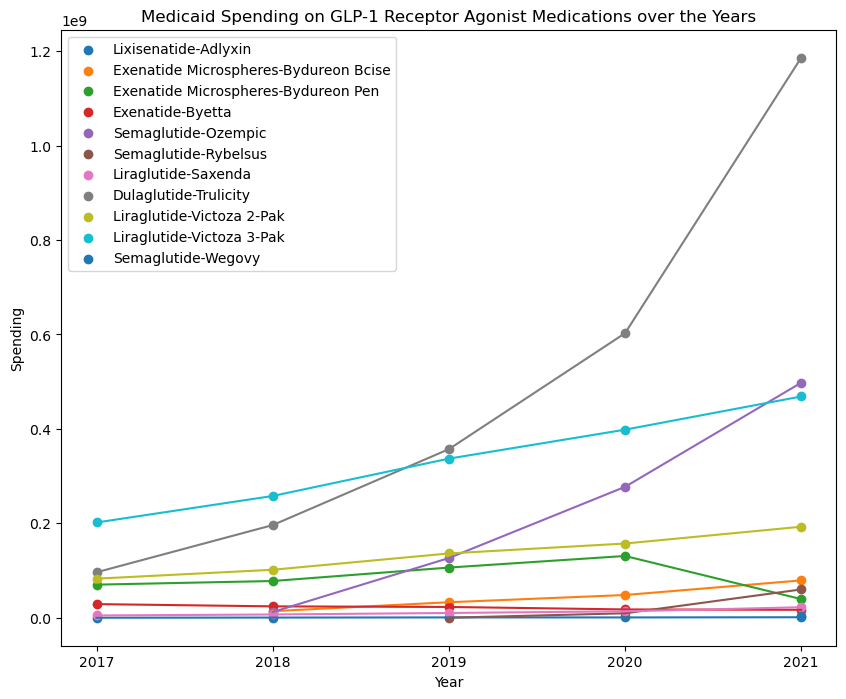

In [18]:

# Filter rows based on the condition
GLP_medicaid = dm_medicaid_spending[(dm_medicaid_spending['Pharmacy_Class']=='GLP-1') &
                                          (dm_medicaid_spending['Mftr_Name'] =='Overall')]

gnrc_names = GLP_medicaid['Gnrc_Name']
brnd_names = GLP_medicaid['Brnd_Name']
spending = GLP_medicaid[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 8))
# Loop over each row of spending
for i in range(spending.shape[0]):
    plt.scatter(years, spending.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i])
    plt.plot(years, spending.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Spending')
#plt.yscale('log')
plt.title('Medicaid Spending on GLP-1 Receptor Agonist Medications over the Years')
plt.legend(loc='upper left')
plt.show()

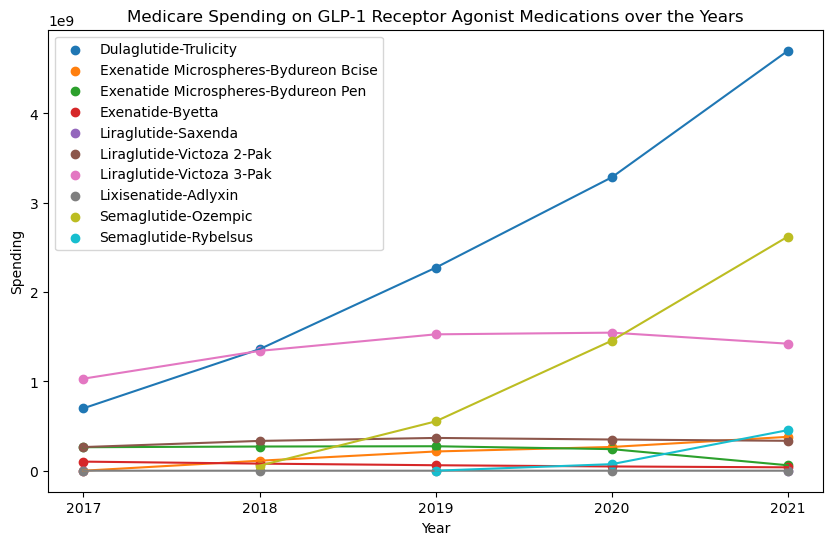

In [19]:

# Filter rows based on the condition
GLP_medicare = dm_medicare_spending[(dm_medicare_spending['Pharmacy_Class']=='GLP-1')&
                                          (dm_medicare_spending['Mftr_Name'] =='Overall')]

gnrc_names = GLP_medicare['Gnrc_Name']
brnd_names = GLP_medicare['Brnd_Name']
spending = GLP_medicare[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending.shape[0]):
    plt.scatter(years, spending.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i])
    plt.plot(years, spending.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on GLP-1 Receptor Agonist Medications over the Years')
plt.legend()
plt.show()

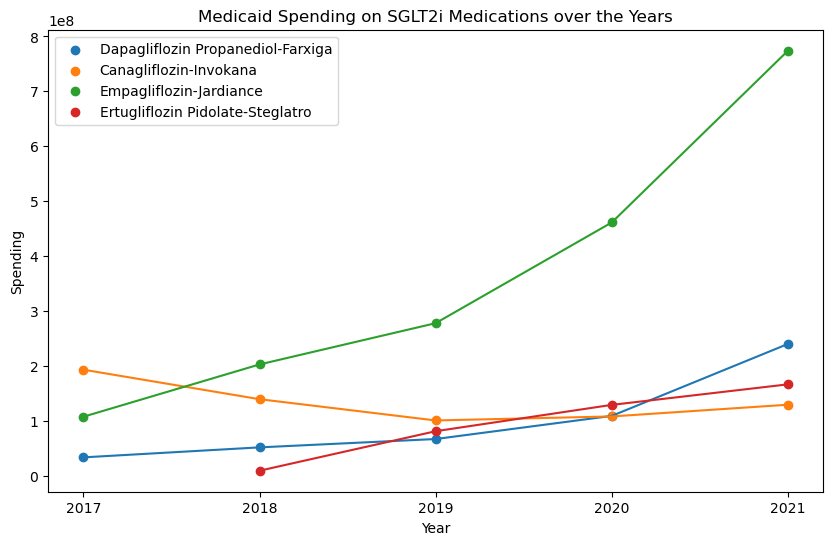

In [20]:

# Filter rows based on the condition
sglt2i_medicaid = dm_medicaid_spending[(dm_medicaid_spending['Pharmacy_Class']=='SGLT2i')&
                                          (dm_medicaid_spending['Mftr_Name'] =='Overall')]

gnrc_names_sglt2i = sglt2i_medicaid['Gnrc_Name']
brnd_names_sglt2i = sglt2i_medicaid['Brnd_Name']
spending_sglt2i = sglt2i_medicaid[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending_sglt2i.shape[0]):
    plt.scatter(years, spending_sglt2i.iloc[i], label=gnrc_names_sglt2i.iloc[i] + '-' + brnd_names_sglt2i.iloc[i])
    plt.plot(years, spending_sglt2i.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicaid Spending on SGLT2i Medications over the Years')
plt.legend()
plt.show()

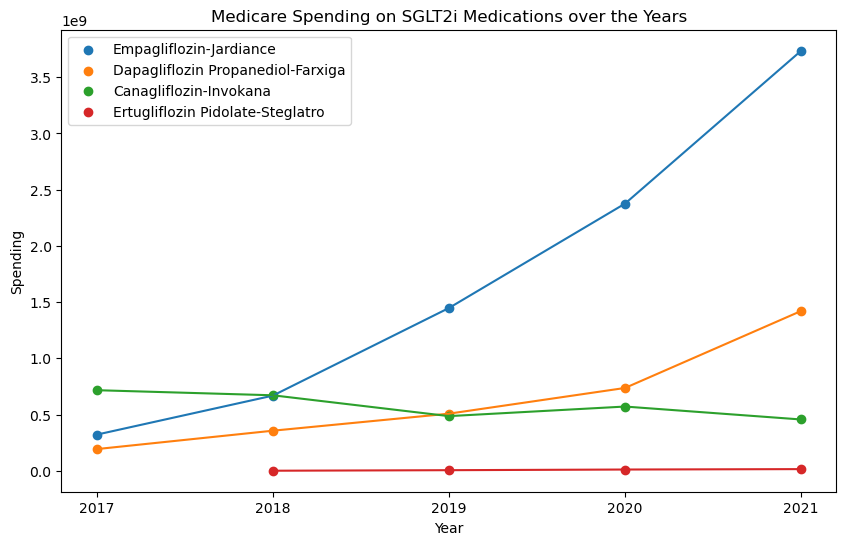

In [21]:

# Filter rows based on the condition
sglt2i_medicare = dm_medicare_spending[(dm_medicare_spending['Pharmacy_Class']=='SGLT2i') &
                                          (dm_medicare_spending['Mftr_Name'] =='Overall')]

gnrc_names_sglt2i = sglt2i_medicare['Gnrc_Name']
brnd_names_sglt2i = sglt2i_medicare['Brnd_Name']
spending_sglt2i = sglt2i_medicare[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending_sglt2i.shape[0]):
    plt.scatter(years, spending_sglt2i.iloc[i], label=gnrc_names_sglt2i.iloc[i] + '-' + brnd_names_sglt2i.iloc[i])
    plt.plot(years, spending_sglt2i.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on SGLT2i Medications over the Years')
plt.legend()
plt.show()

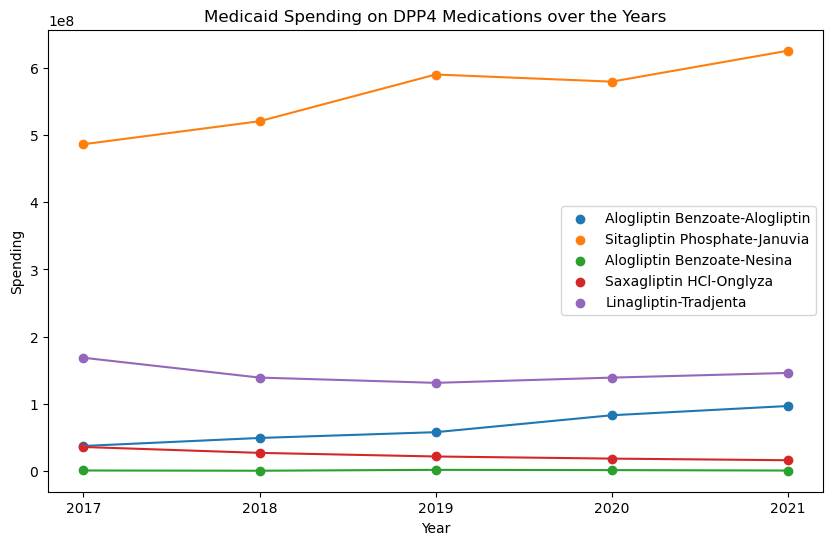

In [22]:

# Filter rows based on the condition
dpp4_medicaid = dm_medicaid_spending[(dm_medicaid_spending['Pharmacy_Class']=='DPP4')&
                                          (dm_medicaid_spending['Mftr_Name'] =='Overall')]

gnrc_names_dpp4 = dpp4_medicaid['Gnrc_Name']
brnd_names_dpp4 = dpp4_medicaid['Brnd_Name']
spending_dpp4 = dpp4_medicaid[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending_dpp4.shape[0]):
    plt.scatter(years, spending_dpp4.iloc[i], label=gnrc_names_dpp4.iloc[i] + '-' + brnd_names_dpp4.iloc[i])
    plt.plot(years, spending_dpp4.iloc[i])  # Add this line to connect the dots

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicaid Spending on DPP4 Medications over the Years')
plt.legend()
plt.show()

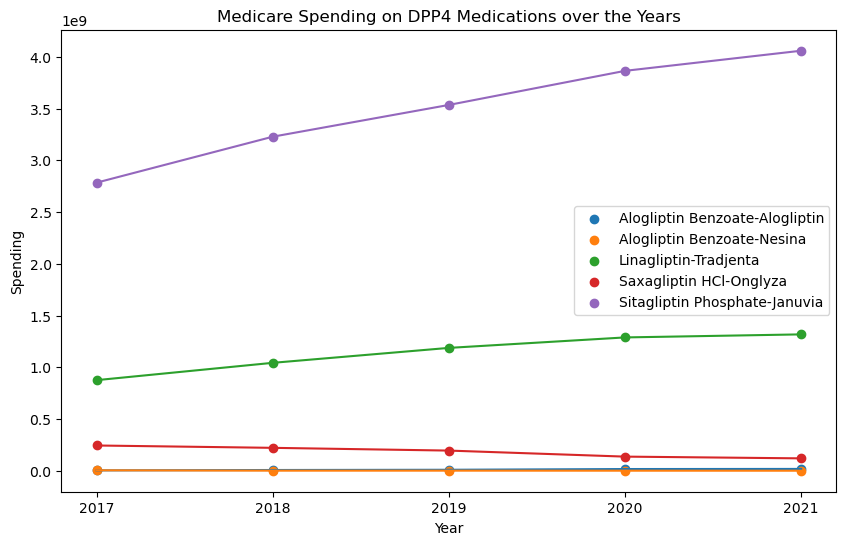

In [23]:

# Filter rows based on the condition
dpp4_medicare = dm_medicare_spending[(dm_medicare_spending['Pharmacy_Class']=='DPP4') &
                                          (dm_medicare_spending['Mftr_Name'] =='Overall')]

gnrc_names_dpp4 = dpp4_medicare['Gnrc_Name']
brnd_names_dpp4 = dpp4_medicare['Brnd_Name']
spending_dpp4 = dpp4_medicare[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending_dpp4.shape[0]):
    plt.scatter(years, spending_dpp4.iloc[i], label=gnrc_names_dpp4.iloc[i] + '-' + brnd_names_dpp4.iloc[i])
    plt.plot(years, spending_dpp4.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on DPP4 Medications over the Years')
plt.legend()
plt.show()

There are so many different kinds of insulin on the market and the type of insulins are not indicated by its class. See below of mixed insulins, rapid acting insulins, long activing insulins, inhalers, mixed glp-1/insulins. 

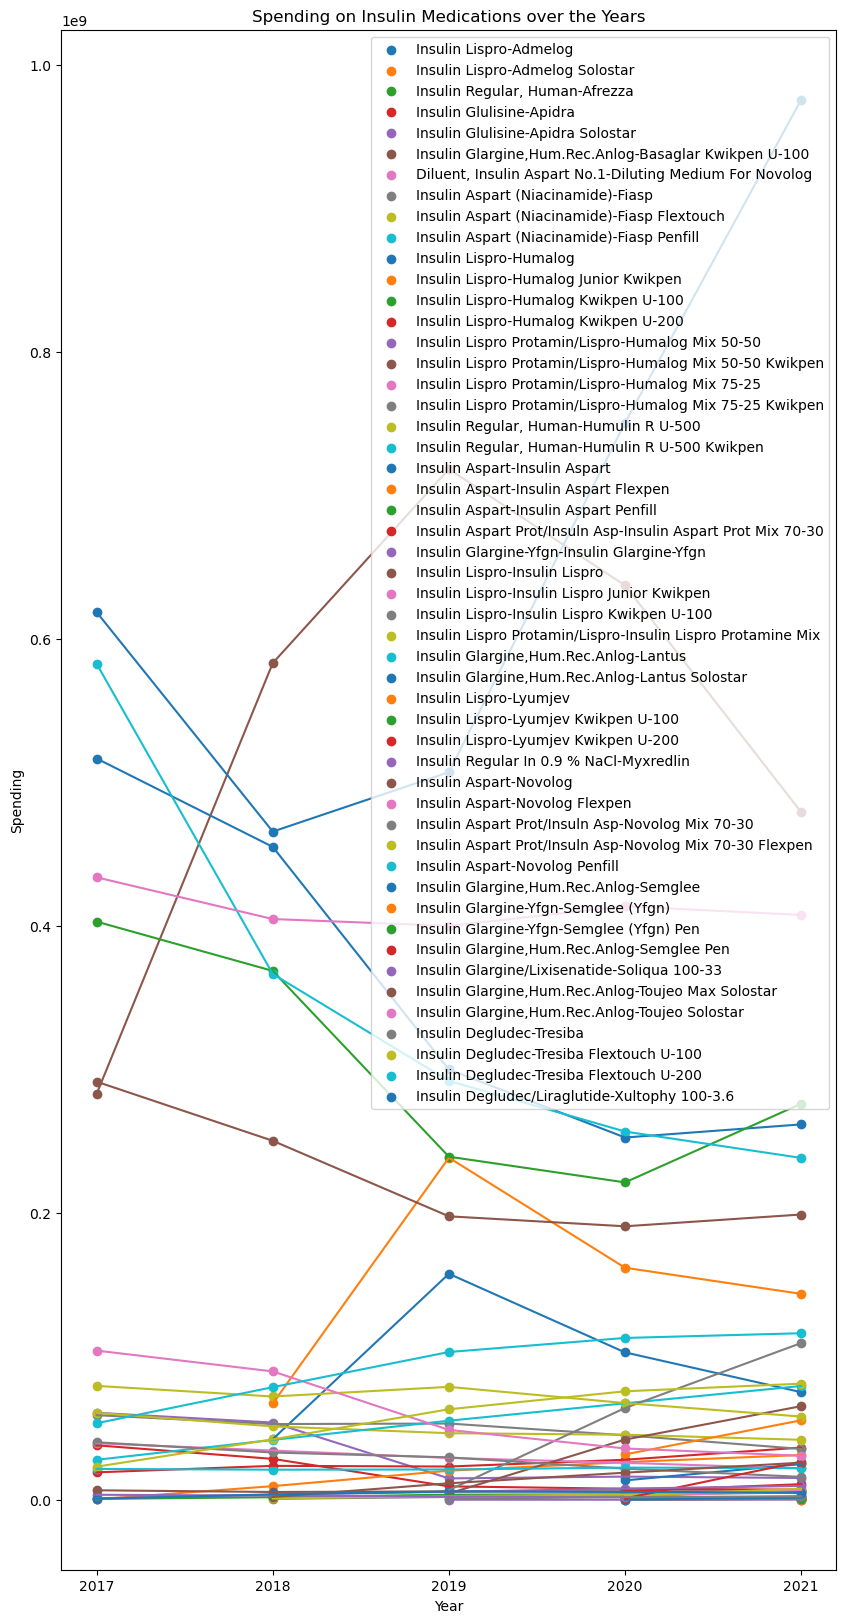

In [24]:

# Filter rows based on the condition
insulin_medicaid = dm_medicaid_spending[dm_medicaid_spending['Pharmacy_Class'].str.contains('Insulin')&
                                          (dm_medicaid_spending['Mftr_Name'] =='Overall')]

gnrc_names_insulin = insulin_medicaid['Gnrc_Name']
brnd_names_insulin = insulin_medicaid['Brnd_Name']
spending_insulin = insulin_medicaid[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 20))
# Loop over each row of spending
for i in range(spending_insulin.shape[0]):
    plt.scatter(years, spending_insulin.iloc[i], label=gnrc_names_insulin.iloc[i] + '-' + brnd_names_insulin.iloc[i])
    plt.plot(years, spending_insulin.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Spending on Insulin Medications over the Years')
plt.legend()
plt.show()

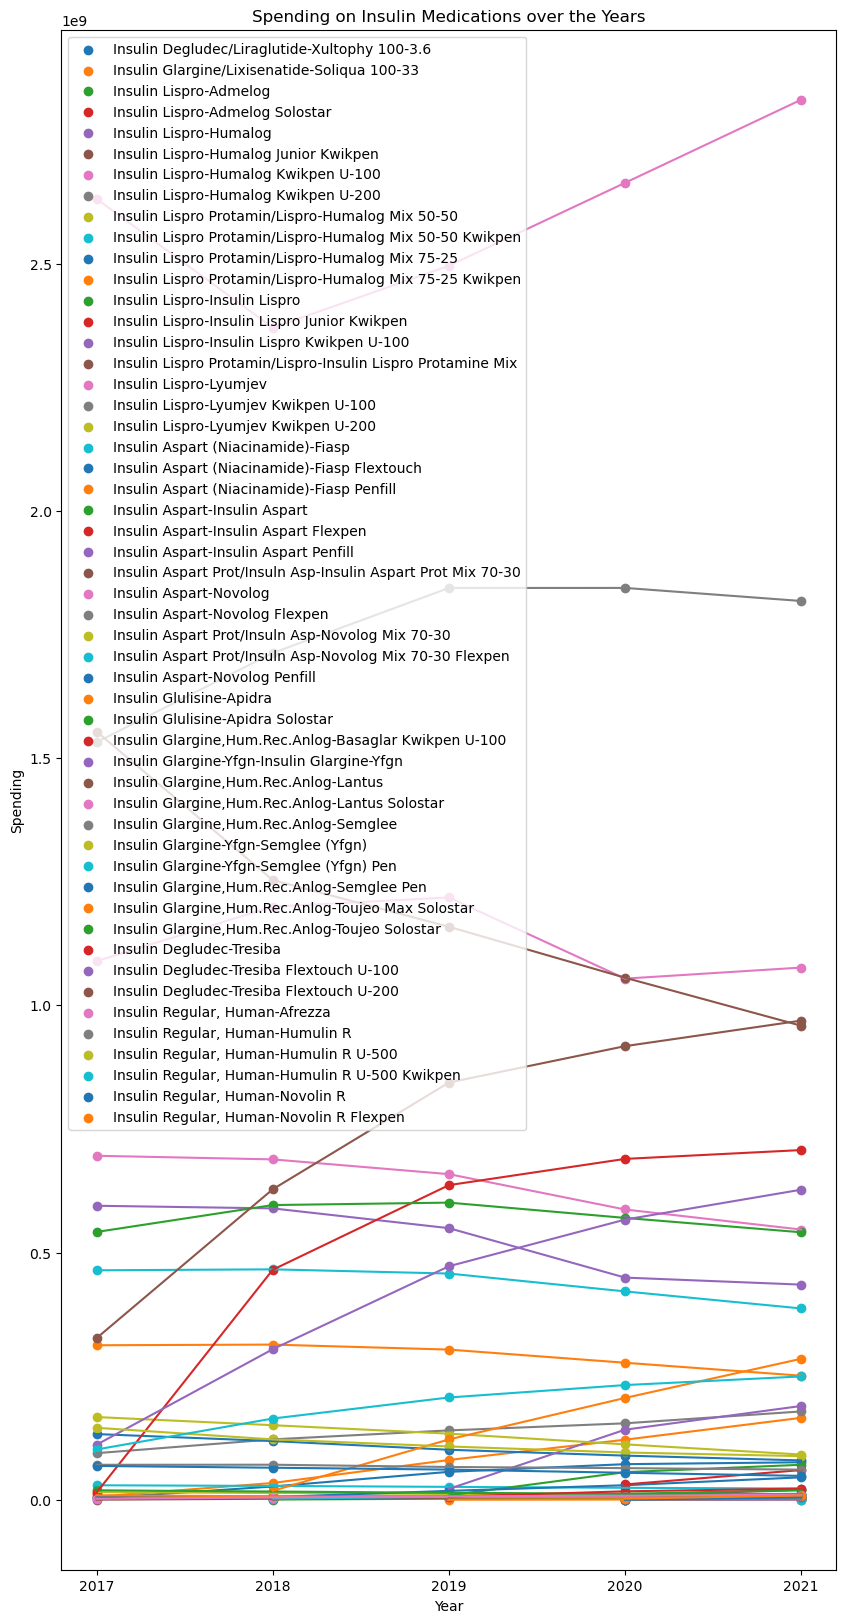

In [25]:

# Filter rows based on the condition
insulin_medicare = dm_medicare_spending[dm_medicare_spending['Pharmacy_Class'].str.contains('Insulin')&
                                          (dm_medicare_spending['Mftr_Name'] =='Overall')]

gnrc_names_insulin = insulin_medicare['Gnrc_Name']
brnd_names_insulin = insulin_medicare['Brnd_Name']
spending_insulin = insulin_medicare[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 20))
# Loop over each row of spending
for i in range(spending_insulin.shape[0]):
    plt.scatter(years, spending_insulin.iloc[i], label=gnrc_names_insulin.iloc[i] + '-' + brnd_names_insulin.iloc[i])
    plt.plot(years, spending_insulin.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Spending on Insulin Medications over the Years')
plt.legend()
plt.show()

Because there are so many different kinds of insulins, the recent top 5 will be examined.

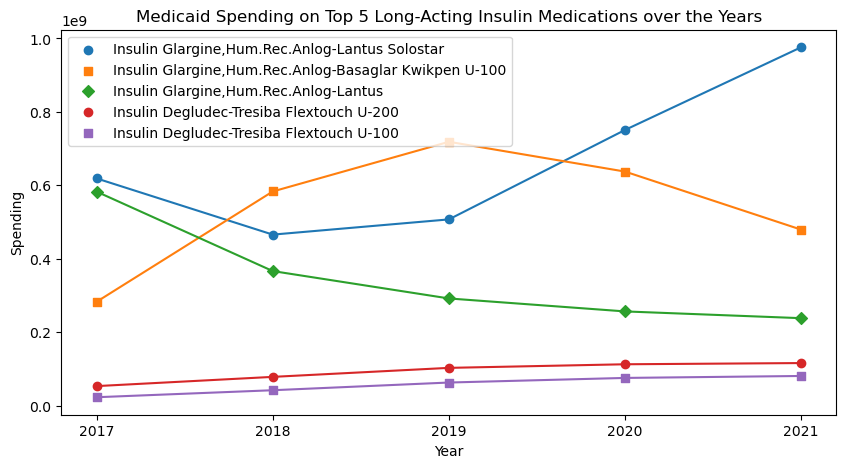

In [26]:
# Filter rows based on the condition
long_insulin_medicaid = dm_medicaid_spending[dm_medicaid_spending['Pharmacy_Class'].str.contains('Insulin Analog_Long')&
                                          (dm_medicaid_spending['Mftr_Name'] =='Overall')]

top5=long_insulin_medicaid.nlargest(5, 'Tot_Spndng_2021')

gnrc_names_long_insulin = top5['Gnrc_Name']
brnd_names_long_insulin = top5['Brnd_Name']
spending_long_insulin = top5[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

#Add marker shapes
marker_shapes = ['o', 's', 'D']

#Add colors
colors = ['red', 'blue', 'green', 'orange', 'purple']


plt.figure(figsize=(10, 5))
# Loop over each row of spending
for i in range(spending_long_insulin.shape[0]):
    # Use modulo operator to cycle through the marker shapes list
    marker_shape = marker_shapes[i % len(marker_shapes)]
    color = colors[i % len(colors)]
    plt.scatter(years, spending_long_insulin.iloc[i], label=gnrc_names_long_insulin.iloc[i] + '-' + brnd_names_long_insulin.iloc[i], marker=marker_shape)
    plt.plot(years, spending_long_insulin.iloc[i])
    

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicaid Spending on Top 5 Long-Acting Insulin Medications over the Years')
plt.legend()
plt.show()

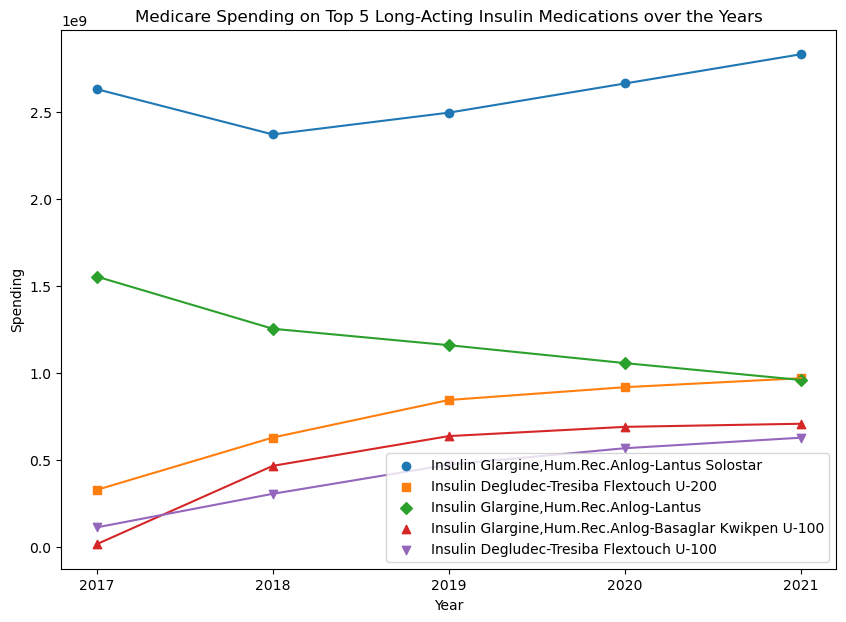

In [27]:
# Filter rows based on the condition
long_insulin_medicare = dm_medicare_spending[dm_medicare_spending['Pharmacy_Class'].str.contains('Insulin Analog_Long')&
                                          (dm_medicare_spending['Mftr_Name'] =='Overall')]

top5=long_insulin_medicare.nlargest(5, 'Tot_Spndng_2021')

gnrc_names_long_insulin = top5['Gnrc_Name']
brnd_names_long_insulin = top5['Brnd_Name']
spending_long_insulin = top5[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

#Add marker shapes
marker_shapes = ['o', 's', 'D', '^', 'v']

#Add colors
colors = ['red', 'blue', 'green', 'orange', 'purple']


plt.figure(figsize=(10, 7))
# Loop over each row of spending
for i in range(spending_long_insulin.shape[0]):
    # Use modulo operator to cycle through the marker shapes list
    marker_shape = marker_shapes[i % len(marker_shapes)]
    color = colors[i % len(colors)]
    plt.scatter(years, spending_long_insulin.iloc[i], label=gnrc_names_long_insulin.iloc[i] + '-' + brnd_names_long_insulin.iloc[i], marker=marker_shape)
    plt.plot(years, spending_long_insulin.iloc[i])
    

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on Top 5 Long-Acting Insulin Medications over the Years')
plt.legend()
plt.show()

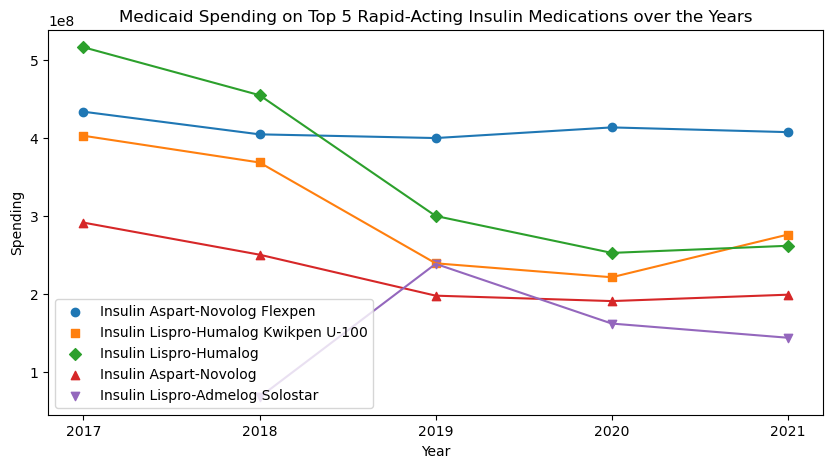

In [28]:

# Filter rows based on the condition
rapid_insulin_medicaid = dm_medicaid_spending[dm_medicaid_spending['Pharmacy_Class'].str.contains('Insulin Analog_Rapid')&
                                          (dm_medicaid_spending['Mftr_Name'] =='Overall')&
                                             ~dm_medicaid_spending['Pharmacy_Class'].isin(['Insulin Analog_Regular','Insulin Analog_NPH', 'Insulin Analog_Mix'])]

top5=rapid_insulin_medicaid.nlargest(5, 'Tot_Spndng_2021') 

gnrc_names_rapid_insulin = top5['Gnrc_Name']
brnd_names_rapid_insulin = top5['Brnd_Name']
spending_rapid_insulin = top5[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

#Add marker shapes
marker_shapes = ['o', 's', 'D', '^', 'v']

plt.figure(figsize=(10, 5))
# Loop over each row of spending
for i in range(spending_rapid_insulin.shape[0]):
    # Use modulo operator to cycle through the marker shapes list
    marker_shape = marker_shapes[i % len(marker_shapes)]
    plt.scatter(years, spending_rapid_insulin.iloc[i], label=gnrc_names_rapid_insulin.iloc[i] + '-' + brnd_names_rapid_insulin.iloc[i], marker=marker_shape)
    plt.plot(years, spending_rapid_insulin.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicaid Spending on Top 5 Rapid-Acting Insulin Medications over the Years')
plt.legend(loc='lower left', ncol=1)
plt.show()

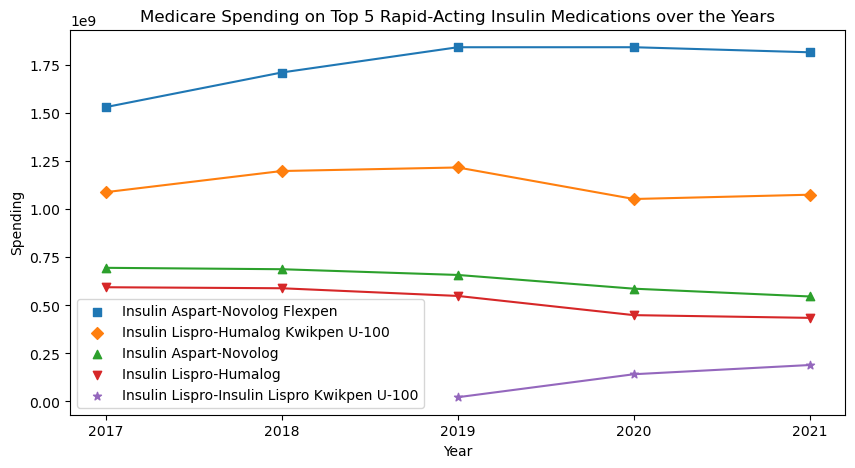

In [29]:
# Filter rows based on the condition
rapid_insulin_medicare = dm_medicare_spending[dm_medicare_spending['Pharmacy_Class'].str.contains('Insulin Analog_Rapid')&
                                          (dm_medicare_spending['Mftr_Name'] =='Overall')&
                                             ~dm_medicare_spending['Pharmacy_Class'].isin(['Insulin Analog_Regular','Insulin Analog_NPH', 'Insulin Analog_Mix'])]

top5=rapid_insulin_medicare.nlargest(5, 'Tot_Spndng_2021')


gnrc_names_rapid_insulin = top5['Gnrc_Name']
brnd_names_rapid_insulin = top5['Brnd_Name']
spending_rapid_insulin = top5[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

#Add marker shapes
marker_shapes = ['s', 'D', '^', 'v', '*']

plt.figure(figsize=(10, 5))
# Loop over each row of spending
for i in range(spending_rapid_insulin.shape[0]):
    # Use modulo operator to cycle through the marker shapes list
    marker_shape = marker_shapes[i % len(marker_shapes)]
    plt.scatter(years, spending_rapid_insulin.iloc[i], label=gnrc_names_rapid_insulin.iloc[i] + '-' + brnd_names_rapid_insulin.iloc[i], marker=marker_shape)
    plt.plot(years, spending_rapid_insulin.iloc[i])

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on Top 5 Rapid-Acting Insulin Medications over the Years')
plt.legend()
plt.show()

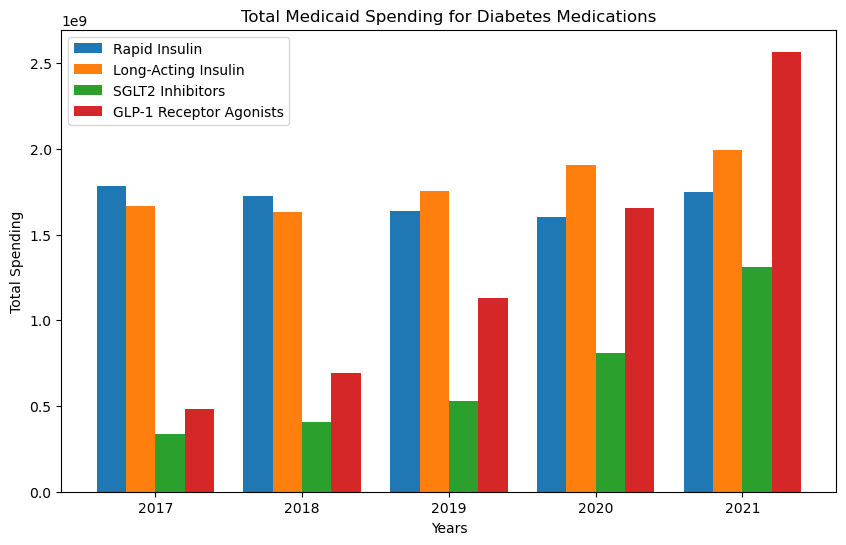

In [110]:

# Calculate the sum of spending for each category
rapid_spending_sum = rapid_insulin_medicaid.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)
long_spending_sum = long_insulin_medicaid.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)
sglt2i_spending_sum = sglt2i_medicaid.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)
GLP_spending_sum = GLP_medicaid.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)

years = ['2017', '2018', '2019', '2020', '2021']

# Set the width of each bar
bar_width = 0.2

# Set the x-coordinates for each category
bar_rapid = np.arange(len(years))
bar_long = bar_rapid + bar_width
bar_sglt2i = bar_rapid + 2 * bar_width
bar_GLP = bar_rapid + 3 * bar_width

#Increase figure size
plt.figure(figsize=(10,6))

# Plot the bar graphs side by side
plt.bar(bar_rapid, rapid_spending_sum, width=bar_width, label='Rapid Insulin')
plt.bar(bar_long, long_spending_sum, width=bar_width, label='Long-Acting Insulin')
plt.bar(bar_sglt2i, sglt2i_spending_sum, width=bar_width, label='SGLT2 Inhibitors')
plt.bar(bar_GLP, GLP_spending_sum, width=bar_width, label='GLP-1 Receptor Agonists')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Total Spending')
plt.title('Total Medicaid Spending for Diabetes Medications')

# Set the x-axis tick labels
plt.xticks(bar_rapid + 1.5 * bar_width, years)

# Add a legend
plt.legend()



# Display the bar graph
plt.show()


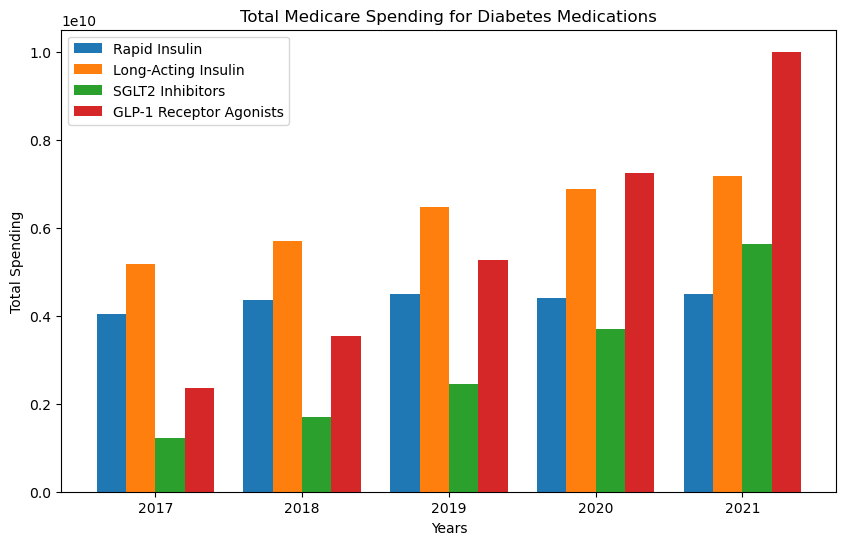

In [31]:

# Calculate the sum of spending for each category
rapid_spending_sum = rapid_insulin_medicare.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)
long_spending_sum = long_insulin_medicare.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)
sglt2i_spending_sum = sglt2i_medicare.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)
GLP_spending_sum = GLP_medicare.loc[:, ['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(axis=0)

years = ['2017', '2018', '2019', '2020', '2021']

# Set the width of each bar
bar_width = 0.2

# Set the x-coordinates for each category
bar_rapid = np.arange(len(years))
bar_long = bar_rapid + bar_width
bar_sglt2i = bar_rapid + 2 * bar_width
bar_GLP = bar_rapid + 3 * bar_width

#Increase figure size
plt.figure(figsize=(10,6))

# Plot the bar graphs side by side
plt.bar(bar_rapid, rapid_spending_sum, width=bar_width, label='Rapid Insulin')
plt.bar(bar_long, long_spending_sum, width=bar_width, label='Long-Acting Insulin')
plt.bar(bar_sglt2i, sglt2i_spending_sum, width=bar_width, label='SGLT2 Inhibitors')
plt.bar(bar_GLP, GLP_spending_sum, width=bar_width, label='GLP-1 Receptor Agonists')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Total Spending')
plt.title('Total Medicare Spending for Diabetes Medications')

# Set the x-axis tick labels
plt.xticks(bar_rapid + 1.5 * bar_width, years)

# Add a legend
plt.legend()



# Display the bar graph
plt.show()


In [32]:
dm_spending=dm_medicaid_spending[dm_medicaid_spending['Mftr_Name']!='Overall'].groupby('Pharmacy_Class')[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()
dm_spending = dm_spending.T
dm_spending

Pharmacy_Class   Alpha-Glucosidase Inhibitors     Biguanide  Biguanide/DPP4  \
Tot_Spndng_2017                    2256693.17  1.329168e+08    1.913468e+08   
Tot_Spndng_2018                    1700500.86  1.173602e+08    1.816050e+08   
Tot_Spndng_2019                    1797689.48  1.151891e+08    2.195901e+08   
Tot_Spndng_2020                    1571991.77  1.133516e+08    1.962671e+08   
Tot_Spndng_2021                    1669798.28  1.088217e+08    1.921722e+08   

Pharmacy_Class           DPP4  Dopamine-2 Agonists         GLP-1  \
Tot_Spndng_2017  7.287302e+08           6321614.47  4.849959e+08   
Tot_Spndng_2018  7.362859e+08           5733713.30  6.913473e+08   
Tot_Spndng_2019  8.025371e+08           5150761.62  1.129878e+09   
Tot_Spndng_2020  8.214057e+08           4388560.61  1.655961e+09   
Tot_Spndng_2021  8.851094e+08           4081929.66  2.567210e+09   

Pharmacy_Class   GLP-1/Insulin Analog_Long  Insulin Analog_Long  \
Tot_Spndng_2017                 1708568.08         1.664788e+09   
Tot_Spndng_2018                 7251623.24         1.627531e+09   
Tot_Spndng_2019                11241050.03         1.744571e+09   
Tot_Spndng_2020                13184810.06         1.890592e+09   
Tot_Spndng_2021                14429498.97         1.978644e+09   

Pharmacy_Class   Insulin Analog_Mix  Insulin Analog_Rapid  \
Tot_Spndng_2017        2.277206e+08          1.784517e+09   
Tot_Spndng_2018        2.001977e+08          1.725954e+09   
Tot_Spndng_2019        1.985702e+08          1.636890e+09   
Tot_Spndng_2020        1.762317e+08          1.603914e+09   
Tot_Spndng_2021        1.570579e+08          1.750625e+09   

Pharmacy_Class   Insulin Analog_Regular  Meglitinides        SGLT2i  \
Tot_Spndng_2017            8.897176e+07    3958738.22  3.349837e+08   
Tot_Spndng_2018            9.455109e+07    2760686.08  4.041431e+08   
Tot_Spndng_2019            1.049927e+08    2869424.76  5.276504e+08   
Tot_Spndng_2020            1.163902e+08    2164060.86  8.083638e+08   
Tot_Spndng_2021            1.273887e+08    2155605.49  1.310525e+09   

Pharmacy_Class   SGLT2i/Biguanide  SGLT2i/DPP4  SGLT2i/DPP4/Biguanide  \
Tot_Spndng_2017       25623587.46   4690811.18                   0.00   
Tot_Spndng_2018       27403857.32   6212054.84                   0.00   
Tot_Spndng_2019       33417883.26   8973709.03                   0.00   
Tot_Spndng_2020       44217542.39  11693959.92               96740.07   
Tot_Spndng_2021       62706812.53  14231134.03              982993.10   

Pharmacy_Class   Sulfonylurea  Sulfonylurea/Biguanide  \
Tot_Spndng_2017   36582449.90              3333804.65   
Tot_Spndng_2018   32793006.30              2211681.55   
Tot_Spndng_2019   31427606.98              2302787.44   
Tot_Spndng_2020   28721053.38              1849908.56   
Tot_Spndng_2021   30107980.86              1878550.53   

Pharmacy_Class   Sulfonylurea/Thiazolidinediones (TZDs)  \
Tot_Spndng_2017                               348047.99   
Tot_Spndng_2018                               421085.67   
Tot_Spndng_2019                               503515.94   
Tot_Spndng_2020                               432581.62   
Tot_Spndng_2021                               473345.01   

Pharmacy_Class   Thiazolidinediones (TZDs)  \
Tot_Spndng_2017                 8791668.04   
Tot_Spndng_2018                 7620362.23   
Tot_Spndng_2019                 7693895.44   
Tot_Spndng_2020                 8214905.62   
Tot_Spndng_2021                 9348805.01   

Pharmacy_Class   Thiazolidinediones (TZDs)/Biguanide  \
Tot_Spndng_2017                           1850819.01   
Tot_Spndng_2018                           1163510.90   
Tot_Spndng_2019                            972371.90   
Tot_Spndng_2020                            607304.78   
Tot_Spndng_2021                            591505.58   

Pharmacy_Class   Thiazolidinediones (TZDs)/DPP4  
Tot_Spndng_2017                      2293636.79  
Tot_Spndng_2018                      1911691.94  
Tot_Spndng_2019   

In [33]:
medicare_dm_spending=dm_medicare_spending[dm_medicare_spending['Mftr_Name']!='Overall'].groupby('Pharmacy_Class')[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()
medicare_dm_spending = medicare_dm_spending.T
medicare_dm_spending

Pharmacy_Class   Alpha-Glucosidase Inhibitors     Biguanide  Biguanide/DPP4  \
Tot_Spndng_2017                   11043880.22  6.536747e+08    9.924944e+08   
Tot_Spndng_2018                   10776319.34  6.333395e+08    1.134198e+09   
Tot_Spndng_2019                   10592554.71  6.597861e+08    1.232023e+09   
Tot_Spndng_2020                   11611518.26  5.921089e+08    1.316768e+09   
Tot_Spndng_2021                   11370610.97  4.961716e+08    1.361165e+09   

Pharmacy_Class           DPP4  Dopamine-2 Agonists         GLP-1  \
Tot_Spndng_2017  3.912581e+09          16806207.70  2.359252e+09   
Tot_Spndng_2018  4.501559e+09          15858700.65  3.555112e+09   
Tot_Spndng_2019  4.928810e+09          15538870.29  5.270698e+09   
Tot_Spndng_2020  5.307612e+09          14659815.18  7.265033e+09   
Tot_Spndng_2021  5.515539e+09          13737632.62  1.001406e+10   

Pharmacy_Class   GLP-1/Insulin Analog_Long  Insulin Analog_Long  \
Tot_Spndng_2017               9.116067e+06         5.178575e+09   
Tot_Spndng_2018               6.060948e+07         5.635059e+09   
Tot_Spndng_2019               1.367570e+08         6.335670e+09   
Tot_Spndng_2020               1.933157e+08         6.685492e+09   
Tot_Spndng_2021               2.413768e+08         6.949388e+09   

Pharmacy_Class   Insulin Analog_Mix  Insulin Analog_Rapid  \
Tot_Spndng_2017        1.120930e+09          4.039822e+09   
Tot_Spndng_2018        1.090694e+09          4.352556e+09   
Tot_Spndng_2019        1.033480e+09          4.503075e+09   
Tot_Spndng_2020        9.487519e+08          4.407865e+09   
Tot_Spndng_2021        8.716046e+08          4.506529e+09   

Pharmacy_Class   Insulin Analog_Regular  Meglitinides        SGLT2i  \
Tot_Spndng_2017            3.880996e+08   43658717.31  1.231255e+09   
Tot_Spndng_2018            4.262046e+08   47329899.42  1.697247e+09   
Tot_Spndng_2019            4.486857e+08   48864570.36  2.447548e+09   
Tot_Spndng_2020            4.560249e+08   44927016.02  3.695772e+09   
Tot_Spndng_2021            4.655985e+08   36327133.67  5.628684e+09   

Pharmacy_Class   SGLT2i/Biguanide  SGLT2i/DPP4  SGLT2i/DPP4/Biguanide  \
Tot_Spndng_2017      1.028833e+08  25121751.24                   0.00   
Tot_Spndng_2018      1.449251e+08  36187292.45                   0.00   
Tot_Spndng_2019      2.048504e+08  55490082.83                   0.00   
Tot_Spndng_2020      2.935917e+08  74453809.06             1450471.66   
Tot_Spndng_2021      3.987611e+08  95181338.02            17542709.55   

Pharmacy_Class   Sulfonylurea  Sulfonylurea/Biguanide  \
Tot_Spndng_2017  1.828172e+08             27631011.25   
Tot_Spndng_2018  2.061533e+08             29473405.05   
Tot_Spndng_2019  2.022967e+08             25901608.10   
Tot_Spndng_2020  1.860888e+08             21046519.31   
Tot_Spndng_2021  1.781429e+08             18634269.84   

Pharmacy_Class   Sulfonylurea/Thiazolidinediones (TZDs)  \
Tot_Spndng_2017                              2699478.81   
Tot_Spndng_2018                              2559012.02   
Tot_Spndng_2019                              2384239.59   
Tot_Spndng_2020                              2066277.18   
Tot_Spndng_2021                              2069731.14   

Pharmacy_Class   Thiazolidinediones (TZDs)  \
Tot_Spndng_2017                60909421.20   
Tot_Spndng_2018                55453745.84   
Tot_Spndng_2019                61904928.75   
Tot_Spndng_2020                60465342.08   
Tot_Spndng_2021                58143325.31   

Pharmacy_Class   Thiazolidinediones (TZDs)/Biguanide  \
Tot_Spndng_2017                          17680257.72   
Tot_Spndng_2018                          19602167.08   
Tot_Spndng_2019                          14550543.97   
Tot_Spndng_2020                          11582920.38   
Tot_Spndng_2021                           8786123.64   

Pharmacy_Class   Thiazolidinediones (TZDs)/DPP4  
Tot_Spndng_2017                      4098239.46  
Tot_Spndng_2018                      2754786.97  
Tot_Spndng_2019   

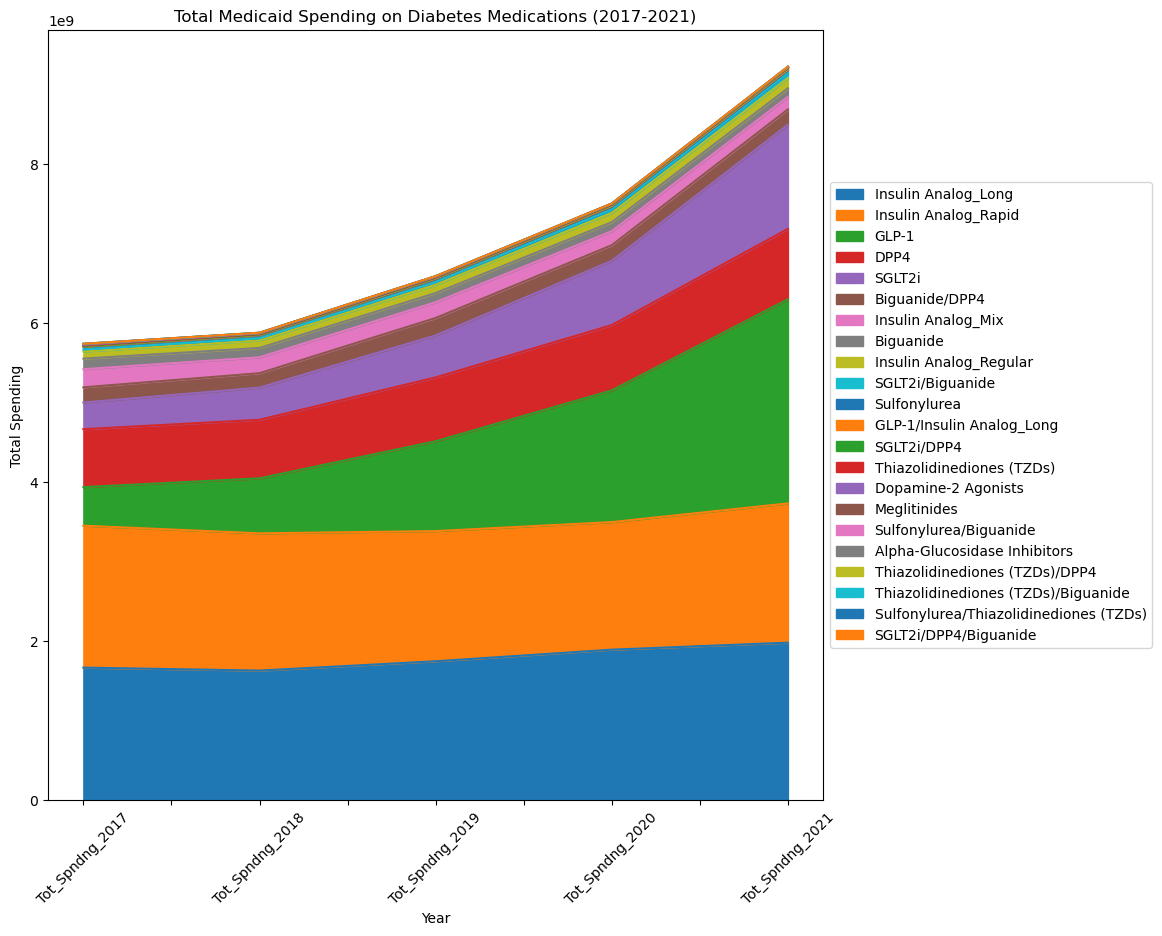

In [34]:
column_order = dm_spending.sum().sort_values(ascending=False).index
dm_spending=dm_spending[column_order]

fig, ax=plt.subplots(figsize=(10, 10))
dm_spending.plot(kind='area', stacked=True, ax=ax)
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.title('Total Medicaid Spending on Diabetes Medications (2017-2021)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # adjusts legend position
plt.xticks(rotation=45)
#plt.tight_layout() 
plt.show()



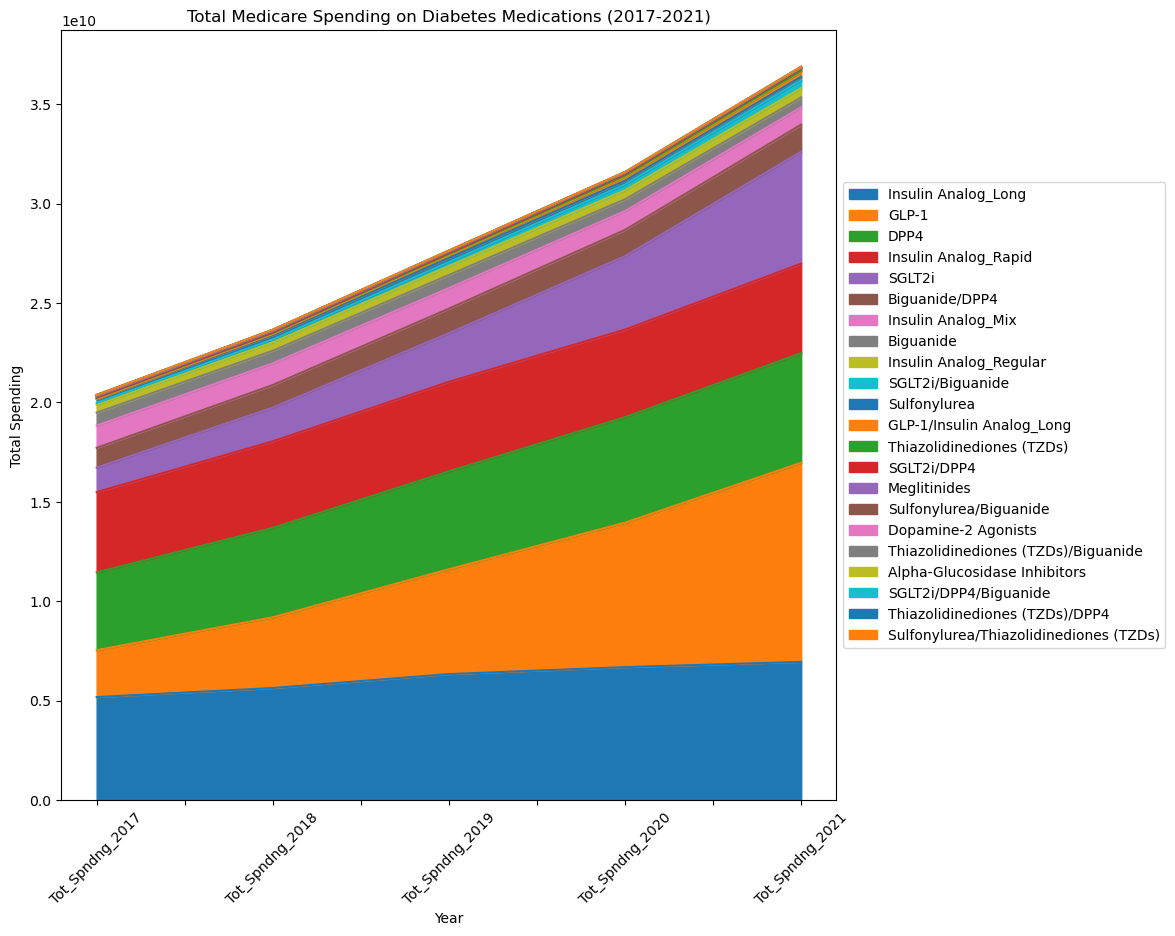

In [35]:
column_order = medicare_dm_spending.sum().sort_values(ascending=False).index
medicare_dm_spending = medicare_dm_spending[column_order]

fig, ax=plt.subplots(figsize=(10, 10))
medicare_dm_spending.plot(kind='area', stacked=True, ax=ax)
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.title('Total Medicare Spending on Diabetes Medications (2017-2021)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
#plt.tight_layout() 
plt.show()


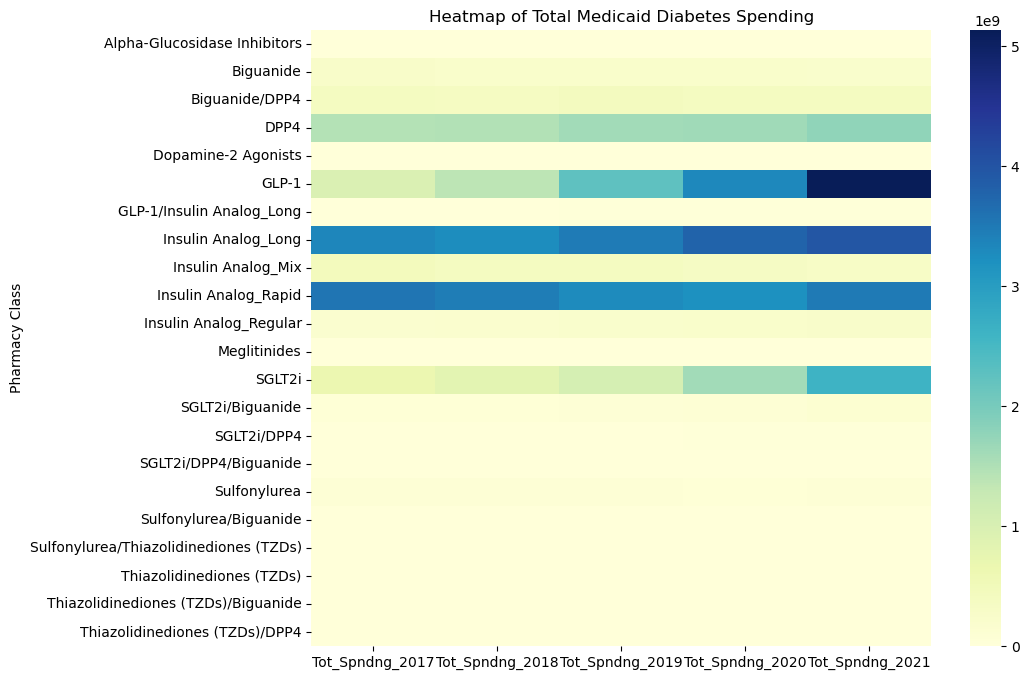

In [36]:
import seaborn as sns

# group data
grouped_data = dm_medicaid_spending.groupby('Pharmacy_Class')[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()

# Draw a heatmap with the data
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data, cmap="YlGnBu")
plt.title('Heatmap of Total Medicaid Diabetes Spending')
plt.ylabel('Pharmacy Class')
plt.show()


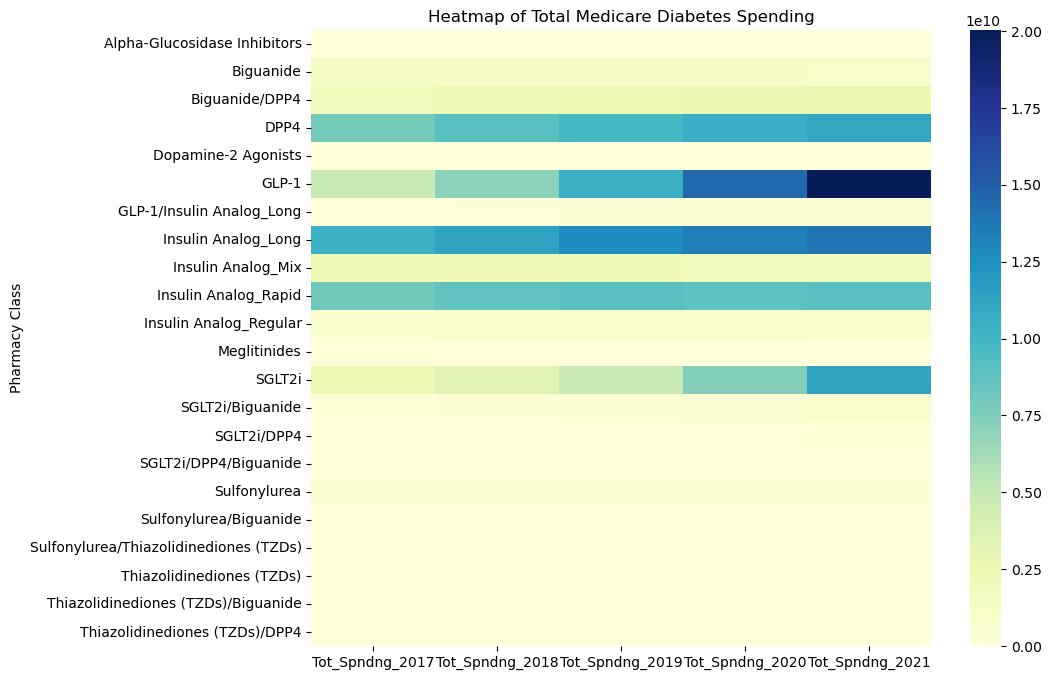

In [37]:
import seaborn as sns

# group data
grouped_data = dm_medicare_spending.groupby('Pharmacy_Class')[['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()

# Draw a heatmap with the data
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data, cmap="YlGnBu")
plt.title('Heatmap of Total Medicare Diabetes Spending')
plt.ylabel('Pharmacy Class')
plt.show()


In [38]:
#Avg Spending per claim based on Pharmacy Class

dm_spending_per_claim=dm_medicaid_spending[dm_medicaid_spending['Mftr_Name']!='Overall'].groupby('Pharmacy_Class')[['Avg_Spnd_Per_Clm_2017', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']].mean()
dm_spending_per_claim = dm_spending_per_claim.T
dm_spending_per_claim

Pharmacy_Class         Alpha-Glucosidase Inhibitors   Biguanide  \
Avg_Spnd_Per_Clm_2017                     78.881100  411.127787   
Avg_Spnd_Per_Clm_2018                     74.555263  293.626856   
Avg_Spnd_Per_Clm_2019                     78.738870  258.941074   
Avg_Spnd_Per_Clm_2020                     81.814335  235.905514   
Avg_Spnd_Per_Clm_2021                     99.604355  210.086701   

Pharmacy_Class         Biguanide/DPP4        DPP4  Dopamine-2 Agonists  \
Avg_Spnd_Per_Clm_2017      352.025253  355.537471           269.810707   
Avg_Spnd_Per_Clm_2018      346.416379  365.459195           252.899618   
Avg_Spnd_Per_Clm_2019      412.861685  413.609609           226.471281   
Avg_Spnd_Per_Clm_2020      449.831459  454.786910           217.207642   
Avg_Spnd_Per_Clm_2021      515.537450  528.512115           240.398011   

Pharmacy_Class              GLP-1  GLP-1/Insulin Analog_Long  \
Avg_Spnd_Per_Clm_2017  690.325523                 750.726298   
Avg_Spnd_Per_Clm_2018  701.056542                 702.837879   
Avg_Spnd_Per_Clm_2019  781.328204                 729.597346   
Avg_Spnd_Per_Clm_2020  833.568335                 790.679880   
Avg_Spnd_Per_Clm_2021  914.135793                 902.184152   

Pharmacy_Class         Insulin Analog_Long  Insulin Analog_Mix  \
Avg_Spnd_Per_Clm_2017           441.249236          666.552825   
Avg_Spnd_Per_Clm_2018           475.870745          635.055294   
Avg_Spnd_Per_Clm_2019           525.079402          680.673060   
Avg_Spnd_Per_Clm_2020           477.568521          626.320429   
Avg_Spnd_Per_Clm_2021           465.367028          549.196866   

Pharmacy_Class         Insulin Analog_Rapid  Insulin Analog_Regular  \
Avg_Spnd_Per_Clm_2017            554.592268             1173.364375   
Avg_Spnd_Per_Clm_2018            544.429795             1219.113489   
Avg_Spnd_Per_Clm_2019            531.032724             1069.562226   
Avg_Spnd_Per_Clm_2020            548.331138             1123.650397   
Avg_Spnd_Per_Clm_2021            542.985094             1227.061446   

Pharmacy_Class         Meglitinides      SGLT2i  SGLT2i/Biguanide  \
Avg_Spnd_Per_Clm_2017     50.414528  447.507940        422.948737   
Avg_Spnd_Per_Clm_2018     36.771453  405.661144        399.004874   
Avg_Spnd_Per_Clm_2019     39.488299  474.399679        459.560775   
Avg_Spnd_Per_Clm_2020     29.843212  532.546831        508.175220   
Avg_Spnd_Per_Clm_2021     27.391106  584.512333        552.464369   

Pharmacy_Class         SGLT2i/DPP4  SGLT2i/DPP4/Biguanide  Sulfonylurea  \
Avg_Spnd_Per_Clm_2017   542.478453                    NaN     21.146067   
Avg_Spnd_Per_Clm_2018   482.417123                    NaN     20.008644   
Avg_Spnd_Per_Clm_2019   570.938832                    NaN     23.307714   
Avg_Spnd_Per_Clm_2020   602.506376             579.281856     21.301217   
Avg_Spnd_Per_Clm_2021   636.266274             601.955358     23.625682   

Pharmacy_Class         Sulfonylurea/Biguanide  \
Avg_Spnd_Per_Clm_2017               23.814849   
Avg_Spnd_Per_Clm_2018               16.816389   
Avg_Spnd_Per_Clm_2019               18.677269   
Avg_Spnd_Per_Clm_2020               13.563543   
Avg_Spnd_Per_Clm_2021               14.757718   

Pharmacy_Class         Sulfonylurea/Thiazolidinediones (TZDs)  \
Avg_Spnd_Per_Clm_2017                              373.843169   
Avg_Spnd_Per_Clm_2018                              338.765623   
Avg_Spnd_Per_Clm_2019                              402.812752   
Avg_Spnd_Per_Clm_2020                              367.528989   
Avg_Spnd_Per_Clm_2021                              368.648762   

Pharmacy_Class         Thiazolidinediones (TZDs)  \
Avg_Spnd_Per_Clm_2017                  77.294532   
Avg_Spnd_Per_Clm_2018                  64.774781   
Avg_Spnd_Per_Clm_2019                  72.489969   
Avg_Spnd_Per_Clm_2020                  74.866156   
Avg_Spnd_Per_Clm_2021                  62.801933   

Pharmacy_Class         Thiazolidinediones (TZDs)/Biguanide  \
Avg_Spnd_Per_Clm

Some medications like metformin can be either inexpensive or super expensive depends on the maker.
Perhaps insurance can save money by approving only certain types

In [39]:
dm_medicaid_spending[dm_medicaid_spending['Pharmacy_Class']=='Biguanide'][['Gnrc_Name', 'Mftr_Name', 'Avg_Spnd_Per_Clm_2017']].head(50)

Gnrc_Name        Mftr_Name  Avg_Spnd_Per_Clm_2017
6613  Metformin HCl          Overall              88.470029
6614  Metformin HCl  BMS Primarycare              88.470029
6630  Metformin HCl          Overall            4835.919191
6631  Metformin HCl  Santarus Inc/Sa            4835.919191
9206  Metformin HCl          Overall            3312.757399
9207  Metformin HCl  Sun Pharma Glob                    NaN
9208  Metformin HCl  Sciegen Pharmac                    NaN
9209  Metformin HCl  Oceanside Pharm            3352.166829
9210  Metformin HCl  Northstar Rx Ll                    NaN
9211  Metformin HCl  Lupin Pharmaceu            3322.331476
9212  Metformin HCl  Granules Pharma                    NaN
9213  Metformin HCl  Glenmark Pharma                    NaN
9214  Metformin HCl  Ajanta Pharma L                    NaN
9215  Metformin HCl     Actavis/Teva            2471.131602
9216  Metformin HCl          Overall             557.045838
9217  Metformin HCl  Nostrum Laborat                    NaN
9218  Metformin HCl            Mylan             580.406121
9219  Metformin HCl  Lupin Pharmaceu             569.734847
9220  Metformin HCl  Ingenus Pharmac                    NaN
9221  Metformin HCl  Epic Pharma LLC                    NaN
9222  Metformin HCl  Ajanta Pharma L                    NaN
9223  Metformin HCl     Actavis/Teva             524.383991
9224  Metformin HCl          Overall               5.407213
9225  Metformin HCl  Westminster Pha                    NaN
9226  Metformin HCl    Time-Cap Labs               0.961527
9227  Metformin HCl         Teva USA               3.983008
9228  Metformin HCl      Tagi Pharma                    NaN
9229  Metformin HCl  Solco Healthcar               5.235600
9230  Metformin HCl  Sciegen Pharmac                    NaN
9231  Metformin HCl  Mylan Instituti              13.576328
9232  Metformin HCl  Micro Labs USA,                    NaN
9233  Metformin HCl  Mckesson Packag               4.588855
9234  Metformin HCl  Major Pharmaceu               6.877156
9235  Metformin HCl            Mylan               6.746451
9236  Metformin HCl  Legacy Pharmace               4.331648
9237  Metformin HCl  Laurus Labs Lim                    NaN
9238  Metformin HCl  Ingenus Pharmac               4.691727
9239  Metformin HCl  Granules Pharma                    NaN
9240  Metformin HCl  Epic Pharma LLC               5.327383
9241  Metformin HCl  Caraco/Sun Phar               5.444301
9242  Metformin HCl  Zydus Pharmaceu               5.391190
9243  Metformin HCl     Caraco Pharm               3.881667
9244  Metformin HCl     Breckenridge                    NaN
9245  Metformin HCl  Avet Pharmaceut               5.011996
9246  Metformin HCl  Aurobindo Pharm               5.913119
9247  Metformin HCl  Ascend Laborato               5.840316
9248  Metformin HCl      Apotex Corp               4.703989
9249  Metformin HCl  Amneal Pharmace               6.056268
9250  Metformin HCl              Ahp              48.921320
9251  Metformin HCl   Aci Healthcare                    NaN

In [40]:
dm_spending_per_claim

Pharmacy_Class         Alpha-Glucosidase Inhibitors   Biguanide  \
Avg_Spnd_Per_Clm_2017                     78.881100  411.127787   
Avg_Spnd_Per_Clm_2018                     74.555263  293.626856   
Avg_Spnd_Per_Clm_2019                     78.738870  258.941074   
Avg_Spnd_Per_Clm_2020                     81.814335  235.905514   
Avg_Spnd_Per_Clm_2021                     99.604355  210.086701   

Pharmacy_Class         Biguanide/DPP4        DPP4  Dopamine-2 Agonists  \
Avg_Spnd_Per_Clm_2017      352.025253  355.537471           269.810707   
Avg_Spnd_Per_Clm_2018      346.416379  365.459195           252.899618   
Avg_Spnd_Per_Clm_2019      412.861685  413.609609           226.471281   
Avg_Spnd_Per_Clm_2020      449.831459  454.786910           217.207642   
Avg_Spnd_Per_Clm_2021      515.537450  528.512115           240.398011   

Pharmacy_Class              GLP-1  GLP-1/Insulin Analog_Long  \
Avg_Spnd_Per_Clm_2017  690.325523                 750.726298   
Avg_Spnd_Per_Clm_2018  701.056542                 702.837879   
Avg_Spnd_Per_Clm_2019  781.328204                 729.597346   
Avg_Spnd_Per_Clm_2020  833.568335                 790.679880   
Avg_Spnd_Per_Clm_2021  914.135793                 902.184152   

Pharmacy_Class         Insulin Analog_Long  Insulin Analog_Mix  \
Avg_Spnd_Per_Clm_2017           441.249236          666.552825   
Avg_Spnd_Per_Clm_2018           475.870745          635.055294   
Avg_Spnd_Per_Clm_2019           525.079402          680.673060   
Avg_Spnd_Per_Clm_2020           477.568521          626.320429   
Avg_Spnd_Per_Clm_2021           465.367028          549.196866   

Pharmacy_Class         Insulin Analog_Rapid  Insulin Analog_Regular  \
Avg_Spnd_Per_Clm_2017            554.592268             1173.364375   
Avg_Spnd_Per_Clm_2018            544.429795             1219.113489   
Avg_Spnd_Per_Clm_2019            531.032724             1069.562226   
Avg_Spnd_Per_Clm_2020            548.331138             1123.650397   
Avg_Spnd_Per_Clm_2021            542.985094             1227.061446   

Pharmacy_Class         Meglitinides      SGLT2i  SGLT2i/Biguanide  \
Avg_Spnd_Per_Clm_2017     50.414528  447.507940        422.948737   
Avg_Spnd_Per_Clm_2018     36.771453  405.661144        399.004874   
Avg_Spnd_Per_Clm_2019     39.488299  474.399679        459.560775   
Avg_Spnd_Per_Clm_2020     29.843212  532.546831        508.175220   
Avg_Spnd_Per_Clm_2021     27.391106  584.512333        552.464369   

Pharmacy_Class         SGLT2i/DPP4  SGLT2i/DPP4/Biguanide  Sulfonylurea  \
Avg_Spnd_Per_Clm_2017   542.478453                    NaN     21.146067   
Avg_Spnd_Per_Clm_2018   482.417123                    NaN     20.008644   
Avg_Spnd_Per_Clm_2019   570.938832                    NaN     23.307714   
Avg_Spnd_Per_Clm_2020   602.506376             579.281856     21.301217   
Avg_Spnd_Per_Clm_2021   636.266274             601.955358     23.625682   

Pharmacy_Class         Sulfonylurea/Biguanide  \
Avg_Spnd_Per_Clm_2017               23.814849   
Avg_Spnd_Per_Clm_2018               16.816389   
Avg_Spnd_Per_Clm_2019               18.677269   
Avg_Spnd_Per_Clm_2020               13.563543   
Avg_Spnd_Per_Clm_2021               14.757718   

Pharmacy_Class         Sulfonylurea/Thiazolidinediones (TZDs)  \
Avg_Spnd_Per_Clm_2017                              373.843169   
Avg_Spnd_Per_Clm_2018                              338.765623   
Avg_Spnd_Per_Clm_2019                              402.812752   
Avg_Spnd_Per_Clm_2020                              367.528989   
Avg_Spnd_Per_Clm_2021                              368.648762   

Pharmacy_Class         Thiazolidinediones (TZDs)  \
Avg_Spnd_Per_Clm_2017                  77.294532   
Avg_Spnd_Per_Clm_2018                  64.774781   
Avg_Spnd_Per_Clm_2019                  72.489969   
Avg_Spnd_Per_Clm_2020                  74.866156   
Avg_Spnd_Per_Clm_2021                  62.801933   

Pharmacy_Class         Thiazolidinediones (TZDs)/Biguanide  \
Avg_Spnd_Per_Clm

In [41]:
#Avg Spending per claim based on Pharmacy Class

dm_medicare_spending_per_claim=dm_medicare_spending[dm_medicare_spending['Mftr_Name']!='Overall'].groupby('Pharmacy_Class')[['Avg_Spnd_Per_Clm_2017', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']].mean()
dm_medicare_spending_per_claim = dm_medicare_spending_per_claim.T
dm_medicare_spending_per_claim

Pharmacy_Class         Alpha-Glucosidase Inhibitors   Biguanide  \
Avg_Spnd_Per_Clm_2017                    122.460476  732.464465   
Avg_Spnd_Per_Clm_2018                    124.404326  656.018082   
Avg_Spnd_Per_Clm_2019                    127.025623  489.651258   
Avg_Spnd_Per_Clm_2020                    130.624697  425.933830   
Avg_Spnd_Per_Clm_2021                    146.866317  456.999930   

Pharmacy_Class         Biguanide/DPP4        DPP4  Dopamine-2 Agonists  \
Avg_Spnd_Per_Clm_2017      494.896413  505.041264           343.332366   
Avg_Spnd_Per_Clm_2018      547.513213  538.260904           348.975658   
Avg_Spnd_Per_Clm_2019      595.882499  557.683087           363.055726   
Avg_Spnd_Per_Clm_2020      653.784733  603.304681           385.406191   
Avg_Spnd_Per_Clm_2021      719.371707  659.783001           415.470457   

Pharmacy_Class               GLP-1  GLP-1/Insulin Analog_Long  \
Avg_Spnd_Per_Clm_2017   910.978114                 876.038581   
Avg_Spnd_Per_Clm_2018   952.391155                 917.166060   
Avg_Spnd_Per_Clm_2019  1016.331383                 957.968026   
Avg_Spnd_Per_Clm_2020  1120.165084                1050.080971   
Avg_Spnd_Per_Clm_2021  1201.081043                1204.689085   

Pharmacy_Class         Insulin Analog_Long  Insulin Analog_Mix  \
Avg_Spnd_Per_Clm_2017           534.474980          908.395332   
Avg_Spnd_Per_Clm_2018           669.417576          955.735524   
Avg_Spnd_Per_Clm_2019           717.162993          982.151275   
Avg_Spnd_Per_Clm_2020           610.398251          869.768473   
Avg_Spnd_Per_Clm_2021           542.105724          769.582221   

Pharmacy_Class         Insulin Analog_Rapid  Insulin Analog_Regular  \
Avg_Spnd_Per_Clm_2017            723.261665              792.018244   
Avg_Spnd_Per_Clm_2018            721.780415              873.273466   
Avg_Spnd_Per_Clm_2019            660.915808              928.415283   
Avg_Spnd_Per_Clm_2020            674.512360              770.983947   
Avg_Spnd_Per_Clm_2021            692.207319              832.036258   

Pharmacy_Class         Meglitinides      SGLT2i  SGLT2i/Biguanide  \
Avg_Spnd_Per_Clm_2017    111.648942  618.330930        561.586772   
Avg_Spnd_Per_Clm_2018    115.967558  631.156423        602.383318   
Avg_Spnd_Per_Clm_2019    116.963970  696.020166        673.678788   
Avg_Spnd_Per_Clm_2020    108.766424  774.353896        755.204210   
Avg_Spnd_Per_Clm_2021     97.531905  835.894143        823.053046   

Pharmacy_Class         SGLT2i/DPP4  SGLT2i/DPP4/Biguanide  Sulfonylurea  \
Avg_Spnd_Per_Clm_2017   755.791427                    NaN     40.231873   
Avg_Spnd_Per_Clm_2018   699.392137                    NaN     41.366824   
Avg_Spnd_Per_Clm_2019   783.104258                    NaN     42.293900   
Avg_Spnd_Per_Clm_2020   841.335900             783.615159     43.172543   
Avg_Spnd_Per_Clm_2021   905.410958             823.330809     45.127444   

Pharmacy_Class         Sulfonylurea/Biguanide  \
Avg_Spnd_Per_Clm_2017               41.755587   
Avg_Spnd_Per_Clm_2018               44.040444   
Avg_Spnd_Per_Clm_2019               39.428107   
Avg_Spnd_Per_Clm_2020               39.997331   
Avg_Spnd_Per_Clm_2021               34.395705   

Pharmacy_Class         Sulfonylurea/Thiazolidinediones (TZDs)  \
Avg_Spnd_Per_Clm_2017                              644.416536   
Avg_Spnd_Per_Clm_2018                              648.391385   
Avg_Spnd_Per_Clm_2019                              582.511281   
Avg_Spnd_Per_Clm_2020                              575.356071   
Avg_Spnd_Per_Clm_2021                              658.605740   

Pharmacy_Class         Thiazolidinediones (TZDs)  \
Avg_Spnd_Per_Clm_2017                 112.880073   
Avg_Spnd_Per_Clm_2018                 109.614651   
Avg_Spnd_Per_Clm_2019                 109.332044   
Avg_Spnd_Per_Clm_2020                 114.801741   
Avg_Spnd_Per_Clm_2021                 102.798053   

Pharmacy_Class         Thiazolidinediones (TZDs)/Biguanide  \
Avg_Spnd_P

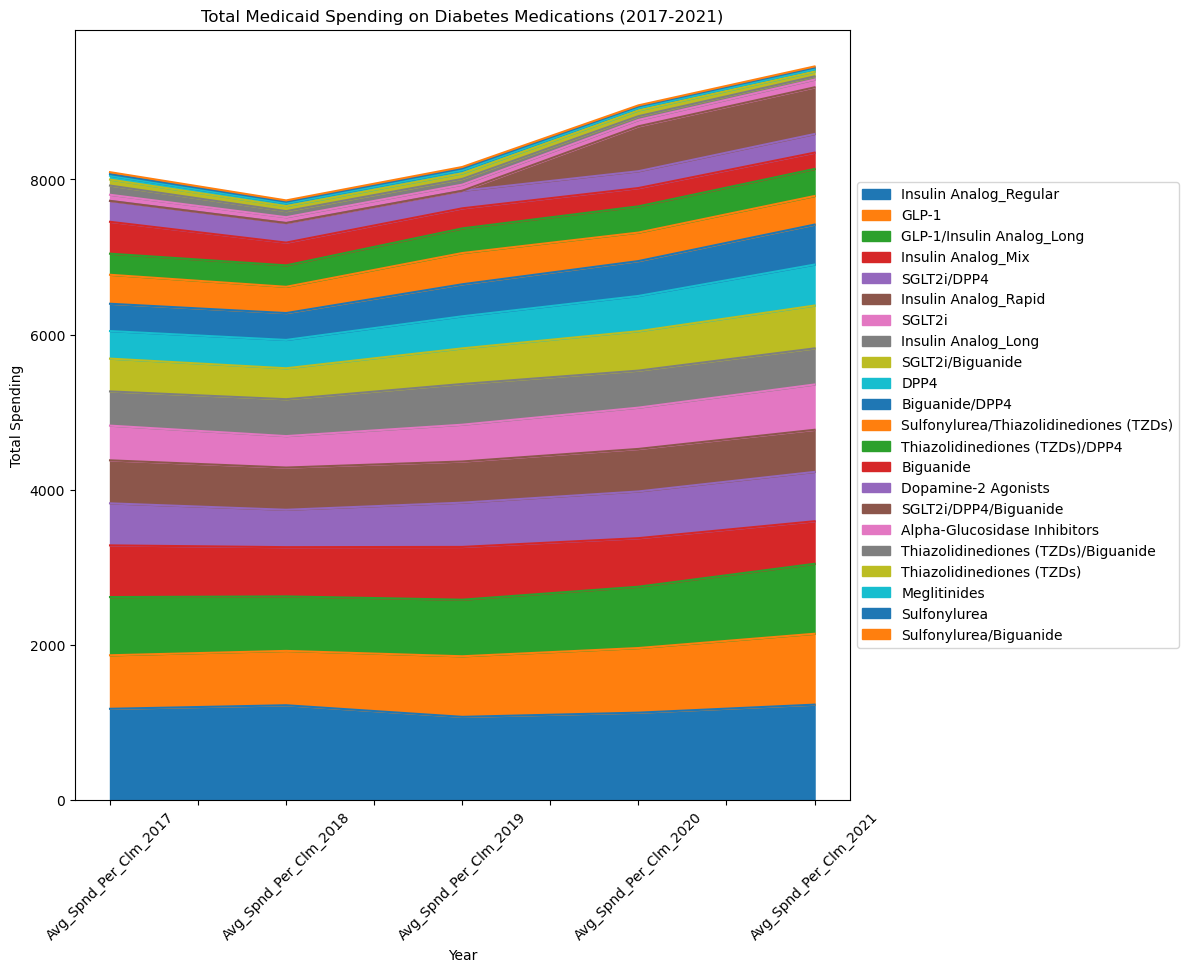

In [42]:
fig, ax=plt.subplots(figsize=(10, 10))

column_order = dm_spending_per_claim.sum().sort_values(ascending=False).index
dm_spending_per_claim = dm_spending_per_claim[column_order]

dm_spending_per_claim.plot(kind='area', stacked=True, ax=ax)
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.title('Total Medicaid Spending on Diabetes Medications (2017-2021)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # adjusts legend position
plt.xticks(rotation=45)  # rotates x-axis labels
#plt.tight_layout() 
plt.show()



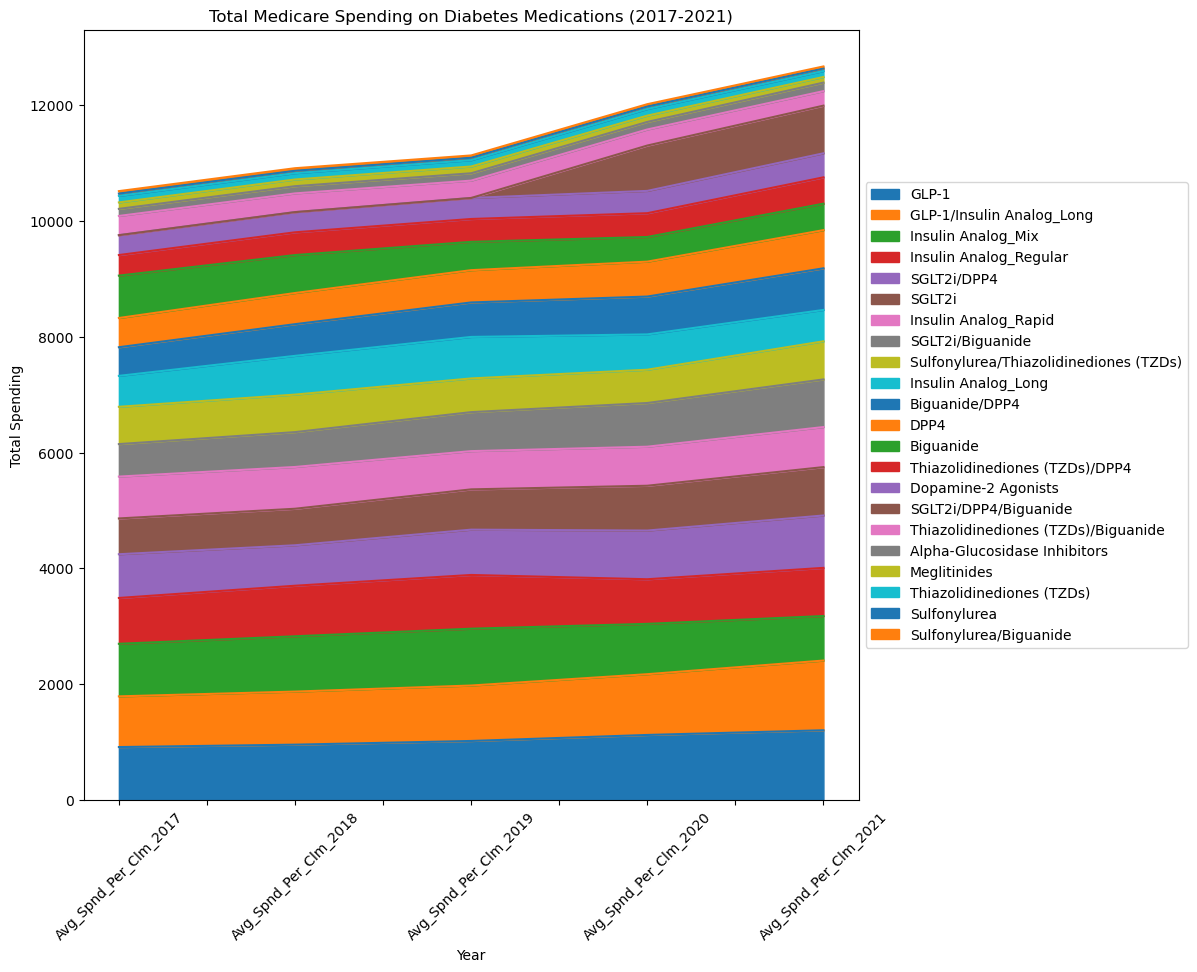

In [43]:
fig, ax=plt.subplots(figsize=(10, 10))

column_order = dm_medicare_spending_per_claim.sum().sort_values(ascending=False).index
dm_medicare_spending_per_claim = dm_medicare_spending_per_claim[column_order]

dm_medicare_spending_per_claim.plot(kind='area', stacked=True, ax=ax)
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.title('Total Medicare Spending on Diabetes Medications (2017-2021)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # adjusts legend position
plt.xticks(rotation=45)  # rotates x-axis labels
#plt.tight_layout() 
plt.show()



In [44]:
popular_dm_meds=dm_medicaid_spending[dm_medicaid_spending['Mftr_Name']!='Overall'].groupby('Pharmacy_Class')[['Tot_Clms_2017','Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']].sum()
popular_dm_meds

Tot_Clms_2017  Tot_Clms_2018  \
Pharmacy_Class                                                         
Alpha-Glucosidase Inhibitors                  62185.0        62300.0   
Biguanide                                  11760267.0     11354482.0   
Biguanide/DPP4                               511220.0       521242.0   
DPP4                                        1881074.0      1904088.0   
Dopamine-2 Agonists                           33364.0        32322.0   
GLP-1                                        716717.0      1012649.0   
GLP-1/Insulin Analog_Long                      2470.0        10630.0   
Insulin Analog_Long                         4409500.0      4536336.0   
Insulin Analog_Mix                           348242.0       316216.0   
Insulin Analog_Rapid                        3450724.0      3424155.0   
Insulin Analog_Regular                        60084.0        67631.0   
Meglitinides                                  81142.0        77690.0   
SGLT2i                                       752331.0       900170.0   
SGLT2i/Biguanide                              61136.0        64700.0   
SGLT2i/DPP4                                    8647.0        11700.0   
SGLT2i/DPP4/Biguanide                             0.0            0.0   
Sulfonylurea                                4093357.0      3949632.0   
Sulfonylurea/Biguanide                       184846.0       162973.0   
Sulfonylurea/Thiazolidinediones (TZDs)          931.0         1243.0   
Thiazolidinediones (TZDs)                    579856.0       623981.0   
Thiazolidinediones (TZDs)/Biguanide           15228.0        14845.0   
Thiazolidinediones (TZDs)/DPP4                 9687.0         8610.0   

                                        Tot_Clms_2019  Tot_Clms_2020  \
Pharmacy_Class                                                         
Alpha-Glucosidase Inhibitors                  61902.0        60142.0   
Biguanide                                  11093149.0     11165503.0   
Biguanide/DPP4                               509874.0       418321.0   
DPP4                                        1826292.0      1742507.0   
Dopamine-2 Agonists                           31001.0        29292.0   
GLP-1                                       1451694.0      1966782.0   
GLP-1/Insulin Analog_Long                     15820.0        17659.0   
Insulin Analog_Long                         4713963.0      4731371.0   
Insulin Analog_Mix                           286122.0       253610.0   
Insulin Analog_Rapid                        3468863.0      3547440.0   
Insulin Analog_Regular                        72785.0        78578.0   
Meglitinides                                  73758.0        71641.0   
SGLT2i                                      1110979.0      1514155.0   
SGLT2i/Biguanide                              73202.0        89088.0   
SGLT2i/DPP4                                   15726.0        19217.0   
SGLT2i/DPP4/Biguanide                             0.0          167.0   
Sulfonylurea                                3690293.0      3522800.0   
Sulfonylurea/Biguanide                       138923.0       122716.0   
Sulfonylurea/Thiazolidinediones (TZDs)         1250.0         1177.0   
Thiazolidinediones (TZDs)                    638622.0       650429.0   
Thiazolidinediones (TZDs)/Biguanide           13239.0        11621.0   
Thiazolidinediones (TZDs)/DPP4                 6097.0         4735.0   

                                        Tot_Clms_2021  
Pharmacy_Class                                         
Alpha-Glucosidase Inhibitors                    60667  
Biguanide                                    11532593  
Biguanide/DPP4                                 408290  
DPP4                                          1741909  
Dopamine-2 Agonists                             28259  
GLP-1                                         2807520  
GLP-1/Insulin Analog_Long                       17395  
Insulin Analog_Long                           4623991  
Insulin Analog_Mix    

In [45]:
popular_dm_medicare_meds=dm_medicare_spending[dm_medicare_spending['Mftr_Name']!='Overall'].groupby('Pharmacy_Class')[['Tot_Clms_2017','Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']].sum()
popular_dm_medicare_meds

Tot_Clms_2017  Tot_Clms_2018  \
Pharmacy_Class                                                         
Alpha-Glucosidase Inhibitors                 198521.0       197403.0   
Biguanide                                  30018382.0     30088444.0   
Biguanide/DPP4                              1766260.0      1750364.0   
DPP4                                        7025016.0      7016342.0   
Dopamine-2 Agonists                           56694.0        55497.0   
GLP-1                                       2607817.0      3528587.0   
GLP-1/Insulin Analog_Long                     11454.0        69018.0   
Insulin Analog_Long                        10071181.0     10249159.0   
Insulin Analog_Mix                          1246664.0      1142505.0   
Insulin Analog_Rapid                        6316454.0      6444892.0   
Insulin Analog_Regular                       871673.0       837586.0   
Meglitinides                                 504278.0       564875.0   
SGLT2i                                      1982244.0      2340224.0   
SGLT2i/Biguanide                             182347.0       218128.0   
SGLT2i/DPP4                                   33239.0        45089.0   
SGLT2i/DPP4/Biguanide                             0.0            0.0   
Sulfonylurea                               12507627.0     13472500.0   
Sulfonylurea/Biguanide                       412332.0       414713.0   
Sulfonylurea/Thiazolidinediones (TZDs)         5087.0         4340.0   
Thiazolidinediones (TZDs)                   2430016.0      2589655.0   
Thiazolidinediones (TZDs)/Biguanide           76590.0        85444.0   
Thiazolidinediones (TZDs)/DPP4                10743.0         7076.0   

                                        Tot_Clms_2019  Tot_Clms_2020  \
Pharmacy_Class                                                         
Alpha-Glucosidase Inhibitors                 195314.0       190641.0   
Biguanide                                  30952397.0     31864270.0   
Biguanide/DPP4                              1728687.0      1670986.0   
DPP4                                        6969088.0      6746835.0   
Dopamine-2 Agonists                           53499.0        49743.0   
GLP-1                                       4794387.0      6051255.0   
GLP-1/Insulin Analog_Long                    150049.0       196362.0   
Insulin Analog_Long                        10716118.0     10919872.0   
Insulin Analog_Mix                          1031183.0       921366.0   
Insulin Analog_Rapid                        6483823.0      6215323.0   
Insulin Analog_Regular                       794277.0       732106.0   
Meglitinides                                 555928.0       534302.0   
SGLT2i                                      3056192.0      4183804.0   
SGLT2i/Biguanide                             275797.0       357611.0   
SGLT2i/DPP4                                   63556.0        82508.0   
SGLT2i/DPP4/Biguanide                             0.0         1851.0   
Sulfonylurea                               13927751.0     14039000.0   
Sulfonylurea/Biguanide                       394512.0       366459.0   
Sulfonylurea/Thiazolidinediones (TZDs)         3958.0         3590.0   
Thiazolidinediones (TZDs)                   2683992.0      2818904.0   
Thiazolidinediones (TZDs)/Biguanide           74776.0        65087.0   
Thiazolidinediones (TZDs)/DPP4                 5754.0         4191.0   

                                        Tot_Clms_2021  
Pharmacy_Class                                         
Alpha-Glucosidase Inhibitors                   182785  
Biguanide                                    31914279  
Biguanide/DPP4                                1575032  
DPP4                                          6423543  
Dopamine-2 Agonists                             44994  
GLP-1                                         7722612  
GLP-1/Insulin Analog_Long                      217822  
Insulin Analog_Long                          10774575  
Insulin Analog_Mix    

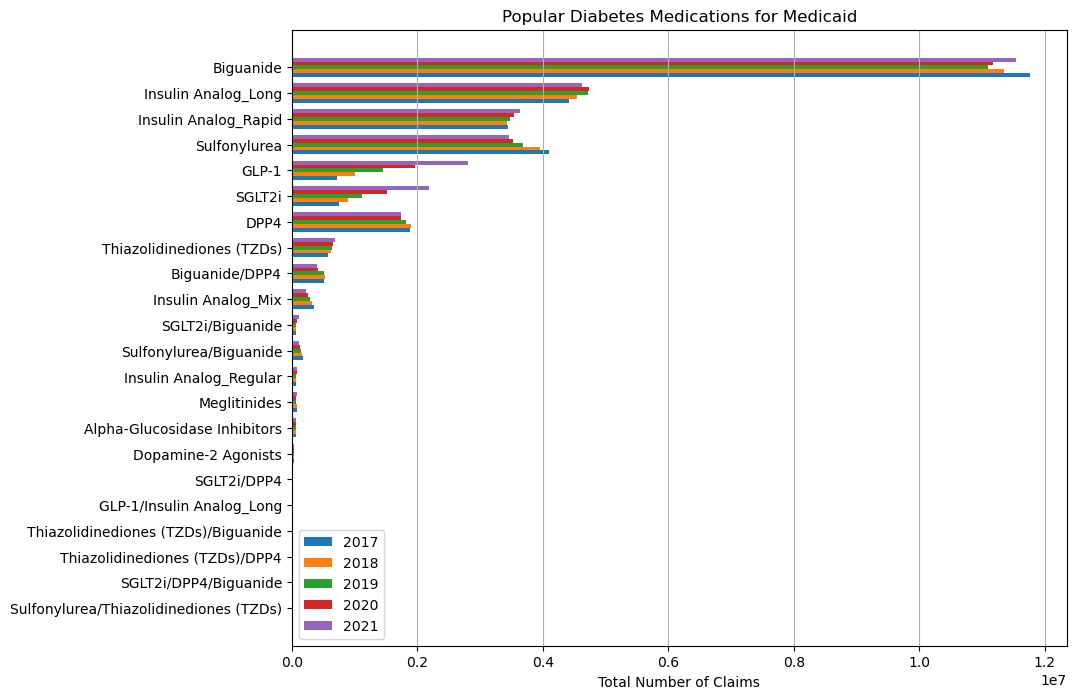

In [46]:
popular_dm_meds = popular_dm_meds.sort_values(by=['Tot_Clms_2021'],ascending=True)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10,8))

# Number of bars (one for each Pharmacy Class)
N = len(popular_dm_meds.index)

# Position of bars on x axis
ind = np.arange(N)

# Width of a bar
width = 0.15

# Plotting
bar1 = ax.barh(ind - width*2, popular_dm_meds['Tot_Clms_2017'], width, label='2017')
bar2 = ax.barh(ind - width, popular_dm_meds['Tot_Clms_2018'], width, label='2018')
bar3 = ax.barh(ind, popular_dm_meds['Tot_Clms_2019'], width, label='2019')
bar4 = ax.barh(ind + width, popular_dm_meds['Tot_Clms_2020'], width, label='2020')
bar5 = ax.barh(ind + width*2, popular_dm_meds['Tot_Clms_2021'], width, label='2021')

# Adding labels, title and axes ticks
ax.set_xlabel('Total Number of Claims')
ax.set_title('Popular Diabetes Medications for Medicaid')
ax.set_yticks(ind)
ax.set_yticklabels(popular_dm_meds.index)
ax.legend()

# This call makes the individual bars more distinguishable by adding horizontal lines on the y axis.
ax.grid(axis='x')

plt.show()


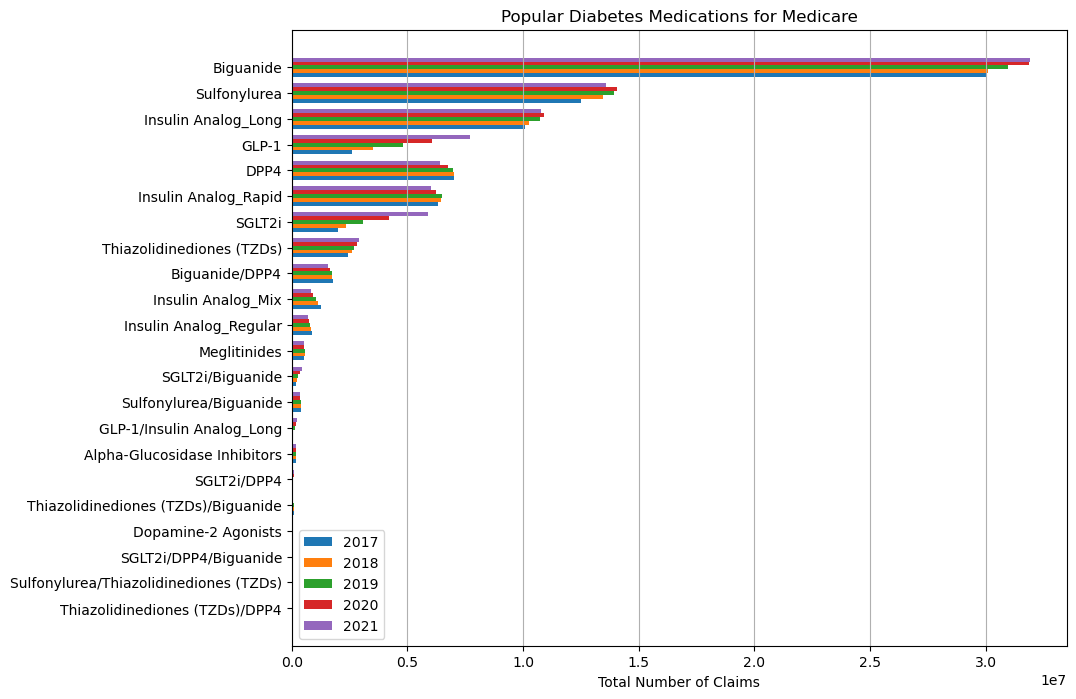

In [47]:
popular_dm_medicare_meds = popular_dm_medicare_meds.sort_values(by=['Tot_Clms_2021'],ascending=True)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10,8))

# Number of bars (one for each Pharmacy Class)
N = len(popular_dm_medicare_meds.index)

# Position of bars on x axis
ind = np.arange(N)

# Width of a bar
width = 0.15

# Plotting
bar1 = ax.barh(ind - width*2, popular_dm_medicare_meds['Tot_Clms_2017'], width, label='2017')
bar2 = ax.barh(ind - width, popular_dm_medicare_meds['Tot_Clms_2018'], width, label='2018')
bar3 = ax.barh(ind, popular_dm_medicare_meds['Tot_Clms_2019'], width, label='2019')
bar4 = ax.barh(ind + width, popular_dm_medicare_meds['Tot_Clms_2020'], width, label='2020')
bar5 = ax.barh(ind + width*2, popular_dm_medicare_meds['Tot_Clms_2021'], width, label='2021')

# Adding labels, title and axes ticks
ax.set_xlabel('Total Number of Claims')
ax.set_title('Popular Diabetes Medications for Medicare')
ax.set_yticks(ind)
ax.set_yticklabels(popular_dm_medicare_meds.index)
ax.legend()

# This call makes the individual bars more distinguishable by adding horizontal lines on the y axis.
ax.grid(axis='x')

plt.show()


In [112]:
trendy_dm=popular_dm_meds.loc[popular_dm_meds.index.isin(['GLP-1','SGLT2i','Insulin Analog_Long', 'Insulin Analog_Rapid']),:]
trendy_dm= trendy_dm.reset_index()
trendy_dm

Pharmacy_Class  Tot_Clms_2017  Tot_Clms_2018  Tot_Clms_2019  \
0                SGLT2i       752331.0       900170.0      1110979.0   
1                 GLP-1       716717.0      1012649.0      1451694.0   
2  Insulin Analog_Rapid      3450724.0      3424155.0      3468863.0   
3   Insulin Analog_Long      4409500.0      4536336.0      4713963.0   

   Tot_Clms_2020  Tot_Clms_2021  
0      1514155.0        2191378  
1      1966782.0        2807520  
2      3547440.0        3630720  
3      4731371.0        4623991

In [111]:
trendy_dm_medicare=popular_dm_medicare_meds.loc[popular_dm_medicare_meds.index.isin(['GLP-1','SGLT2i', 'Insulin Analog_Long', 'Insulin Analog_Rapid']),:]
trendy_dm_medicare=trendy_dm_medicare.reset_index()
trendy_dm_medicare

Pharmacy_Class  Tot_Clms_2017  Tot_Clms_2018  Tot_Clms_2019  \
0                SGLT2i      1982244.0      2340224.0      3056192.0   
1  Insulin Analog_Rapid      6316454.0      6444892.0      6483823.0   
2                 GLP-1      2607817.0      3528587.0      4794387.0   
3   Insulin Analog_Long     10071181.0     10249159.0     10716118.0   

   Tot_Clms_2020  Tot_Clms_2021  
0      4183804.0        5866143  
1      6215323.0        6029192  
2      6051255.0        7722612  
3     10919872.0       10774575

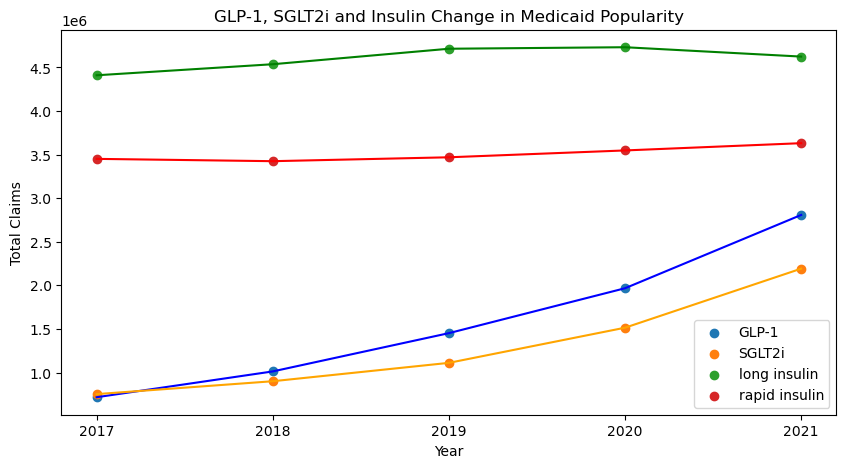

In [118]:

GLP1_trend=trendy_dm[trendy_dm['Pharmacy_Class']=='GLP-1']
SGLT2i_trend=trendy_dm[trendy_dm['Pharmacy_Class']=='SGLT2i']
long_trend=trendy_dm[trendy_dm['Pharmacy_Class']=='Insulin Analog_Long']
rapid_trend=trendy_dm[trendy_dm['Pharmacy_Class']=='Insulin Analog_Rapid']
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 5))

# Create the scatter plot
plt.scatter(years, GLP1_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='GLP-1')
plt.scatter(years, SGLT2i_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='SGLT2i')
plt.scatter(years, long_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='long insulin')
plt.scatter(years, rapid_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='rapid insulin')

plt.plot(years, GLP1_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='blue')
plt.plot(years, SGLT2i_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='orange')
plt.plot(years, long_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='green')
plt.plot(years, rapid_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='red')

plt.xlabel('Year')
plt.ylabel('Total Claims')
plt.title('GLP-1, SGLT2i and Insulin Change in Medicaid Popularity')
plt.legend()
plt.show()

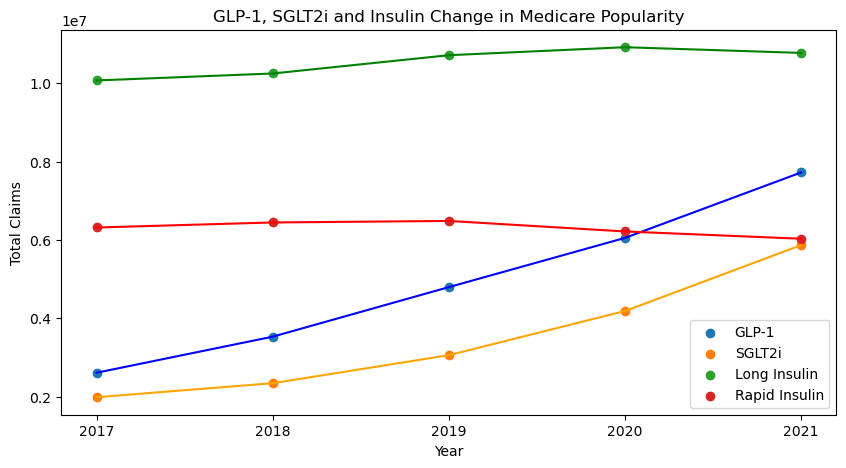

In [121]:

GLP1_trend=trendy_dm_medicare[trendy_dm_medicare['Pharmacy_Class']=='GLP-1']
SGLT2i_trend=trendy_dm_medicare[trendy_dm_medicare['Pharmacy_Class']=='SGLT2i']
rapid_trend=trendy_dm_medicare[trendy_dm_medicare['Pharmacy_Class']=='Insulin Analog_Rapid']
long_trend=trendy_dm_medicare[trendy_dm_medicare['Pharmacy_Class']=='Insulin Analog_Long']
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 5))

# Create the scatter plot
plt.scatter(years, GLP1_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='GLP-1')
plt.scatter(years, SGLT2i_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='SGLT2i')
plt.scatter(years, long_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='Long Insulin')
plt.scatter(years, rapid_trend[['Tot_Clms_2017', 'Tot_Clms_2018','Tot_Clms_2019','Tot_Clms_2020','Tot_Clms_2021']], label='Rapid Insulin')


plt.plot(years, GLP1_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='blue')
plt.plot(years, SGLT2i_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='orange')
plt.plot(years, long_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='green')
plt.plot(years, rapid_trend[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].values[0], linestyle='-', color='red')


plt.xlabel('Year')
plt.ylabel('Total Claims')
plt.title('GLP-1, SGLT2i and Insulin Change in Medicare Popularity')
plt.legend()
plt.show()

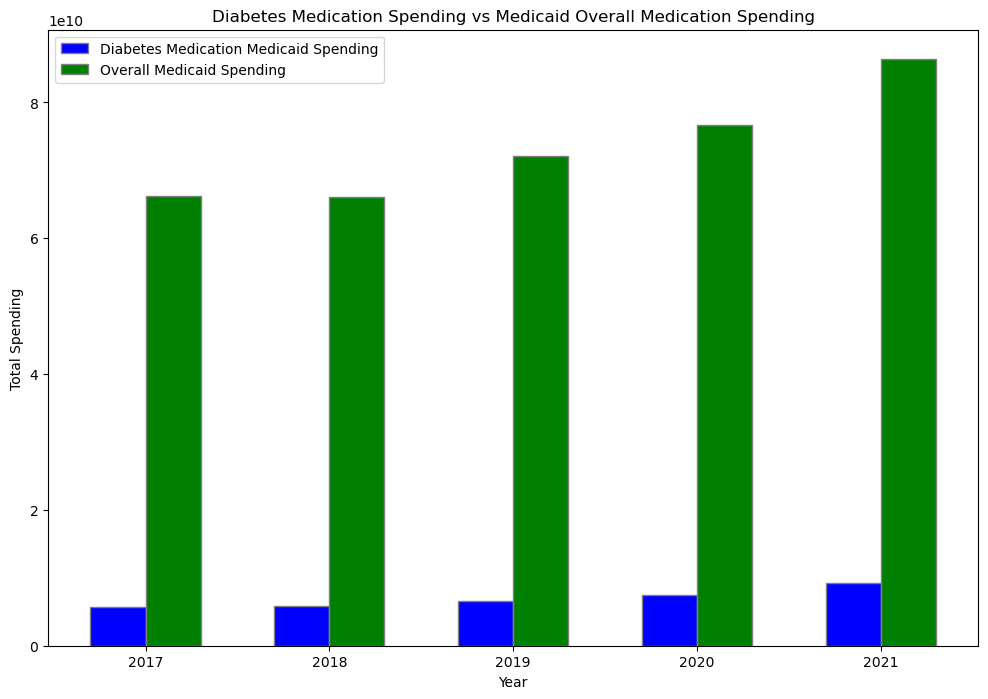

In [52]:
# Data
years = ['2017', '2018', '2019', '2020', '2021']
dm_overall_spending = dm_medicaid_spending.loc[dm_medicaid_spending['Mftr_Name'] != 'Overall', ['Tot_Spndng_2017','Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()
overall_spending = medicaid_spending.loc[medicaid_spending['Mftr_Name']!='Overall', ['Tot_Spndng_2017','Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()

# Width of a bar 
width = 0.3       

# Plotting
plt.subplots(figsize =(12, 8)) 
bar1 = np.arange(len(years)) 
bar2 = [x + width for x in bar1] 
  
plt.bar(bar1, dm_overall_spending, color ='b', width = width, edgecolor ='grey', label ='Diabetes Medication Medicaid Spending') 
plt.bar(bar2, overall_spending, color ='g', width = width, edgecolor ='grey', label ='Overall Medicaid Spending') 
  
# Adding xticks  
plt.xlabel('Year') 
plt.ylabel('Total Spending') 
plt.title('Diabetes Medication Spending vs Medicaid Overall Medication Spending')
plt.xticks([r + width / 2 for r in range(len(dm_spending))], years) 

  
plt.legend(loc="upper left")
plt.show()


In [53]:
# convert pandas Series to lists for calculation
dm_spending_list = dm_overall_spending.tolist()
total_spending_list = overall_spending.tolist()

# Calculate the percentage of spending that is diabetes spending
percentage_spending = [dm/total * 100 for dm, total in zip(dm_spending_list, total_spending_list)]

# Calculate the percentage of spending that is other than diabetes (remaining)
remaining_spending = [100 - percent for percent in percentage_spending]


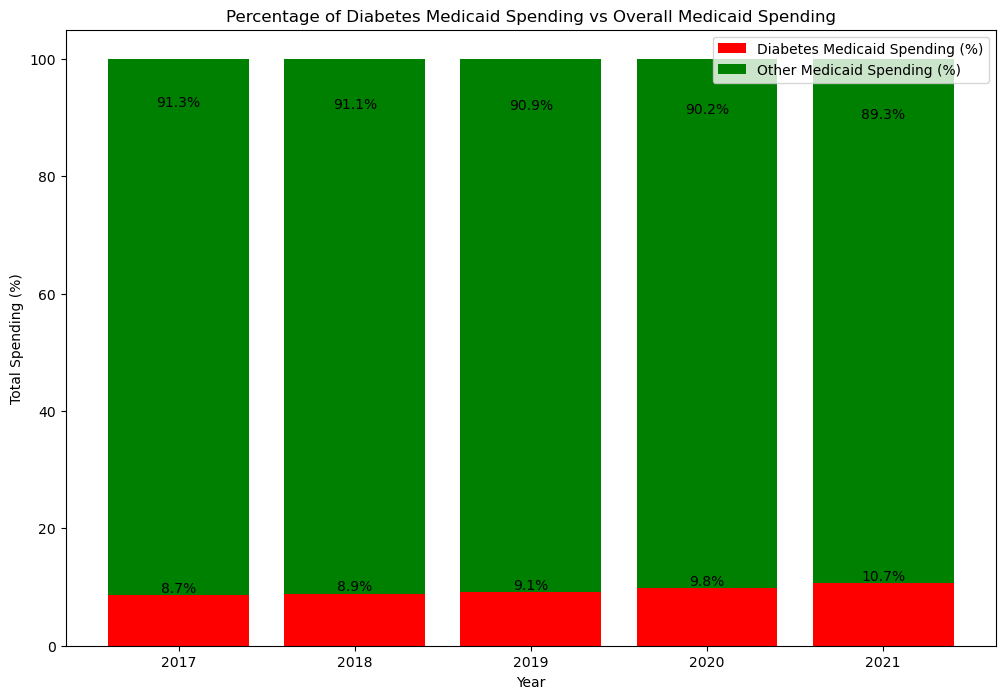

In [54]:
fig, ax = plt.subplots(figsize =(12, 8)) 

bar1 = ax.bar(years, percentage_spending, color ='r', label ='Diabetes Medicaid Spending (%)') 
bar2 = ax.bar(years, remaining_spending, bottom=percentage_spending, color ='g', label ='Other Medicaid Spending (%)') 

plt.xlabel('Year') 
plt.ylabel('Total Spending (%)') 
plt.legend(loc="upper right")
plt.title('Percentage of Diabetes Medicaid Spending vs Overall Medicaid Spending')

# Adding the percentage values
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


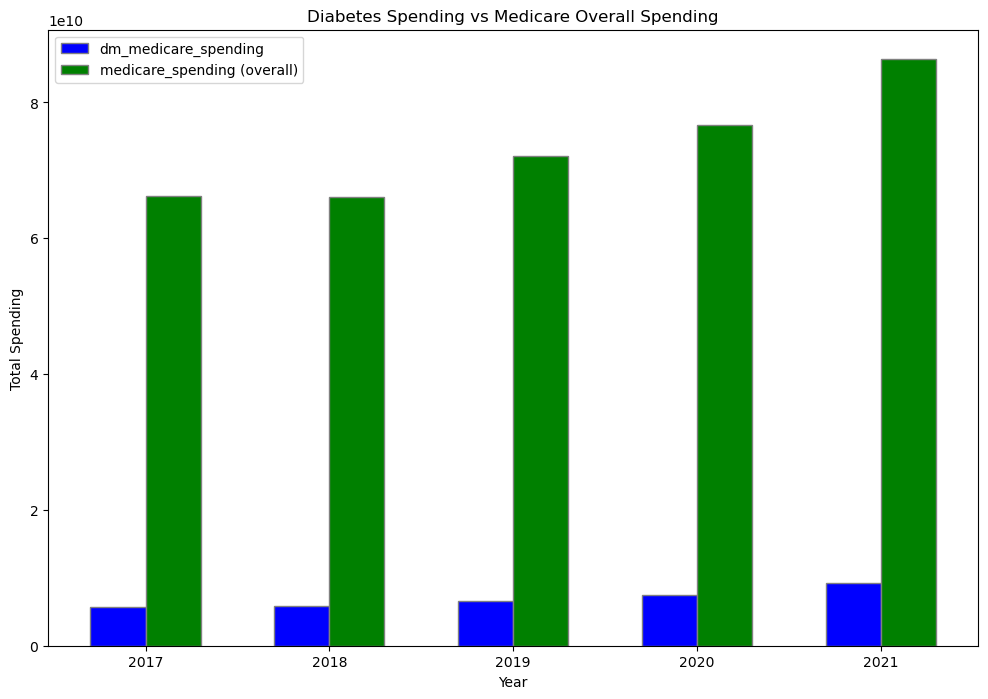

In [55]:
# Data
years = ['2017', '2018', '2019', '2020', '2021']
dm_overall_medicare_spending = dm_medicare_spending[['Tot_Spndng_2017','Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()
overall_medicare_spending = partD[['Tot_Spndng_2017','Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum()

# Width of a bar 
width = 0.3       

# Plotting
plt.subplots(figsize =(12, 8)) 
bar1 = np.arange(len(years)) 
bar2 = [x + width for x in bar1] 
  
plt.bar(bar1, dm_overall_spending, color ='b', width = width, edgecolor ='grey', label ='dm_medicare_spending') 
plt.bar(bar2, overall_spending, color ='g', width = width, edgecolor ='grey', label ='medicare_spending (overall)') 
  
# Adding xticks  
plt.xlabel('Year') 
plt.ylabel('Total Spending') 
plt.title('Diabetes Spending vs Medicare Overall Spending')
plt.xticks([r + width / 2 for r in range(len(dm_spending))], years) 
  
plt.legend(loc="upper left")
plt.show()


In [56]:
# convert pandas Series to lists for calculation
dm_medicare_spending_list = dm_overall_medicare_spending.tolist()
total_medicare_spending_list = overall_medicare_spending.tolist()

# Calculate the percentage of spending that is diabetes spending
percentage_medicare_spending = [dm/total * 100 for dm, total in zip(dm_medicare_spending_list, total_medicare_spending_list)]

# Calculate the percentage of spending that is other than diabetes (remaining)
remaining_medicare_spending = [100 - percent for percent in percentage_medicare_spending]


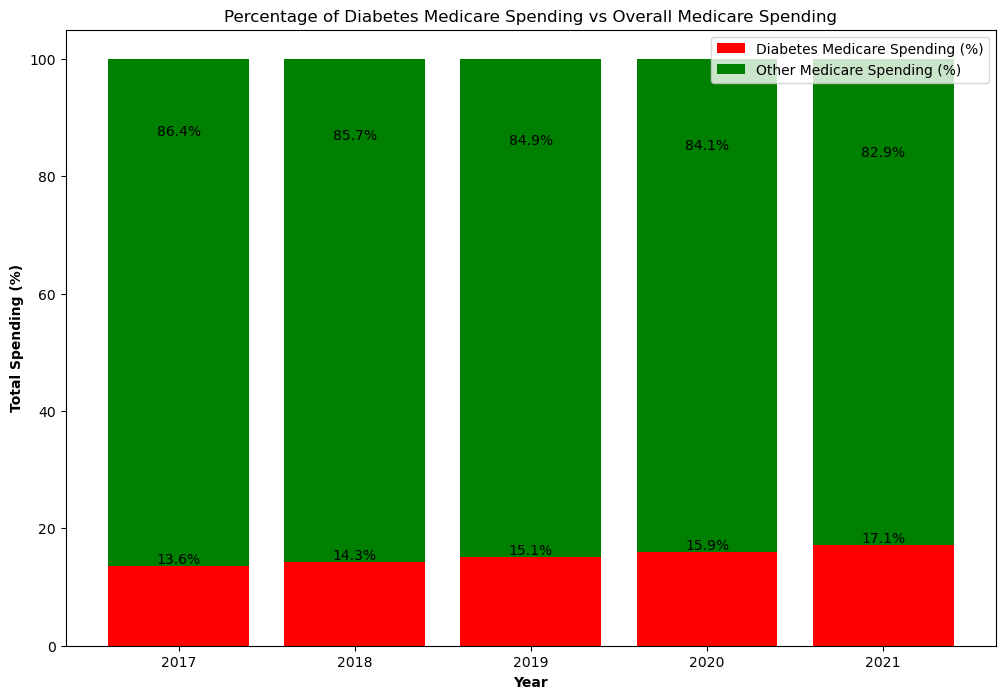

In [57]:
fig, ax = plt.subplots(figsize =(12, 8)) 

bar1 = ax.bar(years, percentage_medicare_spending, color ='r', label ='Diabetes Medicare Spending (%)') 
bar2 = ax.bar(years, remaining_medicare_spending, bottom=percentage_medicare_spending, color ='g', label ='Other Medicare Spending (%)') 

plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Total Spending (%)', fontweight ='bold') 
plt.legend(loc="upper right")
plt.title('Percentage of Diabetes Medicare Spending vs Overall Medicare Spending')

# Adding the percentage values
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


In [58]:
Spnd_Per_Clm=dm_medicaid_spending[dm_medicaid_spending['Mftr_Name']=='Overall'][['Brnd_Name', 'Gnrc_Name', 'Pharmacy_Class','Avg_Spnd_Per_Clm_2017','Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']]
GLP1_Spnd_Per_Clm=Spnd_Per_Clm[Spnd_Per_Clm['Pharmacy_Class']=='GLP-1']
GLP1_Spnd_Per_Clm

Brnd_Name               Gnrc_Name Pharmacy_Class  \
286           Adlyxin            Lixisenatide          GLP-1   
2029   Bydureon Bcise  Exenatide Microspheres          GLP-1   
2031     Bydureon Pen  Exenatide Microspheres          GLP-1   
2033           Byetta               Exenatide          GLP-1   
11373         Ozempic             Semaglutide          GLP-1   
13163        Rybelsus             Semaglutide          GLP-1   
13223         Saxenda             Liraglutide          GLP-1   
14947       Trulicity             Dulaglutide          GLP-1   
15367   Victoza 2-Pak             Liraglutide          GLP-1   
15369   Victoza 3-Pak             Liraglutide          GLP-1   
15659          Wegovy             Semaglutide          GLP-1   

       Avg_Spnd_Per_Clm_2017  Avg_Spnd_Per_Clm_2018  Avg_Spnd_Per_Clm_2019  \
286               430.028643             532.007691             613.524602   
2029                     NaN             624.821375             687.692039   
2031              622.079670             647.620688             698.857545   
2033              687.804581             716.728880             849.073604   
11373                    NaN             710.512577             787.615258   
13163                    NaN                    NaN             785.596262   
13223            1106.080440            1090.478307            1092.309026   
14947             676.469370             673.904179             772.151880   
15367             524.063430             527.268339             612.200840   
15369             785.752530             786.166843             914.260985   
15659                    NaN                    NaN                    NaN   

       Avg_Spnd_Per_Clm_2020  Avg_Spnd_Per_Clm_2021  
286               670.056596             701.275042  
2029              746.380002             784.156730  
2031              752.992839             793.767684  
2033              824.261572             872.132122  
11373             851.761190             909.675866  
13163             849.987450             903.444838  
13223            1150.186882            1215.189007  
14947             840.934349             912.669283  
15367             658.269387             715.636199  
15369             990.853079            1083.770220  
15659                    NaN            1163.776734

In [59]:
Medicare_Spnd_Per_Clm=dm_medicare_spending[dm_medicare_spending['Mftr_Name']=='Overall'][['Brnd_Name', 'Gnrc_Name', 'Pharmacy_Class','Avg_Spnd_Per_Clm_2017','Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']]
Medicare_GLP1_Spnd_Per_Clm=Medicare_Spnd_Per_Clm[Medicare_Spnd_Per_Clm['Pharmacy_Class']=='GLP-1']
Medicare_GLP1_Spnd_Per_Clm

Brnd_Name               Gnrc_Name Pharmacy_Class  \
12720       Trulicity             Dulaglutide          GLP-1   
1713   Bydureon Bcise  Exenatide Microspheres          GLP-1   
1715     Bydureon Pen  Exenatide Microspheres          GLP-1   
1717           Byetta               Exenatide          GLP-1   
11165         Saxenda             Liraglutide          GLP-1   
13182   Victoza 2-Pak             Liraglutide          GLP-1   
13184   Victoza 3-Pak             Liraglutide          GLP-1   
240           Adlyxin            Lixisenatide          GLP-1   
9556          Ozempic             Semaglutide          GLP-1   
11084        Rybelsus             Semaglutide          GLP-1   

       Avg_Spnd_Per_Clm_2017  Avg_Spnd_Per_Clm_2018  Avg_Spnd_Per_Clm_2019  \
12720             860.138133             983.330816            1062.865527   
1713              992.618710             898.916961             975.790666   
1715              814.998136             902.445386             979.088206   
1717              967.774574            1080.020786            1161.149341   
11165            1051.615385                    NaN                    NaN   
13182             635.284184             705.342062             802.569861   
13184            1084.344007            1205.511673            1362.197338   
240               881.051786             904.257571             830.074384   
9556                     NaN             939.303983            1055.192626   
11084                    NaN                    NaN             918.054500   

       Avg_Spnd_Per_Clm_2020  Avg_Spnd_Per_Clm_2021  
12720            1163.534470            1269.416731  
1713             1083.091010            1199.325353  
1715             1055.220115            1112.985194  
1717             1198.116039            1340.177185  
11165                    NaN            1064.241111  
13182             872.325208             957.217784  
13184            1485.575335            1607.217411  
240               935.994366             924.195603  
9556             1209.007827            1300.329459  
11084            1078.621383            1235.704602

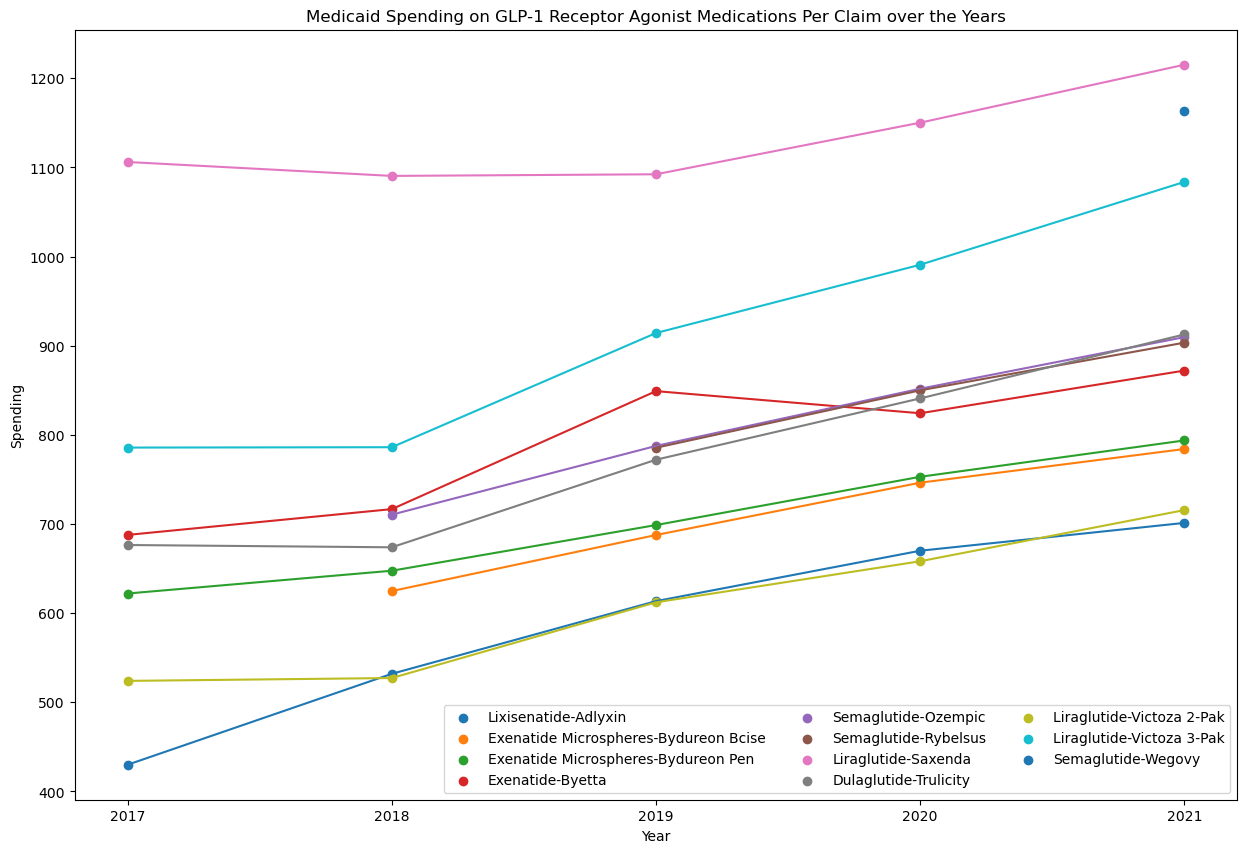

In [123]:
gnrc_names = GLP1_Spnd_Per_Clm['Gnrc_Name']
brnd_names = GLP1_Spnd_Per_Clm['Brnd_Name']
spending = GLP1_Spnd_Per_Clm[['Avg_Spnd_Per_Clm_2017', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(15, 10))
# Loop over each row of spending
for i in range(spending.shape[0]):
    plt.scatter(years, spending.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i])
    plt.plot(years, spending.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicaid Spending on GLP-1 Receptor Agonist Medications Per Claim over the Years')
plt.legend(loc='lower right', ncol=3)
plt.show()

Note: Wegovy was FDA cleared in 2021 and Adlyxin is no longer available in the US. It appears medicaid pays approximately $700-1200 per claim in 2021.

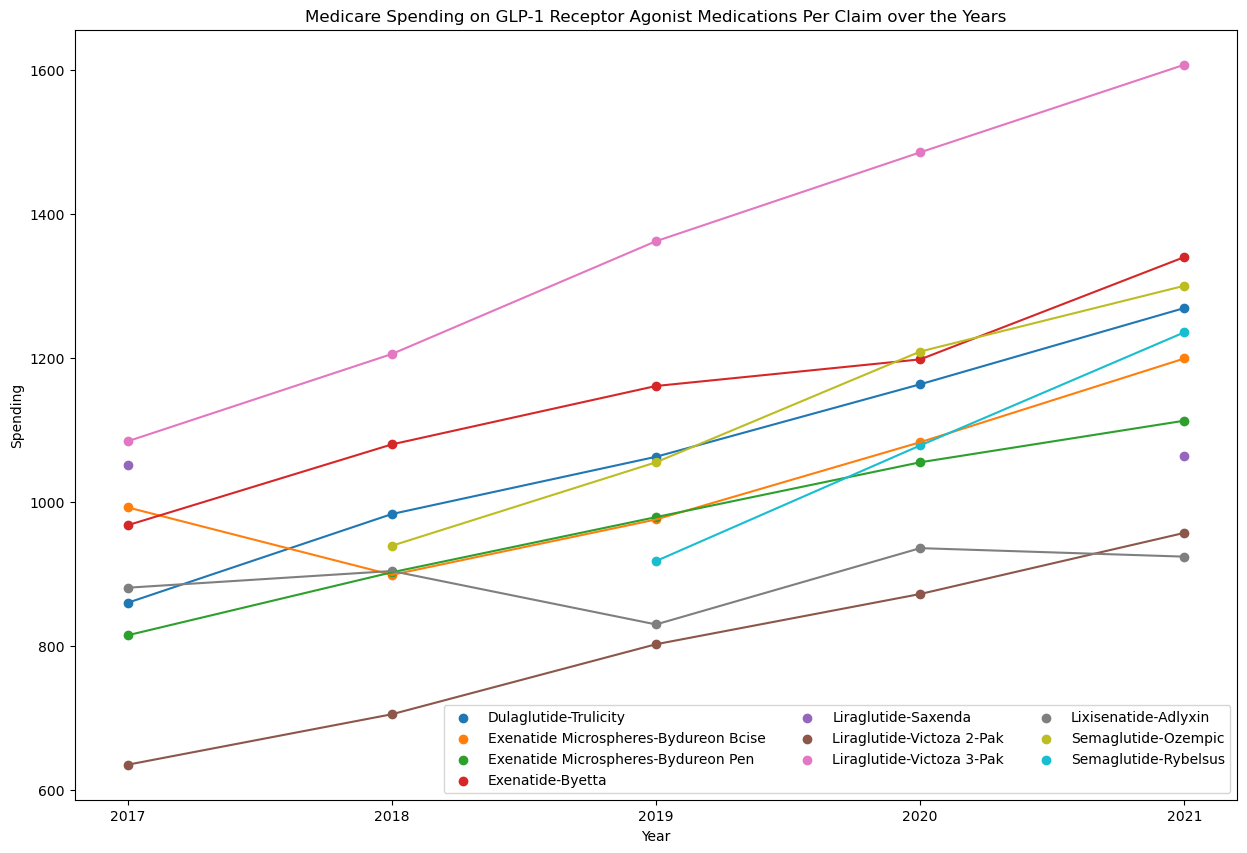

In [124]:
gnrc_names = Medicare_GLP1_Spnd_Per_Clm['Gnrc_Name']
brnd_names = Medicare_GLP1_Spnd_Per_Clm['Brnd_Name']
spending = Medicare_GLP1_Spnd_Per_Clm[['Avg_Spnd_Per_Clm_2017', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(15, 10))
# Loop over each row of spending
for i in range(spending.shape[0]):
    plt.scatter(years, spending.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i])
    plt.plot(years, spending.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on GLP-1 Receptor Agonist Medications Per Claim over the Years')
plt.legend(loc='lower right', ncol=3)
plt.show()

It appears Medicare pays $850-$1600 per claim for this class of medication in 2021.

In [62]:
GLP1_Spnd_Per_Clm = GLP1_Spnd_Per_Clm.copy()


exclude_brands = ['Ozempic', 'Bydureon Bcise', 'Rybelsus']
for year in range(2018, 2022):
    mask = ~GLP1_Spnd_Per_Clm['Brnd_Name'].isin(exclude_brands)  # mask for excluding specific brands
    GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2017']) / GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2017']

for year in range(2019, 2022):
    mask = GLP1_Spnd_Per_Clm['Brnd_Name'].isin(['Bydureon Bcise', 'Ozempic'])  # mask for 'Bydureon Bcise' and 'Ozempic'
    GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2018']) / GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2018']

for year in range(2020, 2022):
    mask = GLP1_Spnd_Per_Clm['Brnd_Name'] == 'Rybelsus'  # mask for 'Rybelsus'
    GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2019']) / GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2019']

    

  
GLP1_Avg_Change_Percent=GLP1_Spnd_Per_Clm[['Brnd_Name','Gnrc_Name','Pharmacy_Class','Avg_Change_Percent_2018', 'Avg_Change_Percent_2019', 'Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
GLP1_Avg_Change_Percent

Brnd_Name               Gnrc_Name Pharmacy_Class  \
286           Adlyxin            Lixisenatide          GLP-1   
2029   Bydureon Bcise  Exenatide Microspheres          GLP-1   
2031     Bydureon Pen  Exenatide Microspheres          GLP-1   
2033           Byetta               Exenatide          GLP-1   
11373         Ozempic             Semaglutide          GLP-1   
13163        Rybelsus             Semaglutide          GLP-1   
13223         Saxenda             Liraglutide          GLP-1   
14947       Trulicity             Dulaglutide          GLP-1   
15367   Victoza 2-Pak             Liraglutide          GLP-1   
15369   Victoza 3-Pak             Liraglutide          GLP-1   
15659          Wegovy             Semaglutide          GLP-1   

       Avg_Change_Percent_2018  Avg_Change_Percent_2019  \
286                   0.237145                 0.426706   
2029                       NaN                 0.100622   
2031                  0.041057                 0.123421   
2033                  0.042053                 0.234469   
11373                      NaN                 0.108517   
13163                      NaN                      NaN   
13223                -0.014106                -0.012451   
14947                -0.003792                 0.141444   
15367                 0.006115                 0.168181   
15369                 0.000527                 0.163548   
15659                      NaN                      NaN   

       Avg_Change_Percent_2020  Avg_Change_Percent_2021  
286                   0.558167                 0.630764  
2029                  0.194549                 0.255009  
2031                  0.210444                 0.275990  
2033                  0.198395                 0.267994  
11373                 0.198798                 0.280309  
13163                 0.081965                 0.150012  
13223                 0.039876                 0.098644  
14947                 0.243123                 0.349166  
15367                 0.256087                 0.365553  
15369                 0.261024                 0.379277  
15659                      NaN                      NaN

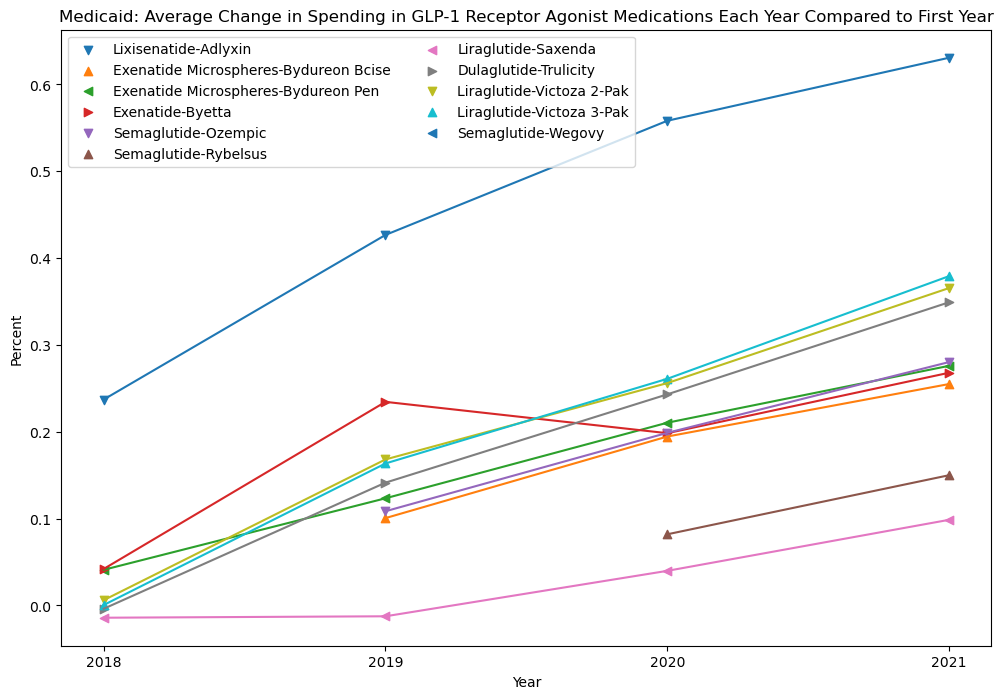

In [126]:
markers = ['v', '^', '<', '>']
gnrc_names = GLP1_Avg_Change_Percent['Gnrc_Name']
brnd_names = GLP1_Avg_Change_Percent['Brnd_Name']
percent = GLP1_Avg_Change_Percent[['Avg_Change_Percent_2018', 'Avg_Change_Percent_2019','Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
years = ['2018', '2019', '2020', '2021']

plt.figure(figsize=(12, 8))

# Loop over each row of spending
for i in range(percent.shape[0]):
    plt.scatter(years, percent.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i], marker=markers[i % len(markers)])
    plt.plot(years, percent.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Medicaid: Average Change in Spending in GLP-1 Receptor Agonist Medications Each Year Compared to First Year')


plt.legend(loc='upper left', ncol=2)
plt.show()


This shows a positive change in percentage in average spending per claim compared to 2017. If there is no data in 2017, then compared to 2018, and so on. The graph shows a positive, almost linear increase for each medication.

In [64]:
Medicare_Spnd_Per_Clm[Medicare_Spnd_Per_Clm['Pharmacy_Class']=='GLP-1']

Brnd_Name               Gnrc_Name Pharmacy_Class  \
12720       Trulicity             Dulaglutide          GLP-1   
1713   Bydureon Bcise  Exenatide Microspheres          GLP-1   
1715     Bydureon Pen  Exenatide Microspheres          GLP-1   
1717           Byetta               Exenatide          GLP-1   
11165         Saxenda             Liraglutide          GLP-1   
13182   Victoza 2-Pak             Liraglutide          GLP-1   
13184   Victoza 3-Pak             Liraglutide          GLP-1   
240           Adlyxin            Lixisenatide          GLP-1   
9556          Ozempic             Semaglutide          GLP-1   
11084        Rybelsus             Semaglutide          GLP-1   

       Avg_Spnd_Per_Clm_2017  Avg_Spnd_Per_Clm_2018  Avg_Spnd_Per_Clm_2019  \
12720             860.138133             983.330816            1062.865527   
1713              992.618710             898.916961             975.790666   
1715              814.998136             902.445386             979.088206   
1717              967.774574            1080.020786            1161.149341   
11165            1051.615385                    NaN                    NaN   
13182             635.284184             705.342062             802.569861   
13184            1084.344007            1205.511673            1362.197338   
240               881.051786             904.257571             830.074384   
9556                     NaN             939.303983            1055.192626   
11084                    NaN                    NaN             918.054500   

       Avg_Spnd_Per_Clm_2020  Avg_Spnd_Per_Clm_2021  
12720            1163.534470            1269.416731  
1713             1083.091010            1199.325353  
1715             1055.220115            1112.985194  
1717             1198.116039            1340.177185  
11165                    NaN            1064.241111  
13182             872.325208             957.217784  
13184            1485.575335            1607.217411  
240               935.994366             924.195603  
9556             1209.007827            1300.329459  
11084            1078.621383            1235.704602

In [65]:
Medicare_GLP1_Spnd_Per_Clm = Medicare_Spnd_Per_Clm[Medicare_Spnd_Per_Clm['Pharmacy_Class']=='GLP-1'].copy()


exclude_brands = ['Ozempic', 'Saxenda', 'Rybelsus']
for year in range(2018, 2022):
    mask = ~Medicare_GLP1_Spnd_Per_Clm['Brnd_Name'].isin(exclude_brands)  # mask for excluding specific brands
    Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2017']) / Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2017']

for year in range(2019, 2022):
    mask = Medicare_GLP1_Spnd_Per_Clm['Brnd_Name']=='Ozempic'  # mask for 'Bydureon Bcise' and 'Ozempic'
    Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2018']) / Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2018']

for year in range(2020, 2022):
    mask = Medicare_GLP1_Spnd_Per_Clm['Brnd_Name'] == 'Rybelsus'  # mask for 'Rybelsus'
    Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2019']) / Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2019']

for year in range(2021, 2022):
    mask = Medicare_GLP1_Spnd_Per_Clm['Brnd_Name']=='Saxenda'  # mask for excluding specific brands
    Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Change_Percent_{year}'] = (Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_{year}'] - Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2017']) / Medicare_GLP1_Spnd_Per_Clm.loc[mask, f'Avg_Spnd_Per_Clm_2017']
    

  
Medicare_GLP1_Avg_Change_Percent=Medicare_GLP1_Spnd_Per_Clm[['Brnd_Name','Gnrc_Name','Pharmacy_Class','Avg_Change_Percent_2018', 'Avg_Change_Percent_2019', 'Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
Medicare_GLP1_Avg_Change_Percent

Brnd_Name               Gnrc_Name Pharmacy_Class  \
12720       Trulicity             Dulaglutide          GLP-1   
1713   Bydureon Bcise  Exenatide Microspheres          GLP-1   
1715     Bydureon Pen  Exenatide Microspheres          GLP-1   
1717           Byetta               Exenatide          GLP-1   
11165         Saxenda             Liraglutide          GLP-1   
13182   Victoza 2-Pak             Liraglutide          GLP-1   
13184   Victoza 3-Pak             Liraglutide          GLP-1   
240           Adlyxin            Lixisenatide          GLP-1   
9556          Ozempic             Semaglutide          GLP-1   
11084        Rybelsus             Semaglutide          GLP-1   

       Avg_Change_Percent_2018  Avg_Change_Percent_2019  \
12720                 0.143224                 0.235692   
1713                 -0.094399                -0.016953   
1715                  0.107297                 0.201338   
1717                  0.115984                 0.199814   
11165                      NaN                      NaN   
13182                 0.110278                 0.263324   
13184                 0.111743                 0.256241   
240                   0.026339                -0.057860   
9556                       NaN                 0.123377   
11084                      NaN                      NaN   

       Avg_Change_Percent_2020  Avg_Change_Percent_2021  
12720                 0.352730                 0.475829  
1713                  0.091145                 0.208244  
1715                  0.294752                 0.365629  
1717                  0.238011                 0.384803  
11165                      NaN                 0.012006  
13182                 0.373126                 0.506755  
13184                 0.370022                 0.482203  
240                   0.062360                 0.048969  
9556                  0.287132                 0.384354  
11084                 0.174899                 0.346004

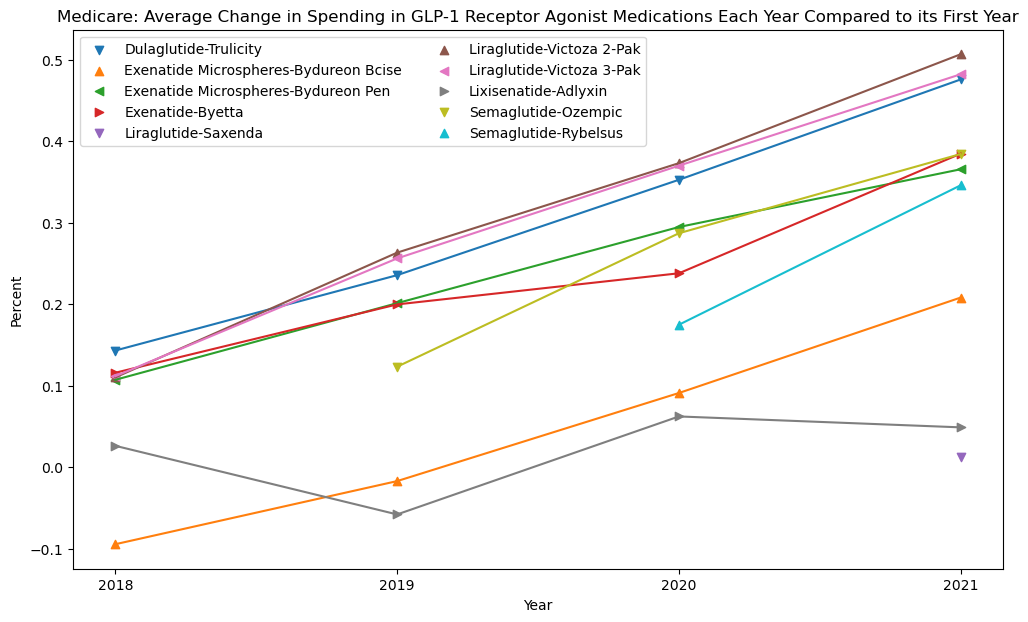

In [128]:
markers = ['v', '^', '<', '>']
gnrc_names = Medicare_GLP1_Avg_Change_Percent['Gnrc_Name']
brnd_names = Medicare_GLP1_Avg_Change_Percent['Brnd_Name']
percent = Medicare_GLP1_Avg_Change_Percent[['Avg_Change_Percent_2018', 'Avg_Change_Percent_2019','Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
years = ['2018', '2019', '2020', '2021']

plt.figure(figsize=(12, 7))

# Loop over each row of spending
for i in range(percent.shape[0]):
    plt.scatter(years, percent.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i], marker=markers[i % len(markers)])
    plt.plot(years, percent.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Medicare: Average Change in Spending in GLP-1 Receptor Agonist Medications Each Year Compared to its First Year')


plt.legend(loc='upper left', ncol=2)
plt.show()


Some medications were dropped because there were too many NaNs. Overall, a positive increase except Adlyxin, which is now no longer in the market.

In [67]:
dm_medicaid_spending[dm_medicaid_spending['Gnrc_Name'].str.contains('Ertugliflozin')]

Brnd_Name                  Gnrc_Name    Pharmacy_Class  Tot_Mftr  \
13247  Segluromet    Ertugliflozin/Metformin  SGLT2i/Biguanide         1   
13248  Segluromet    Ertugliflozin/Metformin  SGLT2i/Biguanide         1   
13729   Steglatro     Ertugliflozin Pidolate            SGLT2i         1   
13730   Steglatro     Ertugliflozin Pidolate            SGLT2i         1   
13731   Steglujan  Ertugliflozin/Sitagliptin       SGLT2i/DPP4         1   
13732   Steglujan  Ertugliflozin/Sitagliptin       SGLT2i/DPP4         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
13247          Overall              NaN                NaN            NaN   
13248  Merck Sharp & D              NaN                NaN            NaN   
13729          Overall              NaN                NaN            NaN   
13730  Merck Sharp & D              NaN                NaN            NaN   
13731          Overall              NaN                NaN            NaN   
13732  Merck Sharp & D              NaN                NaN            NaN   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
13247                              NaN                    NaN   
13248                              NaN                    NaN   
13729                              NaN                    NaN   
13730                              NaN                    NaN   
13731                              NaN                    NaN   
13732                              NaN                    NaN   

       Outlier_Flag_2017  Tot_Spndng_2018  Tot_Dsg_Unts_2018  Tot_Clms_2018  \
13247                NaN        484346.11           128019.0         2150.0   
13248                NaN        484346.11           128019.0         2150.0   
13729                NaN       9501503.96          1247583.0        40404.0   
13730                NaN       9501503.96          1247583.0        40404.0   
13731                NaN         37199.70             2400.0           80.0   
13732                NaN         37199.70             2400.0           80.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  \
13247                         3.783494             225.277260   
13248                         3.783494             225.277260   
13729                         7.616004             235.162458   
13730                         7.616004             235.162458   
13731                        15.499875             464.996250   
13732                        15.499875             464.996250   

       Outlier_Flag_2018  Tot_Spndng_2019  Tot_Dsg_Unts_2019  Tot_Clms_2019  \
13247                0.0       4336851.49           934749.0        14878.0   
13248                0.0       4336851.49           934749.0        14878.0   
13729                1.0      81416996.59          8700568.7       268273.0   
13730                1.0      81416996.59          8700568.7       268273.0   
13731                1.0        550457.83            29532.0          833.0   
13732                1.0        550457.83            29532.0          833.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  Avg_Spnd_Per_Clm_2019  \
13247                         4.639614             291.494253   
13248                         4.639614             291.494253   
13729                         9.357679             303.485616   
13730                         9.357679             303.485616   
13731                        18.641464             660.813721   
13732                        18.641464             660.813721   

       Outlier_Flag_2019  Tot_Spndng_2020  Tot_Dsg_Unts_2020  Tot_Clms_2020  \
13247                0.0     7.091926e+06          1469071.0        22438.0   
13248                0.0     7.091926e+06          1469071.0        22438.0   
13729                0.0     1.293612e+08         13346126.3       385721.0   
13730                0.0     1.293612e+08         13346126.3       385721.0   
13731                0.0     1.589475e+06            88279.0    

In [68]:
SGLT2i_Spnd_Per_Clm=Spnd_Per_Clm[Spnd_Per_Clm['Pharmacy_Class']=='SGLT2i']
SGLT2i_Spnd_Per_Clm

Brnd_Name                  Gnrc_Name Pharmacy_Class  \
5590     Farxiga  Dapagliflozin Propanediol         SGLT2i   
7554    Invokana              Canagliflozin         SGLT2i   
7740   Jardiance              Empagliflozin         SGLT2i   
13729  Steglatro     Ertugliflozin Pidolate         SGLT2i   

       Avg_Spnd_Per_Clm_2017  Avg_Spnd_Per_Clm_2018  Avg_Spnd_Per_Clm_2019  \
5590              452.188703             475.483933             529.692328   
7554              442.846657             452.555512             537.922103   
7740              447.488460             459.442673             526.498671   
13729                    NaN             235.162458             303.485616   

       Avg_Spnd_Per_Clm_2020  Avg_Spnd_Per_Clm_2021  
5590              584.693762             623.383296  
7554              604.989896             685.641451  
7740              605.128511             676.568309  
13729             335.375154             352.456277

In [69]:
Medicare_SGLT2i_Spnd_Per_Clm=Medicare_Spnd_Per_Clm[Medicare_Spnd_Per_Clm['Pharmacy_Class']=='SGLT2i'].drop_duplicates()
Medicare_SGLT2i_Spnd_Per_Clm

Brnd_Name                  Gnrc_Name Pharmacy_Class  \
6479   Jardiance              Empagliflozin         SGLT2i   
4717     Farxiga  Dapagliflozin Propanediol         SGLT2i   
6330    Invokana              Canagliflozin         SGLT2i   
11614  Steglatro     Ertugliflozin Pidolate         SGLT2i   

       Avg_Spnd_Per_Clm_2017  Avg_Spnd_Per_Clm_2018  Avg_Spnd_Per_Clm_2019  \
6479              620.713849             718.766051             798.868135   
4717              609.824244             708.417727             790.583338   
6330              624.454696             742.123987             829.465961   
11614                    NaN             355.317927             365.163229   

       Avg_Spnd_Per_Clm_2020  Avg_Spnd_Per_Clm_2021  
6479              887.559164             976.742794  
4717              858.378610             922.513247  
6330              918.744604             973.974412  
11614             432.733204             470.346119

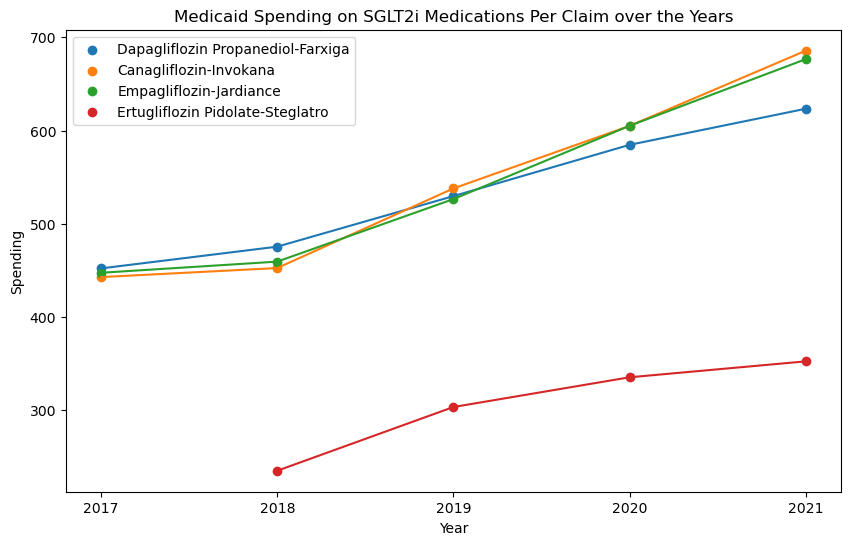

In [70]:
gnrc_names = SGLT2i_Spnd_Per_Clm['Gnrc_Name']
brnd_names = SGLT2i_Spnd_Per_Clm['Brnd_Name']
spending = SGLT2i_Spnd_Per_Clm[['Avg_Spnd_Per_Clm_2017', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending.shape[0]):
    plt.scatter(years, spending.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i])
    plt.plot(years, spending.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicaid Spending on SGLT2i Medications Per Claim over the Years')
plt.legend()
plt.show()

Note: Farxiga was the first SGLT2i approved to reduce risk of hospitalization for heart failure in 2019. This seems to match the increase in graph.

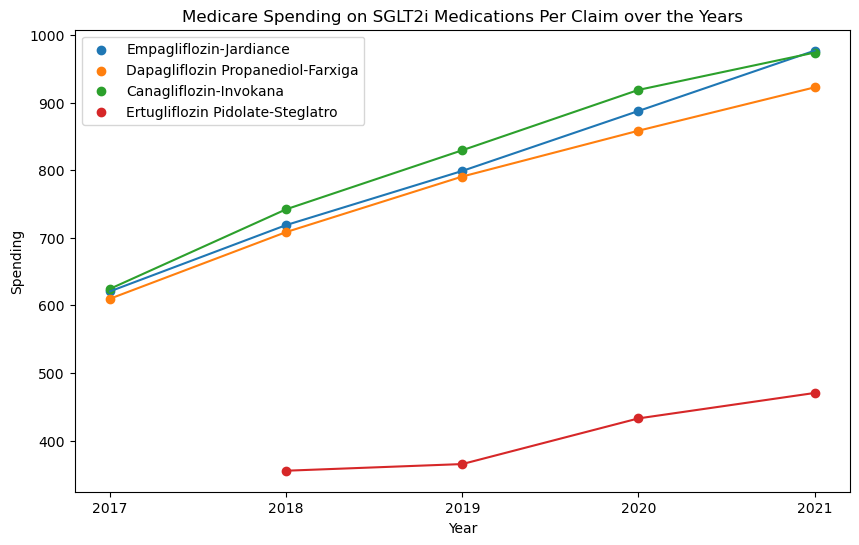

In [71]:
gnrc_names = Medicare_SGLT2i_Spnd_Per_Clm['Gnrc_Name']
brnd_names = Medicare_SGLT2i_Spnd_Per_Clm['Brnd_Name']
spending = Medicare_SGLT2i_Spnd_Per_Clm[['Avg_Spnd_Per_Clm_2017', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021']]
years = ['2017', '2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 6))
# Loop over each row of spending
for i in range(spending.shape[0]):
    plt.scatter(years, spending.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i])
    plt.plot(years, spending.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Spending')
plt.title('Medicare Spending on SGLT2i Medications Per Claim over the Years')
plt.legend()
plt.show()

In [72]:
SGLT2i_Spnd_Per_Clm = SGLT2i_Spnd_Per_Clm.copy()

for year in range(2018, 2022):
    SGLT2i_Spnd_Per_Clm.loc[SGLT2i_Spnd_Per_Clm['Brnd_Name'] != 'Steglatro', f'Avg_Change_Percent_{year}'] = (SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_{year}'] - SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2017']) / SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2017']

for year in range(2019, 2022):
    SGLT2i_Spnd_Per_Clm.loc[SGLT2i_Spnd_Per_Clm['Brnd_Name'] == 'Steglatro', f'Avg_Change_Percent_{year}'] = (SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_{year}'] - SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2018']) / SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2018']

#for year in range(2018, 2022):
#    SGLT2i_Spnd_Per_Clm.loc[:, f'Avg_Change_Percent_{year}'] = SGLT2i_Spnd_Per_Clm[f'Avg_Change_Percent_{year}'].fillna(0)

  
SGLT2i_Avg_Change_Percent=SGLT2i_Spnd_Per_Clm[['Brnd_Name','Gnrc_Name','Pharmacy_Class','Avg_Change_Percent_2018', 'Avg_Change_Percent_2019', 'Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
SGLT2i_Avg_Change_Percent

Brnd_Name                  Gnrc_Name Pharmacy_Class  \
5590     Farxiga  Dapagliflozin Propanediol         SGLT2i   
7554    Invokana              Canagliflozin         SGLT2i   
7740   Jardiance              Empagliflozin         SGLT2i   
13729  Steglatro     Ertugliflozin Pidolate         SGLT2i   

       Avg_Change_Percent_2018  Avg_Change_Percent_2019  \
5590                  0.051517                 0.171397   
7554                  0.021924                 0.214692   
7740                  0.026714                 0.176564   
13729                      NaN                 0.290536   

       Avg_Change_Percent_2020  Avg_Change_Percent_2021  
5590                  0.293030                 0.378591  
7554                  0.366139                 0.548259  
7740                  0.352277                 0.511923  
13729                 0.426142                 0.498778

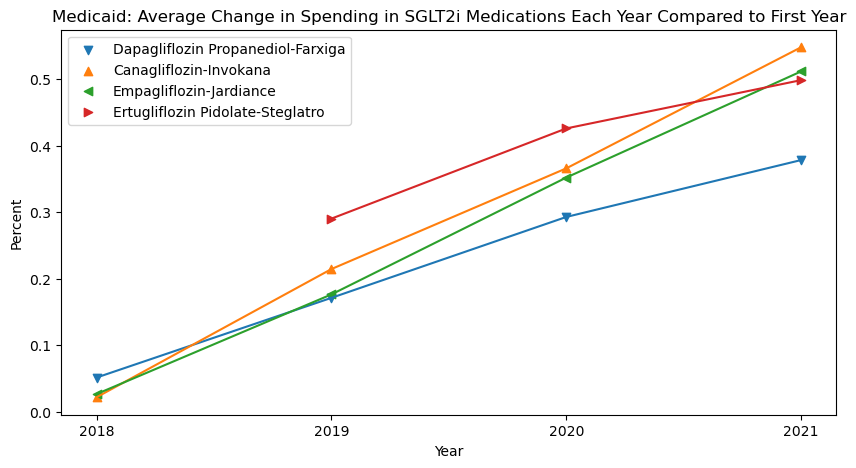

In [130]:
markers = ['v', '^', '<', '>']
gnrc_names = SGLT2i_Avg_Change_Percent['Gnrc_Name']
brnd_names = SGLT2i_Avg_Change_Percent['Brnd_Name']
percent = SGLT2i_Avg_Change_Percent[['Avg_Change_Percent_2018', 'Avg_Change_Percent_2019','Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
years = ['2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 5))

# Loop over each row of spending
for i in range(percent.shape[0]):
    plt.scatter(years, percent.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i], marker=markers[i % len(markers)])
    plt.plot(years, percent.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Medicaid: Average Change in Spending in SGLT2i Medications Each Year Compared to First Year')


plt.legend()
plt.show()


In [74]:
Medicare_SGLT2i_Spnd_Per_Clm

Brnd_Name                  Gnrc_Name Pharmacy_Class  \
6479   Jardiance              Empagliflozin         SGLT2i   
4717     Farxiga  Dapagliflozin Propanediol         SGLT2i   
6330    Invokana              Canagliflozin         SGLT2i   
11614  Steglatro     Ertugliflozin Pidolate         SGLT2i   

       Avg_Spnd_Per_Clm_2017  Avg_Spnd_Per_Clm_2018  Avg_Spnd_Per_Clm_2019  \
6479              620.713849             718.766051             798.868135   
4717              609.824244             708.417727             790.583338   
6330              624.454696             742.123987             829.465961   
11614                    NaN             355.317927             365.163229   

       Avg_Spnd_Per_Clm_2020  Avg_Spnd_Per_Clm_2021  
6479              887.559164             976.742794  
4717              858.378610             922.513247  
6330              918.744604             973.974412  
11614             432.733204             470.346119

In [75]:
Medicare_SGLT2i_Spnd_Per_Clm = Medicare_SGLT2i_Spnd_Per_Clm.copy()

for year in range(2018, 2022):
    Medicare_SGLT2i_Spnd_Per_Clm.loc[Medicare_SGLT2i_Spnd_Per_Clm['Brnd_Name'] != 'Steglatro', f'Avg_Change_Percent_{year}'] = (Medicare_SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_{year}'] - Medicare_SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2017']) / Medicare_SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2017']

for year in range(2019, 2022):
    Medicare_SGLT2i_Spnd_Per_Clm.loc[Medicare_SGLT2i_Spnd_Per_Clm['Brnd_Name'] == 'Steglatro', f'Avg_Change_Percent_{year}'] = (Medicare_SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_{year}'] - Medicare_SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2018']) / Medicare_SGLT2i_Spnd_Per_Clm[f'Avg_Spnd_Per_Clm_2018']

#for year in range(2018, 2022):
#    SGLT2i_Spnd_Per_Clm.loc[:, f'Avg_Change_Percent_{year}'] = SGLT2i_Spnd_Per_Clm[f'Avg_Change_Percent_{year}'].fillna(0)

  
Medicare_SGLT2i_Avg_Change_Percent=Medicare_SGLT2i_Spnd_Per_Clm[['Brnd_Name','Gnrc_Name','Pharmacy_Class','Avg_Change_Percent_2018', 'Avg_Change_Percent_2019', 'Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
Medicare_SGLT2i_Avg_Change_Percent

Brnd_Name                  Gnrc_Name Pharmacy_Class  \
6479   Jardiance              Empagliflozin         SGLT2i   
4717     Farxiga  Dapagliflozin Propanediol         SGLT2i   
6330    Invokana              Canagliflozin         SGLT2i   
11614  Steglatro     Ertugliflozin Pidolate         SGLT2i   

       Avg_Change_Percent_2018  Avg_Change_Percent_2019  \
6479                  0.157967                 0.287015   
4717                  0.161675                 0.296412   
6330                  0.188435                 0.328304   
11614                      NaN                 0.027708   

       Avg_Change_Percent_2020  Avg_Change_Percent_2021  
6479                  0.429901                 0.573580  
4717                  0.407584                 0.512753  
6330                  0.471275                 0.559720  
11614                 0.217876                 0.323733

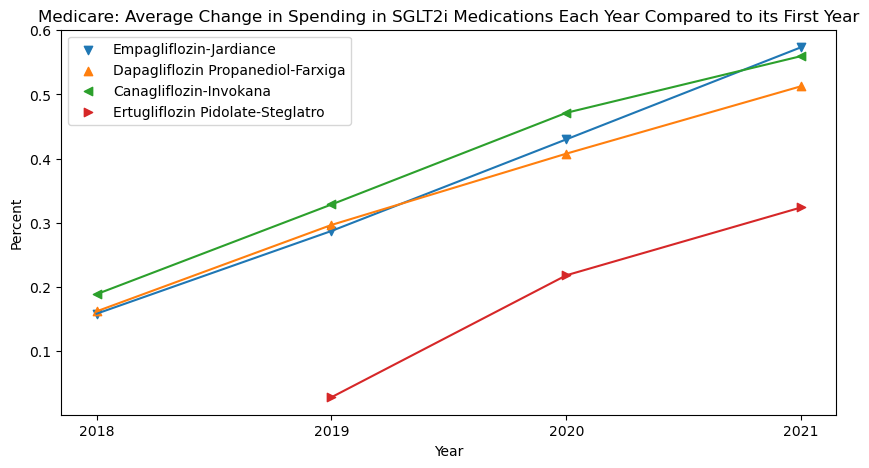

In [131]:
markers = ['v', '^', '<', '>']
gnrc_names = Medicare_SGLT2i_Avg_Change_Percent['Gnrc_Name']
brnd_names = Medicare_SGLT2i_Avg_Change_Percent['Brnd_Name']
percent = Medicare_SGLT2i_Avg_Change_Percent[['Avg_Change_Percent_2018', 'Avg_Change_Percent_2019','Avg_Change_Percent_2020', 'Avg_Change_Percent_2021']]
years = ['2018', '2019', '2020', '2021']

plt.figure(figsize=(10, 5))

# Loop over each row of spending
for i in range(percent.shape[0]):
    plt.scatter(years, percent.iloc[i], label=gnrc_names.iloc[i] + '-' + brnd_names.iloc[i], marker=markers[i % len(markers)])
    plt.plot(years, percent.iloc[i]) 

plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Medicare: Average Change in Spending in SGLT2i Medications Each Year Compared to its First Year')


plt.legend()
plt.show()


Change/annual growth appear similar for these medications.

What can we do to save money? For the SGLT2i class, Steglatro/Ertugliflozin cost less than other medications in the same class. Steglatro has not yet demonstrated the same positive renal and cardiac protection like the other medications. It still effectively lowers a1c.

In [78]:
medicaid_nonsteglatro_claims = dm_medicaid_spending[(dm_medicaid_spending['Mftr_Name']=='Overall') &
                                                              (dm_medicaid_spending['Pharmacy_Class']=='SGLT2i') &
                                                               (dm_medicaid_spending['Brnd_Name']!='Steglatro')]

medicaid_nonsteglatro_claims_total=medicaid_nonsteglatro_claims[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].sum() 
medicaid_nonsteglatro_claims_total= pd.DataFrame(medicaid_nonsteglatro_claims_total, columns=['Nonsteglatro_Total_Claims'])  
medicaid_nonsteglatro_claims_total

medicaid_steglatro_claims_total = pd.DataFrame()
medicaid_steglatro_claims_total['Steglatro_Claims'] = pd.DataFrame(dm_medicaid_spending[(dm_medicaid_spending['Mftr_Name']=='Overall') &
                                  (dm_medicaid_spending['Brnd_Name']=='Steglatro')][['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']]).T

medicaid_steglatro_vs_nonsteglatro_claims=pd.concat([medicaid_steglatro_claims_total, medicaid_nonsteglatro_claims_total], axis=1)
medicaid_steglatro_vs_nonsteglatro_claims=medicaid_steglatro_vs_nonsteglatro_claims.set_index([['2017', '2018', '2019', '2020', '2021']])
medicaid_steglatro_vs_nonsteglatro_claims

Steglatro_Claims  Nonsteglatro_Total_Claims
2017               NaN                   752331.0
2018           40404.0                   859766.0
2019          268273.0                   842706.0
2020          385721.0                  1128434.0
2021          473021.0                  1718357.0

In [79]:
medicaid_nonsteglatro_spending_total= pd.DataFrame()
medicaid_nonsteglatro_spending_total['Total Nonsteglatro Spending']=pd.DataFrame(medicaid_nonsteglatro_claims[['Brnd_Name','Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum())
medicaid_nonsteglatro_spending_total=medicaid_nonsteglatro_spending_total.iloc[1:]
medicaid_nonsteglatro_spending_total

medicaid_steglatro_spending_total= pd.DataFrame()
medicaid_steglatro_spending_total['Total Steglatro Spending']=dm_medicaid_spending[(dm_medicaid_spending['Brnd_Name']=='Steglatro') & (dm_medicaid_spending['Mftr_Name']=='Overall')][['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].T
medicaid_steglatro_spending_total

medicaid_steglatro_vs_nonsteglatro_spending=pd.concat([medicaid_nonsteglatro_spending_total, medicaid_steglatro_spending_total], axis=1)
medicaid_steglatro_vs_nonsteglatro_spending=medicaid_steglatro_vs_nonsteglatro_spending.set_index([['2017', '2018', '2019', '2020', '2021']])
medicaid_steglatro_vs_nonsteglatro_spending

Total Nonsteglatro Spending  Total Steglatro Spending
2017                334983654.09                       NaN
2018                 394641555.5              9.501504e+06
2019                446233429.47              8.141700e+07
2020                679002516.67              1.293612e+08
2021               1143805985.08              1.667192e+08

In [80]:
medicaid_steglatro_potential=pd.concat([medicaid_steglatro_vs_nonsteglatro_spending, medicaid_steglatro_vs_nonsteglatro_claims], axis=1)
medicaid_steglatro_potential

Total Nonsteglatro Spending  Total Steglatro Spending  Steglatro_Claims  \
2017                334983654.09                       NaN               NaN   
2018                 394641555.5              9.501504e+06           40404.0   
2019                446233429.47              8.141700e+07          268273.0   
2020                679002516.67              1.293612e+08          385721.0   
2021               1143805985.08              1.667192e+08          473021.0   

      Nonsteglatro_Total_Claims  
2017                   752331.0  
2018                   859766.0  
2019                   842706.0  
2020                  1128434.0  
2021                  1718357.0

How much could medicaid save by switching to Steglatro?

In [81]:
medicaid_steglatro_potential['Nonsteglatro_Cost_Per_Claim']=medicaid_steglatro_potential.iloc[:,0]/medicaid_steglatro_potential.iloc[:,3]
medicaid_steglatro_potential['Steglatro_Cost_Per_Claim']=medicaid_steglatro_potential.iloc[:,1]/medicaid_steglatro_potential.iloc[:,2]
medicaid_potential_savings=(medicaid_steglatro_potential.iloc[:,4]-medicaid_steglatro_potential.iloc[:,5])*medicaid_steglatro_potential.iloc[:,3]
medicaid_potential_savings=pd.DataFrame(medicaid_potential_savings, columns=['Potential Medicaid SGLT2i Savings'])
medicaid_potential_savings

Potential Medicaid SGLT2i Savings
2017                               NaN
2018                  192456869.486898
2019                  190484280.176659
2020                  300553790.539134
2021                  538160275.112545

This is the upper limit in terms of annual savings assuming that all SGLT2is can and should be replaced by Steglatro. This is not realistic since other SGLT2is have proven to be effective in reducing cardiovascular death and delaying end stage renal disease. In patients who have elevated u-microalbumin, a sign of kidney damage, or ejection fraction <40%, other SGLT2is are indicated. 

In [82]:
Total_Medicaid_Spending=pd.DataFrame(medicaid_spending.loc[:,['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum(), columns=['Total Medicaid Spending'])
Total_Medicaid_Spending.index = ['2017', '2018', '2019', '2020', '2021']
Total_Medicaid_Spending

Total Medicaid Spending
2017             1.325185e+11
2018             1.322476e+11
2019             1.441564e+11
2020             1.533317e+11
2021             1.727941e+11

In [84]:
Potential_Medicaid_Savings=pd.concat([medicaid_potential_savings,Total_Medicaid_Spending], axis=1)
Potential_Medicaid_Savings['Percent Savings from SGLT2i']=(Potential_Medicaid_Savings.iloc[:,0]/Potential_Medicaid_Savings.iloc[:,1])*100
Potential_Medicaid_Savings

Potential Medicaid SGLT2i Savings  Total Medicaid Spending  \
2017                               NaN             1.325185e+11   
2018                  192456869.486898             1.322476e+11   
2019                  190484280.176659             1.441564e+11   
2020                  300553790.539134             1.533317e+11   
2021                  538160275.112545             1.727941e+11   

     Percent Savings from SGLT2i  
2017                         NaN  
2018                    0.145528  
2019                    0.132137  
2020                    0.196015  
2021                    0.311446

In [85]:
dm_medicare_spending[dm_medicare_spending['Pharmacy_Class']=='SGLT2i']

Brnd_Name                  Gnrc_Name Pharmacy_Class  Tot_Mftr  \
6479   Jardiance              Empagliflozin         SGLT2i         1   
6480   Jardiance              Empagliflozin         SGLT2i         1   
4717     Farxiga  Dapagliflozin Propanediol         SGLT2i         1   
4718     Farxiga  Dapagliflozin Propanediol         SGLT2i         1   
6330    Invokana              Canagliflozin         SGLT2i         1   
6331    Invokana              Canagliflozin         SGLT2i         1   
11614  Steglatro     Ertugliflozin Pidolate         SGLT2i         1   
11615  Steglatro     Ertugliflozin Pidolate         SGLT2i         1   

             Mftr_Name  Tot_Spndng_2017  Tot_Dsg_Unts_2017  Tot_Clms_2017  \
6479           Overall     3.214205e+08         22846093.5       517824.0   
6480   Boehringer Ing.     3.214205e+08         22846093.5       517824.0   
4717           Overall     1.929819e+08         13588135.0       316455.0   
4718       Astrazeneca     1.929819e+08         13588135.0       316455.0   
6330           Overall     7.168521e+08         51325623.9      1147965.0   
6331    Janssen Pharm.     7.168521e+08         51325623.9      1147965.0   
11614          Overall              NaN                NaN            NaN   
11615  Merck Sharp & D              NaN                NaN            NaN   

       Tot_Benes_2017  Avg_Spnd_Per_Dsg_Unt_Wghtd_2017  Avg_Spnd_Per_Clm_2017  \
6479         132920.0                        14.069210             620.713849   
6480         132920.0                        14.069210             620.713849   
4717          73642.0                        14.201577             609.824244   
4718          73642.0                        14.201577             609.824244   
6330         231945.0                        13.966977             624.454696   
6331         231945.0                        13.966977             624.454696   
11614             NaN                              NaN                    NaN   
11615             NaN                              NaN                    NaN   

       Avg_Spnd_Per_Bene_2017  Outlier_Flag_2017  Tot_Spndng_2018  \
6479              2418.150227                0.0     6.683762e+08   
6480              2418.150227                0.0     6.683762e+08   
4717              2620.541688                0.0     3.565204e+08   
4718              2620.541688                0.0     3.565204e+08   
6330              3090.612581                0.0     6.716096e+08   
6331              3090.612581                0.0     6.716096e+08   
11614                     NaN                NaN     7.404826e+05   
11615                     NaN                NaN     7.404826e+05   

       Tot_Dsg_Unts_2018  Tot_Clms_2018  Tot_Benes_2018  \
6479          43338456.0       929894.0        218219.0   
6480          43338456.0       929894.0        218219.0   
4717          23132840.0       503263.0        115269.0   
4718          23132840.0       503263.0        115269.0   
6330          43497536.0       904983.0        185650.0   
6331          43497536.0       904983.0        185650.0   
11614            83289.0         2084.0          1052.0   
11615            83289.0         2084.0          1052.0   

       Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  Avg_Spnd_Per_Clm_2018  \
6479                         15.422859             718.766051   
6480                         15.422859             718.766051   
4717                         15.410301             708.417727   
4718                         15.410301             708.417727   
6330                         15.440340             742.123987   
6331                         15.440340             742.123987   
11614                         8.889858             355.317927   
11615                         8.889858             355.317927   

       Avg_Spnd_Per_Bene_2018  Outlier_Flag_2018  Tot_Spndng_2019  \
6479              3062.869127                0.0     1.447619e+09   
6480              3062.869127                0.0     1.4

In [86]:
medicare_nonsteglatro_claims = dm_medicare_spending[(dm_medicare_spending['Mftr_Name']=='Overall') &
                                                              (dm_medicare_spending['Pharmacy_Class']=='SGLT2i') &
                                                               (dm_medicare_spending['Brnd_Name']!='Steglatro')]

medicare_nonsteglatro_claims_total=medicare_nonsteglatro_claims[['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].sum() 
medicare_nonsteglatro_claims_total= pd.DataFrame(medicare_nonsteglatro_claims_total, columns=['Nonsteglatro_Total_Claims'])  
medicare_nonsteglatro_claims_total.index= ['2017','2018', '2019', '2020', '2021']

medicare_steglatro_claims = dm_medicare_spending[(dm_medicare_spending['Mftr_Name']== 'Overall') &
                                                (dm_medicare_spending['Brnd_Name']=='Steglatro')][['Tot_Clms_2017', 'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021']].apply(pd.to_numeric, errors='coerce')
medicare_steglatro_claims_total = pd.DataFrame()
medicare_steglatro_claims_total['Steglatro_Claims'] = medicare_steglatro_claims.T
medicare_steglatro_claims_total.index= ['2017','2018', '2019', '2020', '2021']
medicare_steglatro_claims_total

# medicare_steglatro_claims_total = medicare_steglatro_claims_total.T.reset_index(drop=True)

medicare_steglatro_vs_nonsteglatro_claims=pd.concat([medicare_steglatro_claims_total, medicare_nonsteglatro_claims_total], axis=1)
medicare_steglatro_vs_nonsteglatro_claims

Steglatro_Claims  Nonsteglatro_Total_Claims
2017               NaN                  1982244.0
2018            2084.0                  2338140.0
2019           15126.0                  3041066.0
2020           26276.0                  4157528.0
2021           31930.0                  5834213.0

In [88]:
medicare_nonsteglatro_spending_total= pd.DataFrame()
medicare_nonsteglatro_spending_total['Total Nonsteglatro Spending']=pd.DataFrame(medicare_nonsteglatro_claims[['Brnd_Name','Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].sum())
medicare_nonsteglatro_spending_total=medicare_nonsteglatro_spending_total.iloc[1:]
medicare_nonsteglatro_spending_total

medicare_steglatro_spending_total= pd.DataFrame()
medicare_steglatro_spending_total['Total Steglatro Spending']=dm_medicare_spending[(dm_medicare_spending['Brnd_Name']=='Steglatro') & (dm_medicare_spending['Mftr_Name']=='Overall')][['Tot_Spndng_2017', 'Tot_Spndng_2018', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']].T
medicare_steglatro_spending_total

medicare_steglatro_vs_nonsteglatro_spending=pd.concat([medicare_nonsteglatro_spending_total, medicare_steglatro_spending_total], axis=1)
medicare_steglatro_vs_nonsteglatro_spending=medicare_steglatro_vs_nonsteglatro_spending.set_index([['2017', '2018', '2019', '2020', '2021']])
medicare_steglatro_vs_nonsteglatro_spending

Total Nonsteglatro Spending  Total Steglatro Spending
2017               1231254594.17                       NaN
2018               1696506260.91                 740482.56
2019               2442024675.59                5523459.00
2020               3684401974.83               11370497.68
2021               5613665712.59               15018151.59

In [89]:
medicare_steglatro_potential=pd.concat([medicare_steglatro_vs_nonsteglatro_spending, medicare_steglatro_vs_nonsteglatro_claims], axis=1)
medicare_steglatro_potential

Total Nonsteglatro Spending  Total Steglatro Spending  Steglatro_Claims  \
2017               1231254594.17                       NaN               NaN   
2018               1696506260.91                 740482.56            2084.0   
2019               2442024675.59                5523459.00           15126.0   
2020               3684401974.83               11370497.68           26276.0   
2021               5613665712.59               15018151.59           31930.0   

      Nonsteglatro_Total_Claims  
2017                  1982244.0  
2018                  2338140.0  
2019                  3041066.0  
2020                  4157528.0  
2021                  5834213.0

In [90]:
medicare_steglatro_potential

Total Nonsteglatro Spending  Total Steglatro Spending  Steglatro_Claims  \
2017               1231254594.17                       NaN               NaN   
2018               1696506260.91                 740482.56            2084.0   
2019               2442024675.59                5523459.00           15126.0   
2020               3684401974.83               11370497.68           26276.0   
2021               5613665712.59               15018151.59           31930.0   

      Nonsteglatro_Total_Claims  
2017                  1982244.0  
2018                  2338140.0  
2019                  3041066.0  
2020                  4157528.0  
2021                  5834213.0

In [91]:
medicare_steglatro_potential['Nonsteglatro_Cost_Per_Claim']=medicare_steglatro_potential.iloc[:,0]/medicare_steglatro_potential.iloc[:,3]
medicare_steglatro_potential['Steglatro_Cost_Per_Claim']=medicare_steglatro_potential.iloc[:,1]/medicare_steglatro_potential.iloc[:,2]
medicare_potential_savings=(medicare_steglatro_potential.iloc[:,4]-medicare_steglatro_potential.iloc[:,5])*medicare_steglatro_potential.iloc[:,3]
medicare_potential_savings=pd.DataFrame(medicare_potential_savings, columns=['Potential Medicare SGLT2i Savings'])
medicare_potential_savings

Potential Medicare SGLT2i Savings
2017                               NaN
2018                  865723202.926123
2019                 1331539195.800631
2020                 1885301560.819685
2021                 2869566268.733168

In 2021, Medicare spent 5.61 billion dollars on SGLT2i medications (Steglatro excluded). The maximum potential saving for switching to Steglatro is 2.86 billion dollars.

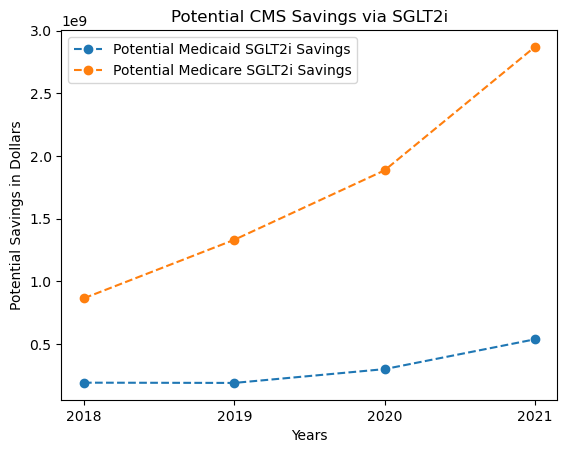

In [92]:
plt.plot(medicaid_potential_savings.index, medicaid_potential_savings['Potential Medicaid SGLT2i Savings'], linestyle='--', marker='o', label='Potential Medicaid SGLT2i Savings')
plt.plot(medicare_potential_savings.index, medicare_potential_savings['Potential Medicare SGLT2i Savings'], linestyle='--', marker='o', label='Potential Medicare SGLT2i Savings')

plt.xlabel('Years')
plt.ylabel('Potential Savings in Dollars')
plt.title('Potential CMS Savings via SGLT2i')
plt.legend(loc='upper left')
plt.show()

Next, we can examine GLP-1 medications and examine which medication may be most cost effective. Victoza, Saxenda, and Wegovy are excluded because they are marketed for weight loss. Adlyxin is excluded because it is no longer in the market

In [93]:
medicaid_GLP1_potential=dm_medicaid_spending[(dm_medicaid_spending['Mftr_Name']=='Overall') &
                    (dm_medicaid_spending['Pharmacy_Class']=='GLP-1') &
                    ~(dm_medicaid_spending['Brnd_Name'].isin(['Adlyxin', 'Wegovy', 'Saxenda', 'Victoza 2-Pak', 'Victoza 3-Pak']))]
medicaid_GLP1_potential=medicaid_GLP1_potential[['Brnd_Name', 'Gnrc_Name', 'Tot_Spndng_2017', 'Tot_Clms_2017','Tot_Spndng_2018', 'Tot_Clms_2018','Tot_Spndng_2019', 'Tot_Clms_2019','Tot_Spndng_2020', 'Tot_Clms_2020','Tot_Spndng_2021', 'Tot_Clms_2021']]
medicaid_GLP1_potential

Brnd_Name               Gnrc_Name  Tot_Spndng_2017  Tot_Clms_2017  \
2029   Bydureon Bcise  Exenatide Microspheres              NaN            NaN   
2031     Bydureon Pen  Exenatide Microspheres      70135750.32       112744.0   
2033           Byetta               Exenatide      28911177.75        42034.0   
11373         Ozempic             Semaglutide              NaN            NaN   
13163        Rybelsus             Semaglutide              NaN            NaN   
14947       Trulicity             Dulaglutide      96396208.81       142499.0   

       Tot_Spndng_2018  Tot_Clms_2018  Tot_Spndng_2019  Tot_Clms_2019  \
2029      1.394851e+07        22324.0     3.288406e+07        47818.0   
2031      7.783041e+07       120179.0     1.063032e+08       152110.0   
2033      2.416021e+07        33709.0     2.287744e+07        26944.0   
11373     1.218884e+07        17155.0     1.264973e+08       160608.0   
13163              NaN            NaN     8.405880e+04          107.0   
14947     1.962901e+08       291273.0     3.571118e+08       462489.0   

       Tot_Spndng_2020  Tot_Clms_2020  Tot_Spndng_2021  Tot_Clms_2021  
2029      4.817808e+07        64549.0     7.910652e+07         100881  
2031      1.308513e+08       173775.0     3.952884e+07          49799  
2033      1.764579e+07        21408.0     1.685221e+07          19323  
11373     2.772483e+08       325500.0     4.977974e+08         547225  
13163     9.484160e+06        11158.0     5.996615e+07          66375  
14947     6.026270e+08       716616.0     1.186079e+09        1299572

In [94]:
medicaid_GLP1_potential['Cost Per Claim 2017']=medicaid_GLP1_potential.iloc[:,2]/medicaid_GLP1_potential.iloc[:,3]
medicaid_GLP1_potential['Cost Per Claim 2018']=medicaid_GLP1_potential.iloc[:,4]/medicaid_GLP1_potential.iloc[:,5]
medicaid_GLP1_potential['Cost Per Claim 2019']=medicaid_GLP1_potential.iloc[:,6]/medicaid_GLP1_potential.iloc[:,7]
medicaid_GLP1_potential['Cost Per Claim 2020']=medicaid_GLP1_potential.iloc[:,8]/medicaid_GLP1_potential.iloc[:,9]
medicaid_GLP1_potential['Cost Per Claim 2021']=medicaid_GLP1_potential.iloc[:,10]/medicaid_GLP1_potential.iloc[:,11]
medicaid_GLP1_potential

Brnd_Name               Gnrc_Name  Tot_Spndng_2017  Tot_Clms_2017  \
2029   Bydureon Bcise  Exenatide Microspheres              NaN            NaN   
2031     Bydureon Pen  Exenatide Microspheres      70135750.32       112744.0   
2033           Byetta               Exenatide      28911177.75        42034.0   
11373         Ozempic             Semaglutide              NaN            NaN   
13163        Rybelsus             Semaglutide              NaN            NaN   
14947       Trulicity             Dulaglutide      96396208.81       142499.0   

       Tot_Spndng_2018  Tot_Clms_2018  Tot_Spndng_2019  Tot_Clms_2019  \
2029      1.394851e+07        22324.0     3.288406e+07        47818.0   
2031      7.783041e+07       120179.0     1.063032e+08       152110.0   
2033      2.416021e+07        33709.0     2.287744e+07        26944.0   
11373     1.218884e+07        17155.0     1.264973e+08       160608.0   
13163              NaN            NaN     8.405880e+04          107.0   
14947     1.962901e+08       291273.0     3.571118e+08       462489.0   

       Tot_Spndng_2020  Tot_Clms_2020  Tot_Spndng_2021  Tot_Clms_2021  \
2029      4.817808e+07        64549.0     7.910652e+07         100881   
2031      1.308513e+08       173775.0     3.952884e+07          49799   
2033      1.764579e+07        21408.0     1.685221e+07          19323   
11373     2.772483e+08       325500.0     4.977974e+08         547225   
13163     9.484160e+06        11158.0     5.996615e+07          66375   
14947     6.026270e+08       716616.0     1.186079e+09        1299572   

       Cost Per Claim 2017  Cost Per Claim 2018  Cost Per Claim 2019  \
2029                   NaN           624.821375           687.692039   
2031            622.079670           647.620688           698.857545   
2033            687.804581           716.728880           849.073604   
11373                  NaN           710.512577           787.615258   
13163                  NaN                  NaN           785.596262   
14947           676.469370           673.904179           772.151880   

       Cost Per Claim 2020  Cost Per Claim 2021  
2029            746.380002           784.156730  
2031            752.992839           793.767684  
2033            824.261572           872.132122  
11373           851.761190           909.675866  
13163           849.987450           903.444838  
14947           840.934349           912.669283

#For Medicaid 2021
Calculate total GLP1 cost expense minus the lowest alternative and divide that by the total number of those claims.

In [ ]:
medicaid_GLP1_potential

In [95]:
medicaid_GLP1_savings= pd.DataFrame()

medicaid_GLP1_savings['2017']=((medicaid_GLP1_potential.loc[1:,'Tot_Spndng_2017'].sum()/
medicaid_GLP1_potential.loc[1:,'Tot_Clms_2017'].sum())-medicaid_GLP1_potential.loc[
    medicaid_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2017'])*medicaid_GLP1_potential.loc[1:,'Tot_Clms_2017'].sum()

medicaid_GLP1_savings['2018']=((medicaid_GLP1_potential.loc[1:,'Tot_Spndng_2018'].sum()/
medicaid_GLP1_potential.loc[1:,'Tot_Clms_2018'].sum())-medicaid_GLP1_potential.loc[
    medicaid_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2018'])*medicaid_GLP1_potential.loc[1:,'Tot_Clms_2018'].sum()

medicaid_GLP1_savings['2019']=((medicaid_GLP1_potential.loc[1:,'Tot_Spndng_2019'].sum()/
medicaid_GLP1_potential.loc[1:,'Tot_Clms_2019'].sum())-medicaid_GLP1_potential.loc[
    medicaid_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2019'])*medicaid_GLP1_potential.loc[1:,'Tot_Clms_2019'].sum()

medicaid_GLP1_savings['2020']=((medicaid_GLP1_potential.loc[1:,'Tot_Spndng_2020'].sum()/
medicaid_GLP1_potential.loc[1:,'Tot_Clms_2020'].sum())-medicaid_GLP1_potential.loc[
    medicaid_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2020'])*medicaid_GLP1_potential.loc[1:,'Tot_Clms_2020'].sum()

medicaid_GLP1_savings['2021']=((medicaid_GLP1_potential.loc[1:,'Tot_Spndng_2021'].sum()/
medicaid_GLP1_potential.loc[1:,'Tot_Clms_2021'].sum())-medicaid_GLP1_potential.loc[
    medicaid_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2021'])*medicaid_GLP1_potential.loc[1:,'Tot_Clms_2021'].sum()



medicaid_GLP1_savings= medicaid_GLP1_savings.rename(index={2029:'Potential Medicaid Savings'}).T
medicaid_GLP1_savings


Potential Medicaid Savings
2017                         NaN
2018                2.160464e+07
2019                6.116734e+07
2020                1.060332e+08
2021                2.457948e+08

This is the maximum potential savings medicaid can make assuming all the glp-1 marketed for diabetes can be switched to Bydureon Bcise. In practice, this is not likely for multiple reasons. Bydureon is a slightly harder injectable pen to use because it requires mixing (have to shake the pen for 15 seconds). This barrier can be problematic for those with dexterity issues. However, the plus side is the needle is hidden and is a one time use pen (does not require measuring/dialing). This injection has only one strength compared to other GLP1 and therefore may not have the most diabetes lowering effect. This medication could be offered as part of a step therapy. If a1c goal is still not achieved after 3-6 months and/or patient has documented dexterity issues, other glp1 can be considered.

In [96]:
medicare_GLP1_potential=dm_medicare_spending[(dm_medicare_spending['Mftr_Name']=='Overall') &
                    (dm_medicare_spending['Pharmacy_Class']=='GLP-1') &
                    ~(dm_medicare_spending['Brnd_Name'].isin(['Adlyxin', 'Wegovy', 'Saxenda', 'Victoza 2-Pak', 'Victoza 3-Pak']))]
medicare_GLP1_potential=medicare_GLP1_potential[['Brnd_Name', 'Gnrc_Name', 'Tot_Spndng_2017', 'Tot_Clms_2017','Tot_Spndng_2018', 'Tot_Clms_2018','Tot_Spndng_2019', 'Tot_Clms_2019','Tot_Spndng_2020', 'Tot_Clms_2020','Tot_Spndng_2021', 'Tot_Clms_2021']]
medicare_GLP1_potential

Brnd_Name               Gnrc_Name  Tot_Spndng_2017  Tot_Clms_2017  \
12720       Trulicity             Dulaglutide     6.987048e+08       812317.0   
1713   Bydureon Bcise  Exenatide Microspheres     9.231354e+04           93.0   
1715     Bydureon Pen  Exenatide Microspheres     2.630928e+08       322814.0   
1717           Byetta               Exenatide     1.019163e+08       105310.0   
9556          Ozempic             Semaglutide              NaN            NaN   
11084        Rybelsus             Semaglutide              NaN            NaN   

       Tot_Spndng_2018  Tot_Clms_2018  Tot_Spndng_2019  Tot_Clms_2019  \
12720     1.360490e+09      1383553.0     2.272876e+09      2138442.0   
1713      1.119673e+08       124558.0     2.154858e+08       220832.0   
1715      2.709267e+08       300214.0     2.740722e+08       279926.0   
1717      7.955865e+07        73664.0     6.140158e+07        52880.0   
9556      5.681756e+07        60489.0     5.524018e+08       523508.0   
11084              NaN            NaN     3.672218e+05          400.0   

       Tot_Spndng_2020  Tot_Clms_2020  Tot_Spndng_2021  Tot_Clms_2021  
12720     3.284873e+09      2823185.0     4.702175e+09        3704201  
1713      2.661610e+08       245742.0     3.792435e+08         316214  
1715      2.417077e+08       229059.0     6.106505e+07          54866  
1717      4.767663e+07        39793.0     3.798866e+07          28346  
9556      1.455812e+09      1204138.0     2.621694e+09        2016177  
11084     7.344441e+07        68091.0     4.545638e+08         367858

In [97]:
medicare_GLP1_potential['Cost Per Claim 2017']=medicare_GLP1_potential.iloc[:,2]/medicare_GLP1_potential.iloc[:,3]
medicare_GLP1_potential['Cost Per Claim 2018']=medicare_GLP1_potential.iloc[:,4]/medicare_GLP1_potential.iloc[:,5]
medicare_GLP1_potential['Cost Per Claim 2019']=medicare_GLP1_potential.iloc[:,6]/medicare_GLP1_potential.iloc[:,7]
medicare_GLP1_potential['Cost Per Claim 2020']=medicare_GLP1_potential.iloc[:,8]/medicare_GLP1_potential.iloc[:,9]
medicare_GLP1_potential['Cost Per Claim 2021']=medicare_GLP1_potential.iloc[:,10]/medicare_GLP1_potential.iloc[:,11]
medicare_GLP1_potential

Brnd_Name               Gnrc_Name  Tot_Spndng_2017  Tot_Clms_2017  \
12720       Trulicity             Dulaglutide     6.987048e+08       812317.0   
1713   Bydureon Bcise  Exenatide Microspheres     9.231354e+04           93.0   
1715     Bydureon Pen  Exenatide Microspheres     2.630928e+08       322814.0   
1717           Byetta               Exenatide     1.019163e+08       105310.0   
9556          Ozempic             Semaglutide              NaN            NaN   
11084        Rybelsus             Semaglutide              NaN            NaN   

       Tot_Spndng_2018  Tot_Clms_2018  Tot_Spndng_2019  Tot_Clms_2019  \
12720     1.360490e+09      1383553.0     2.272876e+09      2138442.0   
1713      1.119673e+08       124558.0     2.154858e+08       220832.0   
1715      2.709267e+08       300214.0     2.740722e+08       279926.0   
1717      7.955865e+07        73664.0     6.140158e+07        52880.0   
9556      5.681756e+07        60489.0     5.524018e+08       523508.0   
11084              NaN            NaN     3.672218e+05          400.0   

       Tot_Spndng_2020  Tot_Clms_2020  Tot_Spndng_2021  Tot_Clms_2021  \
12720     3.284873e+09      2823185.0     4.702175e+09        3704201   
1713      2.661610e+08       245742.0     3.792435e+08         316214   
1715      2.417077e+08       229059.0     6.106505e+07          54866   
1717      4.767663e+07        39793.0     3.798866e+07          28346   
9556      1.455812e+09      1204138.0     2.621694e+09        2016177   
11084     7.344441e+07        68091.0     4.545638e+08         367858   

       Cost Per Claim 2017  Cost Per Claim 2018  Cost Per Claim 2019  \
12720           860.138133           983.330816          1062.865527   
1713            992.618710           898.916961           975.790666   
1715            814.998136           902.445386           979.088206   
1717            967.774574          1080.020786          1161.149341   
9556                   NaN           939.303983          1055.192626   
11084                  NaN                  NaN           918.054500   

       Cost Per Claim 2020  Cost Per Claim 2021  
12720          1163.534470          1269.416731  
1713           1083.091010          1199.325353  
1715           1055.220115          1112.985194  
1717           1198.116038          1340.177185  
9556           1209.007827          1300.329459  
11084          1078.621383          1235.704601

First, move Bcise to first row as before.

In [ ]:
medicare_GLP1_potential

In [98]:
bydureon_bcise_row=medicare_GLP1_potential.iloc[1:2,:]
glp1_minus_bcise=medicare_GLP1_potential.drop(medicare_GLP1_potential.index[1])
medicare_GLP1_potential=pd.concat([bydureon_bcise_row,glp1_minus_bcise]).reset_index(drop=True)

medicare_GLP1_savings= pd.DataFrame()

medicare_GLP1_savings['2017']=((medicare_GLP1_potential.loc[1:,'Tot_Spndng_2017'].sum()/
medicare_GLP1_potential.loc[1:,'Tot_Clms_2017'].sum())-medicare_GLP1_potential.loc[
    medicare_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2017'])*medicare_GLP1_potential.loc[1:,'Tot_Clms_2017'].sum()

medicare_GLP1_savings['2018']=((medicare_GLP1_potential.loc[1:,'Tot_Spndng_2018'].sum()/
medicare_GLP1_potential.loc[1:,'Tot_Clms_2018'].sum())-medicare_GLP1_potential.loc[
    medicare_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2018'])*medicare_GLP1_potential.loc[1:,'Tot_Clms_2018'].sum()

medicare_GLP1_savings['2019']=((medicare_GLP1_potential.loc[1:,'Tot_Spndng_2019'].sum()/
medicare_GLP1_potential.loc[1:,'Tot_Clms_2019'].sum())-medicare_GLP1_potential.loc[
    medicare_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2019'])*medicare_GLP1_potential.loc[1:,'Tot_Clms_2019'].sum()

medicare_GLP1_savings['2020']=((medicare_GLP1_potential.loc[1:,'Tot_Spndng_2020'].sum()/
medicare_GLP1_potential.loc[1:,'Tot_Clms_2020'].sum())-medicare_GLP1_potential.loc[
    medicare_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2020'])*medicare_GLP1_potential.loc[1:,'Tot_Clms_2020'].sum()

medicare_GLP1_savings['2021']=((medicare_GLP1_potential.loc[1:,'Tot_Spndng_2021'].sum()/
medicare_GLP1_potential.loc[1:,'Tot_Clms_2021'].sum())-medicare_GLP1_potential.loc[
    medicare_GLP1_potential['Brnd_Name']=='Bydureon Bcise','Cost Per Claim 2021'])*medicare_GLP1_potential.loc[1:,'Tot_Clms_2021'].sum()



medicare_GLP1_savings= medicare_GLP1_savings.rename(index={0:'Potential Medicare Savings'}).T
medicare_GLP1_savings


Potential Medicare Savings
2017               -1.675710e+08
2018                1.336341e+08
2019                2.384738e+08
2020                3.766168e+08
2021                4.759126e+08

Bydureon Bcise was more expensive in 2017 and this would not save Medicare money. However, making this switch from 2018 onwards would yield ~$100million in savings.

In [ ]:
medicaid_GLP1_savings

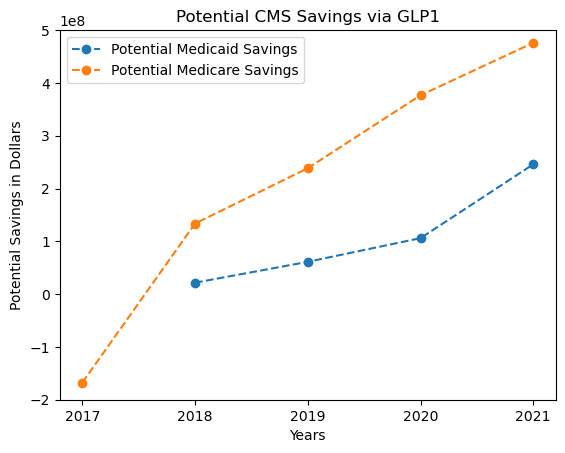

In [99]:

plt.plot(medicaid_GLP1_savings, linestyle= '--', marker='o', label='Potential Medicaid Savings')
plt.plot(medicare_GLP1_savings, linestyle= '--', marker='o', label='Potential Medicare Savings')

plt.xlabel('Years')
plt.ylabel('Potential Savings in Dollars')
plt.ylim(-2e8,.50e9)

plt.title('Potential CMS Savings via GLP1')
plt.legend(loc='upper left')
plt.show()